In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

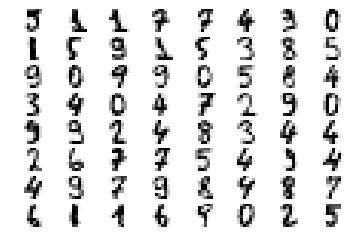

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 20)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T.tolist() 

In [7]:
classes = []
for i in range(2**(10-1) - 1):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/511".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/511
number of class1:162
number of class2:1455

 ****** Running generation 0 ****** 

Population's average fitness: 0.53371 stdev: 0.27691
Best fitness: 0.89981 - size: (2, 13) - species 1 - id 93
Average adjusted fitness: 0.467
Mean genetic distance 2.946, standard deviation 0.510
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 5.360 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.71400 stdev: 0.24746
Best fitness: 0.92703 - size: (2, 13) - species 6 - id 369
Average adjusted fitness: 0.573
Mean genetic distance 3.053, standard deviation 0.515
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 5.732 sec (5.546 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.76830 stdev: 0.21514
Best fitness: 0.92703 - size: (2, 13) - species 6 - id 369
Average adjusted fitness: 0.665
Mean genetic distance 3.089, standard deviation 0.519
Population of 199 members in 28 species
T

Population's average fitness: 0.74174 stdev: 0.14697
Best fitness: 0.92826 - size: (5, 18) - species 21 - id 798
Average adjusted fitness: 0.661
Mean genetic distance 2.980, standard deviation 0.470
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 6.333 sec (7.302 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.74174 stdev: 0.15870
Best fitness: 0.92826 - size: (5, 18) - species 30 - id 798
Average adjusted fitness: 0.537
Mean genetic distance 2.979, standard deviation 0.475
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 6.220 sec (7.121 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.75969 stdev: 0.13951
Best fitness: 0.92826 - size: (5, 18) - species 30 - id 798
Average adjusted fitness: 0.557
Mean genetic distance 2.987, standard deviation 0.482
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 6.365 sec (7.013 average)

 ****** Runn

Mean genetic distance 3.181, standard deviation 0.505
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 11.272 sec (7.390 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.75344 stdev: 0.12754
Best fitness: 0.87075 - size: (2, 14) - species 19 - id 1504
Average adjusted fitness: 0.551
Mean genetic distance 3.188, standard deviation 0.502
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 8.798 sec (7.531 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.76199 stdev: 0.10539
Best fitness: 0.87075 - size: (2, 14) - species 19 - id 1504
Average adjusted fitness: 0.556
Mean genetic distance 3.203, standard deviation 0.505
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 9.140 sec (7.913 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.76216 stdev: 0.11785
Best fitness: 0.87384 - size: (5, 20) - species 28 - id 1656


Mean genetic distance 3.099, standard deviation 0.502
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 6.936 sec (6.972 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.68235 stdev: 0.10791
Best fitness: 0.82066 - size: (3, 17) - species 22 - id 1337
Average adjusted fitness: 0.377
Mean genetic distance 3.132, standard deviation 0.501
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 7.217 sec (7.050 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.68987 stdev: 0.10070
Best fitness: 0.82066 - size: (3, 17) - species 22 - id 1337
Average adjusted fitness: 0.424
Mean genetic distance 3.147, standard deviation 0.501
Population of 195 members in 45 species
Total extinctions: 0
Generation time: 7.188 sec (7.115 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.69309 stdev: 0.09111
Best fitness: 0.82066 - size: (3, 17) - species 22 - id 1337


Mean genetic distance 3.242, standard deviation 0.491
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 7.752 sec (8.978 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.74707 stdev: 0.14320
Best fitness: 0.88312 - size: (5, 20) - species 24 - id 1859
Average adjusted fitness: 0.541
Mean genetic distance 3.236, standard deviation 0.486
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 7.870 sec (8.586 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.75243 stdev: 0.12710
Best fitness: 0.88312 - size: (5, 20) - species 24 - id 1859
Average adjusted fitness: 0.544
Mean genetic distance 3.280, standard deviation 0.493
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 7.998 sec (8.355 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.75175 stdev: 0.14745
Best fitness: 0.88312 - size: (5, 20) - species 24 - id 1859


Population's average fitness: 0.61426 stdev: 0.12976
Best fitness: 0.78169 - size: (3, 15) - species 18 - id 384
Average adjusted fitness: 0.366
Mean genetic distance 2.943, standard deviation 0.492
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 7.074 sec (6.683 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63702 stdev: 0.12364
Best fitness: 0.83302 - size: (4, 16) - species 18 - id 546
Average adjusted fitness: 0.358
Mean genetic distance 2.975, standard deviation 0.471
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 7.124 sec (6.830 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.64849 stdev: 0.11306
Best fitness: 0.83302 - size: (4, 16) - species 18 - id 546
Average adjusted fitness: 0.393
Mean genetic distance 3.010, standard deviation 0.471
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 7.459 sec (6.987 average)

 ****** Runn

Generation time: 7.812 sec (7.099 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60978 stdev: 0.09301
Best fitness: 0.79221 - size: (2, 13) - species 4 - id 103
Average adjusted fitness: 0.331
Mean genetic distance 3.079, standard deviation 0.508
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 7.817 sec (7.202 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61178 stdev: 0.09376
Best fitness: 0.79221 - size: (2, 13) - species 4 - id 103
Average adjusted fitness: 0.289
Mean genetic distance 3.082, standard deviation 0.514
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 7.688 sec (7.263 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62351 stdev: 0.08597
Best fitness: 0.79221 - size: (2, 13) - species 4 - id 103
Average adjusted fitness: 0.280
Mean genetic distance 3.093, standard deviation 0.514
Population of 198 members in 31 specie

Population's average fitness: 0.76363 stdev: 0.12704
Best fitness: 0.94620 - size: (6, 21) - species 8 - id 991
Average adjusted fitness: 0.552
Mean genetic distance 3.160, standard deviation 0.502
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 7.739 sec (7.246 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.74204 stdev: 0.15955
Best fitness: 0.94620 - size: (6, 21) - species 8 - id 991
Average adjusted fitness: 0.529
Mean genetic distance 3.203, standard deviation 0.496
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 8.142 sec (7.437 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.73606 stdev: 0.17392
Best fitness: 0.94620 - size: (6, 21) - species 8 - id 991
Average adjusted fitness: 0.532
Mean genetic distance 3.185, standard deviation 0.485
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 8.241 sec (7.581 average)

 ****** Runni

Population's average fitness: 0.71315 stdev: 0.12818
Best fitness: 0.86333 - size: (5, 21) - species 15 - id 1691
Average adjusted fitness: 0.471
Mean genetic distance 3.157, standard deviation 0.450
Population of 200 members in 46 species
Total extinctions: 0
Generation time: 8.227 sec (7.989 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.69609 stdev: 0.13949
Best fitness: 0.86333 - size: (5, 19) - species 29 - id 2151
Average adjusted fitness: 0.452
Mean genetic distance 3.179, standard deviation 0.453
Population of 193 members in 46 species
Total extinctions: 0
Generation time: 8.338 sec (8.070 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.71666 stdev: 0.12247
Best fitness: 0.86333 - size: (5, 19) - species 29 - id 2151
Average adjusted fitness: 0.429
Mean genetic distance 3.184, standard deviation 0.457
Population of 193 members in 45 species
Total extinctions: 0
Generation time: 7.809 sec (8.081 average)

 ******

Population's average fitness: 0.70473 stdev: 0.11373
Best fitness: 0.83735 - size: (5, 20) - species 2 - id 1225
Average adjusted fitness: 0.452
Mean genetic distance 3.169, standard deviation 0.486
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 8.070 sec (7.907 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.70987 stdev: 0.10522
Best fitness: 0.83735 - size: (5, 20) - species 2 - id 1225
Average adjusted fitness: 0.417
Mean genetic distance 3.178, standard deviation 0.502
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 8.314 sec (7.955 average)
running:11/511
number of class1:644
number of class2:973

 ****** Running generation 0 ****** 

Population's average fitness: 0.52228 stdev: 0.08836
Best fitness: 0.67656 - size: (2, 13) - species 1 - id 162
Average adjusted fitness: 0.255
Mean genetic distance 2.901, standard deviation 0.467
Population of 200 members in 30 species
Total extinctions: 0

Total extinctions: 0
Generation time: 6.335 sec (6.115 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63213 stdev: 0.12463
Best fitness: 0.80581 - size: (2, 13) - species 7 - id 291
Average adjusted fitness: 0.411
Mean genetic distance 2.921, standard deviation 0.466
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 6.659 sec (6.296 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.64861 stdev: 0.11407
Best fitness: 0.80581 - size: (2, 13) - species 7 - id 291
Average adjusted fitness: 0.377
Mean genetic distance 2.929, standard deviation 0.479
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 6.802 sec (6.423 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65652 stdev: 0.11174
Best fitness: 0.80581 - size: (2, 13) - species 7 - id 291
Average adjusted fitness: 0.376
Mean genetic distance 2.981, standard deviation 0.474
Population of 204

Population's average fitness: 0.62051 stdev: 0.07826
Best fitness: 0.75696 - size: (4, 17) - species 15 - id 839
Average adjusted fitness: 0.222
Mean genetic distance 3.125, standard deviation 0.494
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 10.122 sec (6.810 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61464 stdev: 0.08940
Best fitness: 0.75696 - size: (4, 17) - species 15 - id 839
Average adjusted fitness: 0.280
Mean genetic distance 3.147, standard deviation 0.492
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 9.199 sec (7.108 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62434 stdev: 0.08700
Best fitness: 0.75696 - size: (4, 17) - species 15 - id 839
Average adjusted fitness: 0.298
Mean genetic distance 3.158, standard deviation 0.487
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 10.807 sec (7.519 average)

 ****** Ru

Population's average fitness: 0.61215 stdev: 0.08373
Best fitness: 0.75387 - size: (3, 15) - species 3 - id 544
Average adjusted fitness: 0.230
Mean genetic distance 3.096, standard deviation 0.483
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 7.424 sec (6.747 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61370 stdev: 0.08532
Best fitness: 0.75387 - size: (3, 15) - species 3 - id 544
Average adjusted fitness: 0.232
Mean genetic distance 3.133, standard deviation 0.479
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 7.445 sec (6.879 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62617 stdev: 0.08155
Best fitness: 0.76438 - size: (6, 21) - species 3 - id 1924
Average adjusted fitness: 0.241
Mean genetic distance 3.160, standard deviation 0.483
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.635 sec (6.998 average)

 ****** Runn

Population's average fitness: 0.59697 stdev: 0.07458
Best fitness: 0.73346 - size: (7, 23) - species 28 - id 1686
Average adjusted fitness: 0.190
Mean genetic distance 3.145, standard deviation 0.494
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 9.441 sec (8.372 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.59628 stdev: 0.06902
Best fitness: 0.73346 - size: (7, 23) - species 28 - id 1686
Average adjusted fitness: 0.180
Mean genetic distance 3.145, standard deviation 0.496
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 8.631 sec (8.534 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.60027 stdev: 0.07205
Best fitness: 0.73346 - size: (7, 23) - species 28 - id 1686
Average adjusted fitness: 0.200
Mean genetic distance 3.145, standard deviation 0.504
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 8.629 sec (8.693 average)

 ******

Population's average fitness: 0.75403 stdev: 0.14917
Best fitness: 0.88497 - size: (6, 21) - species 38 - id 1874
Average adjusted fitness: 0.550
Mean genetic distance 3.164, standard deviation 0.471
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 7.424 sec (8.350 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.77899 stdev: 0.10289
Best fitness: 0.88497 - size: (6, 21) - species 38 - id 1874
Average adjusted fitness: 0.604
Mean genetic distance 3.211, standard deviation 0.481
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 13.723 sec (9.018 average)
running:17/511
number of class1:488
number of class2:1129

 ****** Running generation 0 ****** 

Population's average fitness: 0.54357 stdev: 0.14554
Best fitness: 0.84168 - size: (2, 13) - species 2 - id 93
Average adjusted fitness: 0.290
Mean genetic distance 2.951, standard deviation 0.492
Population of 200 members in 25 species
Total extinctions

Population's average fitness: 0.63811 stdev: 0.11340
Best fitness: 0.76067 - size: (2, 14) - species 2 - id 348
Average adjusted fitness: 0.368
Mean genetic distance 3.073, standard deviation 0.512
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 6.353 sec (6.107 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.64052 stdev: 0.11113
Best fitness: 0.76067 - size: (2, 14) - species 2 - id 348
Average adjusted fitness: 0.364
Mean genetic distance 3.091, standard deviation 0.521
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 6.725 sec (6.261 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64959 stdev: 0.10467
Best fitness: 0.76067 - size: (2, 14) - species 2 - id 348
Average adjusted fitness: 0.345
Mean genetic distance 3.128, standard deviation 0.530
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 6.849 sec (6.379 average)

 ****** Running

Population's average fitness: 0.62604 stdev: 0.10868
Best fitness: 0.80458 - size: (3, 15) - species 22 - id 229
Average adjusted fitness: 0.304
Mean genetic distance 3.052, standard deviation 0.503
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 6.135 sec (5.618 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61006 stdev: 0.11476
Best fitness: 0.80458 - size: (3, 15) - species 22 - id 229
Average adjusted fitness: 0.315
Mean genetic distance 3.074, standard deviation 0.500
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 6.208 sec (5.691 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63330 stdev: 0.10622
Best fitness: 0.80458 - size: (3, 15) - species 22 - id 229
Average adjusted fitness: 0.357
Mean genetic distance 3.099, standard deviation 0.497
Population of 208 members in 28 species
Total extinctions: 0
Generation time: 6.424 sec (5.773 average)

 ****** Runn


Population's average fitness: 0.66036 stdev: 0.14827
Best fitness: 0.80829 - size: (5, 20) - species 6 - id 1454
Average adjusted fitness: 0.412
Mean genetic distance 3.072, standard deviation 0.478
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 6.191 sec (5.961 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.67948 stdev: 0.13000
Best fitness: 0.80829 - size: (5, 20) - species 6 - id 1454
Average adjusted fitness: 0.388
Mean genetic distance 3.068, standard deviation 0.486
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 6.207 sec (6.051 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.68499 stdev: 0.12393
Best fitness: 0.80829 - size: (5, 20) - species 6 - id 1454
Average adjusted fitness: 0.377
Mean genetic distance 3.085, standard deviation 0.481
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 6.435 sec (6.142 average)

 ****** R

Population's average fitness: 0.66006 stdev: 0.09132
Best fitness: 0.80767 - size: (5, 19) - species 2 - id 1582
Average adjusted fitness: 0.281
Mean genetic distance 3.246, standard deviation 0.480
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 6.854 sec (6.691 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63795 stdev: 0.11244
Best fitness: 0.80767 - size: (5, 19) - species 2 - id 1582
Average adjusted fitness: 0.363
Mean genetic distance 3.262, standard deviation 0.474
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 7.196 sec (6.768 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.65215 stdev: 0.10137
Best fitness: 0.80767 - size: (5, 19) - species 2 - id 1582
Average adjusted fitness: 0.287
Mean genetic distance 3.253, standard deviation 0.485
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 7.146 sec (6.837 average)

 ****** Ru

Population's average fitness: 0.64402 stdev: 0.08103
Best fitness: 0.77304 - size: (2, 14) - species 6 - id 1885
Average adjusted fitness: 0.259
Mean genetic distance 3.084, standard deviation 0.500
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 6.568 sec (6.561 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63751 stdev: 0.08923
Best fitness: 0.77304 - size: (2, 14) - species 6 - id 1885
Average adjusted fitness: 0.257
Mean genetic distance 3.096, standard deviation 0.489
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 7.029 sec (6.589 average)
running:23/511
number of class1:805
number of class2:812

 ****** Running generation 0 ****** 

Population's average fitness: 0.49812 stdev: 0.07087
Best fitness: 0.71800 - size: (2, 13) - species 2 - id 25
Average adjusted fitness: 0.190
Mean genetic distance 2.924, standard deviation 0.480
Population of 199 members in 24 species
Total extinctions: 0


Generation time: 5.153 sec (4.989 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63433 stdev: 0.13892
Best fitness: 0.86395 - size: (4, 15) - species 12 - id 555
Average adjusted fitness: 0.448
Mean genetic distance 2.999, standard deviation 0.517
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 5.350 sec (5.109 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.65933 stdev: 0.12776
Best fitness: 0.86456 - size: (3, 15) - species 13 - id 688
Average adjusted fitness: 0.448
Mean genetic distance 3.065, standard deviation 0.541
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 5.531 sec (5.215 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.67284 stdev: 0.12275
Best fitness: 0.86456 - size: (3, 15) - species 26 - id 688
Average adjusted fitness: 0.374
Mean genetic distance 3.091, standard deviation 0.515
Population of 197 members in 34 spe

Population of 204 members in 35 species
Total extinctions: 0
Generation time: 6.116 sec (5.527 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61644 stdev: 0.11859
Best fitness: 0.82313 - size: (6, 21) - species 20 - id 995
Average adjusted fitness: 0.342
Mean genetic distance 3.108, standard deviation 0.459
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 6.215 sec (5.625 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63091 stdev: 0.11553
Best fitness: 0.82313 - size: (6, 21) - species 20 - id 995
Average adjusted fitness: 0.360
Mean genetic distance 3.149, standard deviation 0.460
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 6.217 sec (5.699 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62833 stdev: 0.11866
Best fitness: 0.83055 - size: (5, 21) - species 32 - id 1398
Average adjusted fitness: 0.363
Mean genetic distance 3.157

Population of 204 members in 37 species
Total extinctions: 0
Generation time: 6.427 sec (5.812 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61846 stdev: 0.10989
Best fitness: 0.80458 - size: (4, 17) - species 31 - id 656
Average adjusted fitness: 0.340
Mean genetic distance 3.204, standard deviation 0.501
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 6.577 sec (5.987 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62544 stdev: 0.10670
Best fitness: 0.80458 - size: (4, 17) - species 31 - id 656
Average adjusted fitness: 0.340
Mean genetic distance 3.201, standard deviation 0.498
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 6.553 sec (6.136 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64198 stdev: 0.09863
Best fitness: 0.80458 - size: (4, 17) - species 31 - id 656
Average adjusted fitness: 0.237
Mean genetic distance 3.1

Population of 197 members in 38 species
Total extinctions: 0
Generation time: 6.554 sec (6.220 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62903 stdev: 0.09859
Best fitness: 0.81447 - size: (3, 16) - species 2 - id 1366
Average adjusted fitness: 0.295
Mean genetic distance 3.172, standard deviation 0.504
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 6.421 sec (6.286 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63043 stdev: 0.09966
Best fitness: 0.81447 - size: (3, 16) - species 2 - id 1366
Average adjusted fitness: 0.302
Mean genetic distance 3.148, standard deviation 0.506
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 6.660 sec (6.334 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63507 stdev: 0.10013
Best fitness: 0.81447 - size: (3, 16) - species 2 - id 1366
Average adjusted fitness: 0.301
Mean genetic distance 3.1

Mean genetic distance 3.264, standard deviation 0.519
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 6.807 sec (6.414 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64768 stdev: 0.10951
Best fitness: 0.81014 - size: (6, 19) - species 10 - id 2437
Average adjusted fitness: 0.370
Mean genetic distance 3.296, standard deviation 0.513
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 6.802 sec (6.509 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63987 stdev: 0.11127
Best fitness: 0.81014 - size: (6, 19) - species 10 - id 2437
Average adjusted fitness: 0.365
Mean genetic distance 3.301, standard deviation 0.511
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 6.741 sec (6.564 average)
running:29/511
number of class1:811
number of class2:806

 ****** Running generation 0 ****** 

Population's average fitness: 0.50202 stdev: 0.06381
Best 

Population's average fitness: 0.54950 stdev: 0.07146
Best fitness: 0.73840 - size: (3, 15) - species 2 - id 289
Average adjusted fitness: 0.276
Mean genetic distance 3.028, standard deviation 0.470
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 5.307 sec (5.101 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55790 stdev: 0.07962
Best fitness: 0.73840 - size: (3, 15) - species 2 - id 289
Average adjusted fitness: 0.288
Mean genetic distance 3.016, standard deviation 0.480
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 5.682 sec (5.246 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56359 stdev: 0.07757
Best fitness: 0.73840 - size: (3, 15) - species 2 - id 289
Average adjusted fitness: 0.194
Mean genetic distance 3.057, standard deviation 0.486
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 5.863 sec (5.369 average)

 ****** Running

Population of 199 members in 48 species
Total extinctions: 0
Generation time: 5.980 sec (5.533 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60166 stdev: 0.08382
Best fitness: 0.75448 - size: (6, 19) - species 47 - id 1122
Average adjusted fitness: 0.206
Mean genetic distance 3.130, standard deviation 0.469
Population of 204 members in 48 species
Total extinctions: 0
Generation time: 5.997 sec (5.591 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59585 stdev: 0.09204
Best fitness: 0.75572 - size: (6, 20) - species 47 - id 1242
Average adjusted fitness: 0.213
Mean genetic distance 3.141, standard deviation 0.482
Population of 205 members in 48 species
Total extinctions: 0
Generation time: 6.208 sec (5.660 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60071 stdev: 0.09830
Best fitness: 0.75819 - size: (6, 20) - species 47 - id 1348
Average adjusted fitness: 0.293
Mean genetic distance 3.1

Mean genetic distance 3.199, standard deviation 0.492
Population of 207 members in 41 species
Total extinctions: 0
Generation time: 6.459 sec (5.934 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.75574 stdev: 0.14652
Best fitness: 0.90785 - size: (3, 14) - species 12 - id 473
Average adjusted fitness: 0.554
Mean genetic distance 3.213, standard deviation 0.494
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 6.371 sec (6.056 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.76517 stdev: 0.14562
Best fitness: 0.90785 - size: (3, 14) - species 12 - id 473
Average adjusted fitness: 0.562
Mean genetic distance 3.248, standard deviation 0.496
Population of 195 members in 43 species
Total extinctions: 0
Generation time: 6.121 sec (6.118 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.75400 stdev: 0.16088
Best fitness: 0.90785 - size: (3, 14) - species 12 - id 473
Ave

Mean genetic distance 3.211, standard deviation 0.498
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 6.815 sec (6.446 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.69259 stdev: 0.14140
Best fitness: 0.85652 - size: (6, 22) - species 29 - id 1890
Average adjusted fitness: 0.451
Mean genetic distance 3.198, standard deviation 0.496
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 6.879 sec (6.556 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.71230 stdev: 0.11865
Best fitness: 0.85652 - size: (6, 22) - species 29 - id 1890
Average adjusted fitness: 0.461
Mean genetic distance 3.259, standard deviation 0.491
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 6.961 sec (6.657 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.70809 stdev: 0.13194
Best fitness: 0.85652 - size: (6, 22) - species 29 - id 1890


Total extinctions: 0
Generation time: 6.271 sec (6.296 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.69584 stdev: 0.11180
Best fitness: 0.85467 - size: (9, 28) - species 5 - id 2470
Average adjusted fitness: 0.398
Mean genetic distance 3.130, standard deviation 0.470
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 6.548 sec (6.337 average)
running:35/511
number of class1:642
number of class2:975

 ****** Running generation 0 ****** 

Population's average fitness: 0.51694 stdev: 0.08557
Best fitness: 0.69635 - size: (2, 13) - species 4 - id 19
Average adjusted fitness: 0.206
Mean genetic distance 2.875, standard deviation 0.494
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 4.806 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57550 stdev: 0.07284
Best fitness: 0.72604 - size: (2, 14) - species 6 - id 234
Average adjusted fitness: 0.208
Mean genetic distance 2.962, 

Population's average fitness: 0.66216 stdev: 0.13104
Best fitness: 0.85096 - size: (3, 15) - species 6 - id 486
Average adjusted fitness: 0.399
Mean genetic distance 2.902, standard deviation 0.502
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 5.580 sec (5.229 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.67770 stdev: 0.12166
Best fitness: 0.87941 - size: (4, 18) - species 27 - id 742
Average adjusted fitness: 0.380
Mean genetic distance 2.949, standard deviation 0.495
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 5.649 sec (5.313 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.68444 stdev: 0.12635
Best fitness: 0.87941 - size: (4, 18) - species 27 - id 742
Average adjusted fitness: 0.346
Mean genetic distance 2.977, standard deviation 0.504
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 5.686 sec (5.375 average)

 ****** Runni

Population's average fitness: 0.63325 stdev: 0.11220
Best fitness: 0.84168 - size: (4, 18) - species 16 - id 1206
Average adjusted fitness: 0.298
Mean genetic distance 3.177, standard deviation 0.470
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 5.828 sec (5.573 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64403 stdev: 0.10700
Best fitness: 0.85838 - size: (6, 20) - species 20 - id 1217
Average adjusted fitness: 0.306
Mean genetic distance 3.150, standard deviation 0.468
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 6.053 sec (5.626 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65527 stdev: 0.10470
Best fitness: 0.85838 - size: (6, 20) - species 20 - id 1217
Average adjusted fitness: 0.278
Mean genetic distance 3.157, standard deviation 0.466
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 6.091 sec (5.672 average)

 ****** R

Mean genetic distance 3.180, standard deviation 0.458
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 6.300 sec (6.016 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.63308 stdev: 0.08786
Best fitness: 0.77427 - size: (4, 16) - species 39 - id 1518
Average adjusted fitness: 0.236
Mean genetic distance 3.177, standard deviation 0.457
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 6.531 sec (6.123 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64117 stdev: 0.08131
Best fitness: 0.77551 - size: (4, 16) - species 39 - id 1992
Average adjusted fitness: 0.286
Mean genetic distance 3.201, standard deviation 0.460
Population of 209 members in 43 species
Total extinctions: 0
Generation time: 6.477 sec (6.200 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63482 stdev: 0.09155
Best fitness: 0.77551 - size: (4, 16) - species 39 - id 1992


Mean genetic distance 3.229, standard deviation 0.484
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 6.275 sec (6.212 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63470 stdev: 0.09764
Best fitness: 0.81942 - size: (4, 16) - species 1 - id 1946
Average adjusted fitness: 0.190
Mean genetic distance 3.203, standard deviation 0.499
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 6.331 sec (6.259 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63713 stdev: 0.09866
Best fitness: 0.81942 - size: (4, 16) - species 1 - id 1946
Average adjusted fitness: 0.217
Mean genetic distance 3.231, standard deviation 0.502
Population of 191 members in 35 species
Total extinctions: 0
Generation time: 6.227 sec (6.266 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63422 stdev: 0.09935
Best fitness: 0.81942 - size: (4, 16) - species 1 - id 1946
Ave

number of class1:648
number of class2:969

 ****** Running generation 0 ****** 

Population's average fitness: 0.50036 stdev: 0.11214
Best fitness: 0.75881 - size: (2, 13) - species 1 - id 155
Average adjusted fitness: 0.296
Mean genetic distance 2.833, standard deviation 0.468
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 4.776 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58235 stdev: 0.10085
Best fitness: 0.79344 - size: (3, 14) - species 6 - id 214
Average adjusted fitness: 0.303
Mean genetic distance 2.936, standard deviation 0.493
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 5.172 sec (4.974 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59617 stdev: 0.11233
Best fitness: 0.81880 - size: (3, 14) - species 19 - id 523
Average adjusted fitness: 0.339
Mean genetic distance 2.998, standard deviation 0.495
Population of 200 members in 29 species
Total extincti

Population's average fitness: 0.62108 stdev: 0.11315
Best fitness: 0.80458 - size: (5, 19) - species 25 - id 826
Average adjusted fitness: 0.367
Mean genetic distance 3.122, standard deviation 0.495
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 5.797 sec (5.388 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62851 stdev: 0.10769
Best fitness: 0.81385 - size: (3, 18) - species 33 - id 934
Average adjusted fitness: 0.380
Mean genetic distance 3.142, standard deviation 0.502
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 5.843 sec (5.464 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62962 stdev: 0.11054
Best fitness: 0.81447 - size: (5, 18) - species 34 - id 1069
Average adjusted fitness: 0.380
Mean genetic distance 3.151, standard deviation 0.489
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 5.950 sec (5.533 average)

 ****** Run

Population's average fitness: 0.61496 stdev: 0.09775
Best fitness: 0.78355 - size: (4, 17) - species 26 - id 699
Average adjusted fitness: 0.330
Mean genetic distance 3.039, standard deviation 0.521
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 6.048 sec (5.598 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62612 stdev: 0.09643
Best fitness: 0.78355 - size: (4, 17) - species 26 - id 699
Average adjusted fitness: 0.342
Mean genetic distance 3.060, standard deviation 0.501
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 5.832 sec (5.621 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62798 stdev: 0.09816
Best fitness: 0.80519 - size: (6, 19) - species 9 - id 1635
Average adjusted fitness: 0.342
Mean genetic distance 3.064, standard deviation 0.494
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 6.155 sec (5.753 average)

 ****** Run

Mean genetic distance 3.145, standard deviation 0.483
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 6.329 sec (6.104 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64992 stdev: 0.12224
Best fitness: 0.84168 - size: (4, 17) - species 21 - id 1861
Average adjusted fitness: 0.448
Mean genetic distance 3.144, standard deviation 0.479
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 6.389 sec (6.173 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66671 stdev: 0.11113
Best fitness: 0.84168 - size: (4, 17) - species 21 - id 1861
Average adjusted fitness: 0.362
Mean genetic distance 3.145, standard deviation 0.487
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 6.181 sec (6.219 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.65684 stdev: 0.12359
Best fitness: 0.84168 - size: (4, 17) - species 21 - id 1861


Population of 197 members in 36 species
Total extinctions: 0
Generation time: 6.745 sec (6.550 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64921 stdev: 0.10859
Best fitness: 0.82870 - size: (5, 20) - species 13 - id 1920
Average adjusted fitness: 0.312
Mean genetic distance 3.220, standard deviation 0.488
Population of 190 members in 36 species
Total extinctions: 0
Generation time: 6.667 sec (6.613 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64696 stdev: 0.10495
Best fitness: 0.83241 - size: (5, 17) - species 17 - id 2719
Average adjusted fitness: 0.302
Mean genetic distance 3.257, standard deviation 0.496
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 6.588 sec (6.634 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64039 stdev: 0.10575
Best fitness: 0.83241 - size: (5, 17) - species 17 - id 2719
Average adjusted fitness: 0.290
Mean genetic distance 

Population's average fitness: 0.54541 stdev: 0.10076
Best fitness: 0.74459 - size: (3, 14) - species 1 - id 346
Average adjusted fitness: 0.226
Mean genetic distance 2.942, standard deviation 0.496
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 5.218 sec (5.052 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56947 stdev: 0.10216
Best fitness: 0.74459 - size: (3, 14) - species 19 - id 346
Average adjusted fitness: 0.267
Mean genetic distance 2.940, standard deviation 0.484
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 5.560 sec (5.222 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57854 stdev: 0.10695
Best fitness: 0.79654 - size: (2, 13) - species 24 - id 672
Average adjusted fitness: 0.293
Mean genetic distance 2.976, standard deviation 0.469
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 5.768 sec (5.358 average)

 ****** Runni

Generation time: 5.774 sec (5.436 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66305 stdev: 0.14404
Best fitness: 0.84168 - size: (3, 15) - species 19 - id 921
Average adjusted fitness: 0.355
Mean genetic distance 3.042, standard deviation 0.483
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 5.908 sec (5.515 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.67804 stdev: 0.12978
Best fitness: 0.84168 - size: (3, 15) - species 19 - id 921
Average adjusted fitness: 0.403
Mean genetic distance 3.076, standard deviation 0.486
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 6.043 sec (5.590 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.68299 stdev: 0.13279
Best fitness: 0.84168 - size: (3, 15) - species 19 - id 921
Average adjusted fitness: 0.448
Mean genetic distance 3.093, standard deviation 0.486
Population of 197 members in 31 spe

Total extinctions: 0
Generation time: 6.305 sec (5.726 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.64232 stdev: 0.08940
Best fitness: 0.78293 - size: (5, 19) - species 10 - id 1525
Average adjusted fitness: 0.310
Mean genetic distance 3.183, standard deviation 0.486
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 6.410 sec (5.795 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64155 stdev: 0.09772
Best fitness: 0.78726 - size: (8, 25) - species 23 - id 1661
Average adjusted fitness: 0.300
Mean genetic distance 3.197, standard deviation 0.494
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 6.774 sec (5.985 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63489 stdev: 0.10424
Best fitness: 0.78726 - size: (8, 25) - species 23 - id 1661
Average adjusted fitness: 0.354
Mean genetic distance 3.210, standard deviation 0.500
Populatio

Population of 198 members in 39 species
Total extinctions: 0
Generation time: 6.235 sec (5.936 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64075 stdev: 0.08807
Best fitness: 0.79592 - size: (6, 21) - species 36 - id 1925
Average adjusted fitness: 0.351
Mean genetic distance 3.204, standard deviation 0.520
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 6.192 sec (5.978 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62829 stdev: 0.09485
Best fitness: 0.79592 - size: (6, 21) - species 36 - id 1925
Average adjusted fitness: 0.238
Mean genetic distance 3.175, standard deviation 0.527
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 6.421 sec (6.045 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63129 stdev: 0.09927
Best fitness: 0.79592 - size: (6, 21) - species 36 - id 1925
Average adjusted fitness: 0.242
Mean genetic distance 

Mean genetic distance 3.212, standard deviation 0.457
Population of 201 members in 45 species
Total extinctions: 0
Generation time: 6.058 sec (6.178 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59965 stdev: 0.08076
Best fitness: 0.79221 - size: (5, 19) - species 24 - id 961
Average adjusted fitness: 0.180
Mean genetic distance 3.232, standard deviation 0.456
Population of 201 members in 44 species
Total extinctions: 0
Generation time: 6.441 sec (6.227 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60620 stdev: 0.07706
Best fitness: 0.79221 - size: (5, 19) - species 24 - id 961
Average adjusted fitness: 0.142
Mean genetic distance 3.256, standard deviation 0.463
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 6.541 sec (6.282 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60777 stdev: 0.08022
Best fitness: 0.79221 - size: (5, 19) - species 24 - id 961
Ave

Population's average fitness: 0.53729 stdev: 0.07502
Best fitness: 0.75819 - size: (2, 14) - species 18 - id 364
Average adjusted fitness: 0.182
Mean genetic distance 3.017, standard deviation 0.493
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 5.219 sec (5.034 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55958 stdev: 0.08513
Best fitness: 0.77489 - size: (2, 15) - species 4 - id 529
Average adjusted fitness: 0.318
Mean genetic distance 3.048, standard deviation 0.483
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 5.397 sec (5.155 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57041 stdev: 0.08620
Best fitness: 0.80087 - size: (5, 19) - species 18 - id 664
Average adjusted fitness: 0.253
Mean genetic distance 3.072, standard deviation 0.484
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 5.556 sec (5.256 average)

 ****** Runni


Population's average fitness: 0.58295 stdev: 0.07904
Best fitness: 0.77427 - size: (6, 20) - species 17 - id 957
Average adjusted fitness: 0.238
Mean genetic distance 3.124, standard deviation 0.490
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 6.005 sec (5.536 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59319 stdev: 0.08121
Best fitness: 0.77427 - size: (6, 20) - species 17 - id 957
Average adjusted fitness: 0.213
Mean genetic distance 3.137, standard deviation 0.500
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 6.052 sec (5.610 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59965 stdev: 0.08101
Best fitness: 0.77427 - size: (6, 20) - species 17 - id 957
Average adjusted fitness: 0.157
Mean genetic distance 3.152, standard deviation 0.506
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 6.005 sec (5.659 average)

 ****** Run

Population's average fitness: 0.63866 stdev: 0.10599
Best fitness: 0.81694 - size: (4, 16) - species 34 - id 1386
Average adjusted fitness: 0.268
Mean genetic distance 3.251, standard deviation 0.448
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 6.583 sec (5.879 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64209 stdev: 0.09910
Best fitness: 0.81694 - size: (4, 16) - species 34 - id 1386
Average adjusted fitness: 0.280
Mean genetic distance 3.235, standard deviation 0.455
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 6.295 sec (6.027 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64603 stdev: 0.10883
Best fitness: 0.81694 - size: (4, 16) - species 34 - id 1386
Average adjusted fitness: 0.296
Mean genetic distance 3.250, standard deviation 0.443
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 6.416 sec (6.140 average)

 ******

Population of 200 members in 38 species
Total extinctions: 0
Generation time: 6.493 sec (6.132 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66865 stdev: 0.12265
Best fitness: 0.85714 - size: (3, 17) - species 32 - id 589
Average adjusted fitness: 0.340
Mean genetic distance 3.177, standard deviation 0.495
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 6.687 sec (6.208 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.66569 stdev: 0.12868
Best fitness: 0.85714 - size: (3, 17) - species 32 - id 589
Average adjusted fitness: 0.404
Mean genetic distance 3.191, standard deviation 0.499
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 6.652 sec (6.264 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.67871 stdev: 0.11489
Best fitness: 0.85714 - size: (3, 17) - species 32 - id 589
Average adjusted fitness: 0.272
Mean genetic distance 3.1

Generation time: 6.543 sec (6.353 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.66666 stdev: 0.10834
Best fitness: 0.85343 - size: (3, 15) - species 23 - id 362
Average adjusted fitness: 0.342
Mean genetic distance 3.204, standard deviation 0.498
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 6.266 sec (6.383 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.67341 stdev: 0.10851
Best fitness: 0.85343 - size: (3, 15) - species 23 - id 362
Average adjusted fitness: 0.343
Mean genetic distance 3.235, standard deviation 0.497
Population of 192 members in 32 species
Total extinctions: 0
Generation time: 6.573 sec (6.415 average)
running:58/511
number of class1:807
number of class2:810

 ****** Running generation 0 ****** 

Population's average fitness: 0.49675 stdev: 0.08251
Best fitness: 0.76809 - size: (2, 13) - species 3 - id 188
Average adjusted fitness: 0.229
Mean genetic distance 2.907, st

Population's average fitness: 0.57027 stdev: 0.09679
Best fitness: 0.78850 - size: (2, 13) - species 29 - id 106
Average adjusted fitness: 0.267
Mean genetic distance 2.998, standard deviation 0.512
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 5.353 sec (5.103 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59222 stdev: 0.09139
Best fitness: 0.78850 - size: (2, 13) - species 3 - id 106
Average adjusted fitness: 0.209
Mean genetic distance 3.051, standard deviation 0.512
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 5.479 sec (5.197 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59018 stdev: 0.10216
Best fitness: 0.78850 - size: (2, 13) - species 3 - id 106
Average adjusted fitness: 0.272
Mean genetic distance 3.067, standard deviation 0.498
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 5.659 sec (5.289 average)

 ****** Runnin

Total extinctions: 0
Generation time: 6.125 sec (5.622 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62632 stdev: 0.10744
Best fitness: 0.83364 - size: (4, 17) - species 28 - id 1081
Average adjusted fitness: 0.250
Mean genetic distance 3.165, standard deviation 0.477
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 6.291 sec (5.706 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63281 stdev: 0.10804
Best fitness: 0.83859 - size: (4, 17) - species 28 - id 1356
Average adjusted fitness: 0.286
Mean genetic distance 3.143, standard deviation 0.488
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 6.138 sec (5.754 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63113 stdev: 0.11786
Best fitness: 0.83859 - size: (4, 17) - species 28 - id 1356
Average adjusted fitness: 0.433
Mean genetic distance 3.180, standard deviation 0.490
Population 

Generation time: 6.744 sec (6.043 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63569 stdev: 0.11112
Best fitness: 0.83179 - size: (3, 16) - species 2 - id 1862
Average adjusted fitness: 0.229
Mean genetic distance 3.166, standard deviation 0.463
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 6.778 sec (6.197 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64887 stdev: 0.09953
Best fitness: 0.83179 - size: (3, 16) - species 2 - id 1862
Average adjusted fitness: 0.285
Mean genetic distance 3.171, standard deviation 0.467
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 6.798 sec (6.337 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63543 stdev: 0.11463
Best fitness: 0.83179 - size: (3, 16) - species 2 - id 1862
Average adjusted fitness: 0.414
Mean genetic distance 3.170, standard deviation 0.463
Population of 193 members in 33 

Population of 199 members in 43 species
Total extinctions: 0
Generation time: 6.222 sec (6.061 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.64331 stdev: 0.11109
Best fitness: 0.82313 - size: (5, 19) - species 37 - id 1586
Average adjusted fitness: 0.355
Mean genetic distance 3.141, standard deviation 0.467
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 6.433 sec (6.141 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.65306 stdev: 0.10994
Best fitness: 0.82313 - size: (5, 19) - species 37 - id 1586
Average adjusted fitness: 0.262
Mean genetic distance 3.119, standard deviation 0.463
Population of 194 members in 41 species
Total extinctions: 0
Generation time: 6.364 sec (6.184 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64714 stdev: 0.10989
Best fitness: 0.82313 - size: (5, 19) - species 37 - id 1586
Average adjusted fitness: 0.279
Mean genetic distance 


Population's average fitness: 0.69111 stdev: 0.12562
Best fitness: 0.85281 - size: (2, 15) - species 19 - id 532
Average adjusted fitness: 0.390
Mean genetic distance 3.198, standard deviation 0.492
Population of 191 members in 32 species
Total extinctions: 0
Generation time: 6.449 sec (6.490 average)
running:64/511
number of class1:327
number of class2:1290

 ****** Running generation 0 ****** 

Population's average fitness: 0.54651 stdev: 0.20950
Best fitness: 0.84168 - size: (2, 13) - species 2 - id 70
Average adjusted fitness: 0.366
Mean genetic distance 2.857, standard deviation 0.482
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 4.808 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.67265 stdev: 0.18238
Best fitness: 0.84787 - size: (3, 15) - species 2 - id 359
Average adjusted fitness: 0.465
Mean genetic distance 2.951, standard deviation 0.506
Population of 202 members in 26 species
Total extinctions: 0
Generation time:

Population's average fitness: 0.64787 stdev: 0.13809
Best fitness: 0.84787 - size: (3, 15) - species 3 - id 644
Average adjusted fitness: 0.443
Mean genetic distance 3.111, standard deviation 0.485
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 5.850 sec (5.304 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.67282 stdev: 0.11850
Best fitness: 0.86209 - size: (4, 17) - species 25 - id 819
Average adjusted fitness: 0.352
Mean genetic distance 3.122, standard deviation 0.490
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 5.833 sec (5.410 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66854 stdev: 0.14102
Best fitness: 0.86580 - size: (3, 14) - species 29 - id 952
Average adjusted fitness: 0.448
Mean genetic distance 3.141, standard deviation 0.494
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 6.017 sec (5.511 average)

 ****** Runni

Population's average fitness: 0.67233 stdev: 0.09724
Best fitness: 0.78912 - size: (5, 17) - species 1 - id 796
Average adjusted fitness: 0.372
Mean genetic distance 3.127, standard deviation 0.463
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 5.952 sec (5.596 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.66583 stdev: 0.10254
Best fitness: 0.81385 - size: (5, 17) - species 33 - id 1362
Average adjusted fitness: 0.378
Mean genetic distance 3.127, standard deviation 0.474
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 5.980 sec (5.638 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.67876 stdev: 0.09203
Best fitness: 0.81385 - size: (5, 17) - species 33 - id 1362
Average adjusted fitness: 0.403
Mean genetic distance 3.164, standard deviation 0.479
Population of 208 members in 36 species
Total extinctions: 0
Generation time: 6.326 sec (5.707 average)

 ****** Run

Population's average fitness: 0.63931 stdev: 0.09815
Best fitness: 0.81633 - size: (4, 17) - species 31 - id 796
Average adjusted fitness: 0.232
Mean genetic distance 3.197, standard deviation 0.483
Population of 195 members in 43 species
Total extinctions: 0
Generation time: 6.220 sec (6.059 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64454 stdev: 0.09275
Best fitness: 0.81633 - size: (4, 17) - species 31 - id 796
Average adjusted fitness: 0.247
Mean genetic distance 3.189, standard deviation 0.485
Population of 195 members in 43 species
Total extinctions: 0
Generation time: 6.262 sec (6.130 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64699 stdev: 0.10315
Best fitness: 0.81633 - size: (4, 17) - species 31 - id 796
Average adjusted fitness: 0.417
Mean genetic distance 3.195, standard deviation 0.488
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 6.376 sec (6.200 average)

 ****** Ru

Total extinctions: 0
Generation time: 6.501 sec (6.190 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.67384 stdev: 0.11285
Best fitness: 0.78973 - size: (10, 27) - species 10 - id 2137
Average adjusted fitness: 0.374
Mean genetic distance 3.171, standard deviation 0.511
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 6.415 sec (6.243 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.67620 stdev: 0.10801
Best fitness: 0.78973 - size: (10, 27) - species 10 - id 2137
Average adjusted fitness: 0.375
Mean genetic distance 3.184, standard deviation 0.516
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 6.574 sec (6.304 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.68742 stdev: 0.09142
Best fitness: 0.79097 - size: (8, 25) - species 19 - id 2655
Average adjusted fitness: 0.355
Mean genetic distance 3.212, standard deviation 0.517
Popula

Population's average fitness: 0.53166 stdev: 0.08294
Best fitness: 0.67842 - size: (2, 13) - species 8 - id 142
Average adjusted fitness: 0.203
Mean genetic distance 2.906, standard deviation 0.484
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 4.819 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56880 stdev: 0.06978
Best fitness: 0.72233 - size: (2, 13) - species 15 - id 321
Average adjusted fitness: 0.185
Mean genetic distance 2.969, standard deviation 0.521
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 5.242 sec (5.030 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57811 stdev: 0.08033
Best fitness: 0.73408 - size: (4, 17) - species 5 - id 510
Average adjusted fitness: 0.210
Mean genetic distance 2.998, standard deviation 0.530
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 5.340 sec (5.133 average)

 ****** Running generation 3 *

Population's average fitness: 0.58605 stdev: 0.09727
Best fitness: 0.83673 - size: (2, 13) - species 2 - id 175
Average adjusted fitness: 0.280
Mean genetic distance 3.007, standard deviation 0.482
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 5.944 sec (5.442 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59740 stdev: 0.10721
Best fitness: 0.83673 - size: (2, 13) - species 2 - id 175
Average adjusted fitness: 0.335
Mean genetic distance 3.054, standard deviation 0.485
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 6.078 sec (5.548 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60607 stdev: 0.10621
Best fitness: 0.83673 - size: (2, 13) - species 2 - id 175
Average adjusted fitness: 0.274
Mean genetic distance 3.118, standard deviation 0.495
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 6.157 sec (5.635 average)

 ****** Running

Generation time: 5.863 sec (5.606 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.68555 stdev: 0.12201
Best fitness: 0.82622 - size: (4, 17) - species 22 - id 1069
Average adjusted fitness: 0.425
Mean genetic distance 3.087, standard deviation 0.498
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 5.745 sec (5.622 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.67759 stdev: 0.12995
Best fitness: 0.83364 - size: (4, 17) - species 11 - id 1492
Average adjusted fitness: 0.391
Mean genetic distance 3.112, standard deviation 0.506
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.154 sec (5.675 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.68587 stdev: 0.11844
Best fitness: 0.83364 - size: (4, 17) - species 11 - id 1492
Average adjusted fitness: 0.380
Mean genetic distance 3.117, standard deviation 0.506
Population of 198 members in 36

Population's average fitness: 0.63600 stdev: 0.09771
Best fitness: 0.84972 - size: (4, 20) - species 5 - id 1198
Average adjusted fitness: 0.254
Mean genetic distance 3.237, standard deviation 0.482
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 6.549 sec (6.288 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64295 stdev: 0.09765
Best fitness: 0.84972 - size: (4, 20) - species 5 - id 1198
Average adjusted fitness: 0.264
Mean genetic distance 3.262, standard deviation 0.471
Population of 194 members in 43 species
Total extinctions: 0
Generation time: 6.761 sec (6.402 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64070 stdev: 0.10543
Best fitness: 0.84972 - size: (4, 20) - species 5 - id 1198
Average adjusted fitness: 0.311
Mean genetic distance 3.283, standard deviation 0.458
Population of 196 members in 43 species
Total extinctions: 0
Generation time: 6.491 sec (6.460 average)

 ****** Ru

Population of 193 members in 42 species
Total extinctions: 0
Generation time: 6.406 sec (6.408 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63776 stdev: 0.08389
Best fitness: 0.77304 - size: (4, 17) - species 10 - id 2377
Average adjusted fitness: 0.235
Mean genetic distance 3.234, standard deviation 0.470
Population of 192 members in 42 species
Total extinctions: 0
Generation time: 6.480 sec (6.457 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63795 stdev: 0.08622
Best fitness: 0.77304 - size: (4, 17) - species 10 - id 2377
Average adjusted fitness: 0.292
Mean genetic distance 3.241, standard deviation 0.477
Population of 193 members in 41 species
Total extinctions: 0
Generation time: 6.471 sec (6.392 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64078 stdev: 0.08328
Best fitness: 0.77304 - size: (4, 17) - species 10 - id 2377
Average adjusted fitness: 0.245
Mean genetic distance 

Population's average fitness: 0.57048 stdev: 0.07029
Best fitness: 0.72851 - size: (3, 15) - species 7 - id 318
Average adjusted fitness: 0.185
Mean genetic distance 3.000, standard deviation 0.491
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 5.240 sec (5.062 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58045 stdev: 0.07930
Best fitness: 0.72851 - size: (3, 15) - species 7 - id 318
Average adjusted fitness: 0.210
Mean genetic distance 2.996, standard deviation 0.487
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 5.471 sec (5.199 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58557 stdev: 0.08670
Best fitness: 0.72851 - size: (3, 15) - species 7 - id 318
Average adjusted fitness: 0.258
Mean genetic distance 3.091, standard deviation 0.495
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 5.683 sec (5.320 average)

 ****** Running

Population's average fitness: 0.56636 stdev: 0.07970
Best fitness: 0.76190 - size: (4, 16) - species 18 - id 933
Average adjusted fitness: 0.225
Mean genetic distance 3.169, standard deviation 0.506
Population of 194 members in 41 species
Total extinctions: 0
Generation time: 5.754 sec (5.417 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57904 stdev: 0.07615
Best fitness: 0.76190 - size: (4, 16) - species 18 - id 933
Average adjusted fitness: 0.153
Mean genetic distance 3.188, standard deviation 0.517
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 5.760 sec (5.466 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59333 stdev: 0.07711
Best fitness: 0.76190 - size: (4, 16) - species 18 - id 933
Average adjusted fitness: 0.155
Mean genetic distance 3.210, standard deviation 0.510
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 6.051 sec (5.539 average)

 ****** Runn

Total extinctions: 0
Generation time: 6.502 sec (5.758 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.57015 stdev: 0.06587
Best fitness: 0.69697 - size: (5, 18) - species 7 - id 946
Average adjusted fitness: 0.131
Mean genetic distance 3.049, standard deviation 0.477
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 6.340 sec (5.902 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.57988 stdev: 0.06742
Best fitness: 0.69697 - size: (5, 18) - species 7 - id 946
Average adjusted fitness: 0.142
Mean genetic distance 3.079, standard deviation 0.475
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 6.561 sec (6.048 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.57500 stdev: 0.06597
Best fitness: 0.70192 - size: (2, 15) - species 34 - id 1908
Average adjusted fitness: 0.160
Mean genetic distance 3.054, standard deviation 0.487
Population o

Total extinctions: 0
Generation time: 6.638 sec (6.525 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61291 stdev: 0.09921
Best fitness: 0.78726 - size: (4, 15) - species 31 - id 995
Average adjusted fitness: 0.246
Mean genetic distance 3.093, standard deviation 0.484
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 6.488 sec (6.581 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61418 stdev: 0.09394
Best fitness: 0.78726 - size: (4, 15) - species 31 - id 995
Average adjusted fitness: 0.250
Mean genetic distance 3.118, standard deviation 0.476
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 6.812 sec (6.669 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62094 stdev: 0.09598
Best fitness: 0.78912 - size: (6, 23) - species 27 - id 2524
Average adjusted fitness: 0.286
Mean genetic distance 3.138, standard deviation 0.491
Population

Population's average fitness: 0.70779 stdev: 0.09879
Best fitness: 0.83983 - size: (5, 17) - species 47 - id 1455
Average adjusted fitness: 0.405
Mean genetic distance 3.176, standard deviation 0.462
Population of 193 members in 44 species
Total extinctions: 0
Generation time: 6.607 sec (6.533 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.69602 stdev: 0.11704
Best fitness: 0.83983 - size: (5, 17) - species 47 - id 1455
Average adjusted fitness: 0.390
Mean genetic distance 3.156, standard deviation 0.468
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 6.344 sec (6.534 average)
running:81/511
number of class1:653
number of class2:964

 ****** Running generation 0 ****** 

Population's average fitness: 0.51872 stdev: 0.10336
Best fitness: 0.77984 - size: (2, 13) - species 7 - id 184
Average adjusted fitness: 0.336
Mean genetic distance 2.900, standard deviation 0.499
Population of 200 members in 23 species
Total extinctions:

Population's average fitness: 0.57893 stdev: 0.07668
Best fitness: 0.73779 - size: (2, 14) - species 4 - id 274
Average adjusted fitness: 0.268
Mean genetic distance 2.999, standard deviation 0.489
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 5.501 sec (5.234 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58611 stdev: 0.07621
Best fitness: 0.73779 - size: (2, 14) - species 4 - id 274
Average adjusted fitness: 0.236
Mean genetic distance 3.025, standard deviation 0.475
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 5.603 sec (5.326 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58857 stdev: 0.07815
Best fitness: 0.73779 - size: (2, 14) - species 4 - id 274
Average adjusted fitness: 0.241
Mean genetic distance 3.064, standard deviation 0.465
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 5.890 sec (5.439 average)

 ****** Running

Total extinctions: 0
Generation time: 6.125 sec (5.611 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62491 stdev: 0.09998
Best fitness: 0.82066 - size: (5, 17) - species 38 - id 825
Average adjusted fitness: 0.228
Mean genetic distance 3.161, standard deviation 0.459
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 6.304 sec (5.698 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61694 stdev: 0.10493
Best fitness: 0.82066 - size: (5, 17) - species 38 - id 825
Average adjusted fitness: 0.256
Mean genetic distance 3.167, standard deviation 0.468
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 6.369 sec (5.773 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63166 stdev: 0.10597
Best fitness: 0.82066 - size: (5, 17) - species 38 - id 825
Average adjusted fitness: 0.216
Mean genetic distance 3.148, standard deviation 0.458
Population of 

Population of 199 members in 41 species
Total extinctions: 0
Generation time: 6.361 sec (5.943 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62606 stdev: 0.08182
Best fitness: 0.76747 - size: (6, 21) - species 12 - id 1388
Average adjusted fitness: 0.249
Mean genetic distance 3.156, standard deviation 0.477
Population of 206 members in 42 species
Total extinctions: 0
Generation time: 6.484 sec (6.001 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62851 stdev: 0.08228
Best fitness: 0.76747 - size: (6, 21) - species 12 - id 1388
Average adjusted fitness: 0.316
Mean genetic distance 3.159, standard deviation 0.477
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 6.560 sec (6.116 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63272 stdev: 0.08227
Best fitness: 0.76747 - size: (6, 21) - species 12 - id 1388
Average adjusted fitness: 0.232
Mean genetic distance 

Population of 200 members in 36 species
Total extinctions: 0
Generation time: 6.546 sec (6.243 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.62861 stdev: 0.09251
Best fitness: 0.82004 - size: (4, 20) - species 17 - id 1690
Average adjusted fitness: 0.249
Mean genetic distance 3.160, standard deviation 0.480
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 6.478 sec (6.301 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63175 stdev: 0.09076
Best fitness: 0.82004 - size: (4, 20) - species 17 - id 1690
Average adjusted fitness: 0.179
Mean genetic distance 3.162, standard deviation 0.476
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 6.458 sec (6.346 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64050 stdev: 0.09106
Best fitness: 0.82004 - size: (4, 20) - species 17 - id 1690
Average adjusted fitness: 0.306
Mean genetic distance 

Generation time: 6.714 sec (6.563 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62788 stdev: 0.08645
Best fitness: 0.79777 - size: (6, 22) - species 18 - id 2193
Average adjusted fitness: 0.187
Mean genetic distance 3.241, standard deviation 0.512
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 6.516 sec (6.572 average)
running:87/511
number of class1:970
number of class2:647

 ****** Running generation 0 ****** 

Population's average fitness: 0.48866 stdev: 0.10510
Best fitness: 0.73779 - size: (2, 13) - species 6 - id 144
Average adjusted fitness: 0.275
Mean genetic distance 2.961, standard deviation 0.481
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 4.910 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54212 stdev: 0.10868
Best fitness: 0.80334 - size: (3, 14) - species 3 - id 307
Average adjusted fitness: 0.257
Mean genetic distance 2.978, standard deviation 

Population's average fitness: 0.57911 stdev: 0.09448
Best fitness: 0.73840 - size: (4, 17) - species 6 - id 663
Average adjusted fitness: 0.285
Mean genetic distance 3.135, standard deviation 0.473
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 5.805 sec (5.345 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58866 stdev: 0.09788
Best fitness: 0.75325 - size: (3, 14) - species 7 - id 831
Average adjusted fitness: 0.276
Mean genetic distance 3.162, standard deviation 0.464
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 5.950 sec (5.466 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59514 stdev: 0.09038
Best fitness: 0.77675 - size: (6, 20) - species 9 - id 947
Average adjusted fitness: 0.241
Mean genetic distance 3.175, standard deviation 0.481
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 6.052 sec (5.564 average)

 ****** Running

Mean genetic distance 3.187, standard deviation 0.471
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 6.229 sec (5.681 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64369 stdev: 0.10479
Best fitness: 0.79283 - size: (5, 20) - species 41 - id 1302
Average adjusted fitness: 0.219
Mean genetic distance 3.184, standard deviation 0.466
Population of 190 members in 41 species
Total extinctions: 0
Generation time: 6.382 sec (5.759 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65906 stdev: 0.10683
Best fitness: 0.79592 - size: (7, 20) - species 38 - id 1415
Average adjusted fitness: 0.371
Mean genetic distance 3.206, standard deviation 0.462
Population of 193 members in 43 species
Total extinctions: 0
Generation time: 6.261 sec (5.809 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.67053 stdev: 0.10737
Best fitness: 0.80396 - size: (5, 19) - species 1 - id 1526
Ave

Total extinctions: 0
Generation time: 6.436 sec (5.982 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60990 stdev: 0.07871
Best fitness: 0.75325 - size: (4, 16) - species 25 - id 1208
Average adjusted fitness: 0.151
Mean genetic distance 3.167, standard deviation 0.498
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 6.518 sec (6.082 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61594 stdev: 0.08030
Best fitness: 0.75325 - size: (4, 16) - species 25 - id 1208
Average adjusted fitness: 0.277
Mean genetic distance 3.159, standard deviation 0.489
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 6.302 sec (6.146 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61728 stdev: 0.07850
Best fitness: 0.75325 - size: (4, 16) - species 25 - id 1208
Average adjusted fitness: 0.278
Mean genetic distance 3.156, standard deviation 0.489
Populati

Population of 199 members in 35 species
Total extinctions: 0
Generation time: 6.943 sec (6.690 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.64132 stdev: 0.11146
Best fitness: 0.81014 - size: (6, 19) - species 13 - id 2419
Average adjusted fitness: 0.292
Mean genetic distance 3.164, standard deviation 0.475
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 6.859 sec (6.765 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65067 stdev: 0.10946
Best fitness: 0.81014 - size: (6, 19) - species 13 - id 2419
Average adjusted fitness: 0.290
Mean genetic distance 3.196, standard deviation 0.489
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 6.901 sec (6.759 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65093 stdev: 0.11408
Best fitness: 0.81014 - size: (6, 19) - species 13 - id 2419
Average adjusted fitness: 0.344
Mean genetic distance 

number of class1:976
number of class2:641

 ****** Running generation 0 ****** 

Population's average fitness: 0.47892 stdev: 0.09705
Best fitness: 0.70315 - size: (2, 13) - species 8 - id 159
Average adjusted fitness: 0.244
Mean genetic distance 2.919, standard deviation 0.485
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 4.866 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53558 stdev: 0.09649
Best fitness: 0.73284 - size: (3, 15) - species 6 - id 331
Average adjusted fitness: 0.197
Mean genetic distance 2.987, standard deviation 0.516
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 5.320 sec (5.093 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56092 stdev: 0.10095
Best fitness: 0.73284 - size: (3, 15) - species 19 - id 331
Average adjusted fitness: 0.250
Mean genetic distance 3.024, standard deviation 0.505
Population of 202 members in 26 species
Total extincti


 ****** Running generation 4 ****** 

Population's average fitness: 0.57793 stdev: 0.08899
Best fitness: 0.72233 - size: (4, 16) - species 27 - id 670
Average adjusted fitness: 0.241
Mean genetic distance 3.055, standard deviation 0.492
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 5.946 sec (5.436 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58544 stdev: 0.09044
Best fitness: 0.72233 - size: (4, 16) - species 27 - id 670
Average adjusted fitness: 0.248
Mean genetic distance 3.132, standard deviation 0.498
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 5.887 sec (5.511 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59143 stdev: 0.08756
Best fitness: 0.72233 - size: (4, 16) - species 27 - id 670
Average adjusted fitness: 0.281
Mean genetic distance 3.170, standard deviation 0.489
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 

Total extinctions: 0
Generation time: 6.056 sec (5.682 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63858 stdev: 0.14923
Best fitness: 0.79777 - size: (5, 16) - species 6 - id 1061
Average adjusted fitness: 0.362
Mean genetic distance 3.133, standard deviation 0.492
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 6.285 sec (5.743 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65091 stdev: 0.13647
Best fitness: 0.79777 - size: (5, 16) - species 6 - id 1061
Average adjusted fitness: 0.420
Mean genetic distance 3.147, standard deviation 0.492
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 6.423 sec (5.901 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64607 stdev: 0.14410
Best fitness: 0.79777 - size: (5, 16) - species 6 - id 1061
Average adjusted fitness: 0.366
Mean genetic distance 3.163, standard deviation 0.490
Population o

Mean genetic distance 3.236, standard deviation 0.499
Population of 197 members in 45 species
Total extinctions: 0
Generation time: 6.687 sec (6.253 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.68060 stdev: 0.11009
Best fitness: 0.81694 - size: (4, 20) - species 4 - id 1919
Average adjusted fitness: 0.373
Mean genetic distance 3.222, standard deviation 0.503
Population of 191 members in 46 species
Total extinctions: 0
Generation time: 6.206 sec (6.293 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.68075 stdev: 0.11353
Best fitness: 0.81694 - size: (4, 20) - species 4 - id 1919
Average adjusted fitness: 0.371
Mean genetic distance 3.233, standard deviation 0.500
Population of 198 members in 46 species
Total extinctions: 0
Generation time: 5.979 sec (6.237 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.68984 stdev: 0.10300
Best fitness: 0.81694 - size: (4, 20) - species 4 - id 1919
Ave

Generation time: 6.597 sec (6.398 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65291 stdev: 0.08974
Best fitness: 0.80087 - size: (6, 22) - species 25 - id 2670
Average adjusted fitness: 0.271
Mean genetic distance 3.157, standard deviation 0.507
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 6.751 sec (6.473 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63892 stdev: 0.11525
Best fitness: 0.80087 - size: (6, 22) - species 25 - id 2670
Average adjusted fitness: 0.302
Mean genetic distance 3.165, standard deviation 0.505
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 6.730 sec (6.534 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64534 stdev: 0.10811
Best fitness: 0.80087 - size: (6, 22) - species 25 - id 2670
Average adjusted fitness: 0.240
Mean genetic distance 3.152, standard deviation 0.495
Population of 200 members in 

Population's average fitness: 0.52898 stdev: 0.06455
Best fitness: 0.72047 - size: (3, 15) - species 9 - id 271
Average adjusted fitness: 0.203
Mean genetic distance 2.973, standard deviation 0.479
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 5.154 sec (5.029 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54780 stdev: 0.06646
Best fitness: 0.72109 - size: (3, 15) - species 3 - id 533
Average adjusted fitness: 0.148
Mean genetic distance 2.996, standard deviation 0.490
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 5.611 sec (5.223 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55838 stdev: 0.06799
Best fitness: 0.74088 - size: (3, 17) - species 19 - id 672
Average adjusted fitness: 0.191
Mean genetic distance 3.021, standard deviation 0.487
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 5.702 sec (5.343 average)

 ****** Runnin

Total extinctions: 0
Generation time: 6.013 sec (5.605 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60467 stdev: 0.09349
Best fitness: 0.77242 - size: (3, 16) - species 8 - id 965
Average adjusted fitness: 0.272
Mean genetic distance 3.160, standard deviation 0.500
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 6.057 sec (5.669 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61050 stdev: 0.09280
Best fitness: 0.77365 - size: (3, 16) - species 8 - id 1231
Average adjusted fitness: 0.289
Mean genetic distance 3.170, standard deviation 0.500
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 6.190 sec (5.734 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61516 stdev: 0.09045
Best fitness: 0.77365 - size: (3, 16) - species 8 - id 1231
Average adjusted fitness: 0.259
Mean genetic distance 3.177, standard deviation 0.484
Population of 1

Mean genetic distance 3.194, standard deviation 0.477
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 6.578 sec (5.979 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60580 stdev: 0.08712
Best fitness: 0.77737 - size: (5, 18) - species 33 - id 1541
Average adjusted fitness: 0.233
Mean genetic distance 3.186, standard deviation 0.482
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 6.500 sec (6.136 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60403 stdev: 0.09036
Best fitness: 0.77737 - size: (5, 18) - species 33 - id 1541
Average adjusted fitness: 0.252
Mean genetic distance 3.189, standard deviation 0.479
Population of 210 members in 41 species
Total extinctions: 0
Generation time: 6.800 sec (6.203 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60972 stdev: 0.09134
Best fitness: 0.77737 - size: (5, 18) - species 33 - id 1541


Mean genetic distance 3.158, standard deviation 0.478
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 6.647 sec (6.382 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59736 stdev: 0.07815
Best fitness: 0.73902 - size: (5, 19) - species 8 - id 1973
Average adjusted fitness: 0.223
Mean genetic distance 3.166, standard deviation 0.479
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 6.744 sec (6.474 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.60369 stdev: 0.07444
Best fitness: 0.73902 - size: (5, 19) - species 8 - id 1973
Average adjusted fitness: 0.177
Mean genetic distance 3.153, standard deviation 0.497
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 7.033 sec (6.560 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.60215 stdev: 0.07994
Best fitness: 0.73902 - size: (5, 19) - species 8 - id 1973
Ave

Mean genetic distance 3.272, standard deviation 0.481
Population of 191 members in 38 species
Total extinctions: 0
Generation time: 6.301 sec (6.317 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62830 stdev: 0.11283
Best fitness: 0.80087 - size: (7, 21) - species 9 - id 1615
Average adjusted fitness: 0.372
Mean genetic distance 3.276, standard deviation 0.486
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 6.418 sec (6.383 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63045 stdev: 0.10758
Best fitness: 0.80087 - size: (7, 21) - species 9 - id 1615
Average adjusted fitness: 0.316
Mean genetic distance 3.296, standard deviation 0.480
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 6.720 sec (6.392 average)
running:104/511
number of class1:651
number of class2:966

 ****** Running generation 0 ****** 

Population's average fitness: 0.51557 stdev: 0.09942
Best f

Population's average fitness: 0.55498 stdev: 0.07939
Best fitness: 0.74212 - size: (2, 14) - species 11 - id 215
Average adjusted fitness: 0.234
Mean genetic distance 3.036, standard deviation 0.472
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 5.410 sec (5.213 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57371 stdev: 0.07257
Best fitness: 0.74212 - size: (2, 14) - species 34 - id 215
Average adjusted fitness: 0.155
Mean genetic distance 3.036, standard deviation 0.480
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 5.711 sec (5.338 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57227 stdev: 0.07853
Best fitness: 0.74583 - size: (4, 20) - species 31 - id 695
Average adjusted fitness: 0.207
Mean genetic distance 3.045, standard deviation 0.483
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 5.699 sec (5.410 average)

 ****** Runn

Population's average fitness: 0.59711 stdev: 0.08482
Best fitness: 0.76067 - size: (4, 17) - species 23 - id 1081
Average adjusted fitness: 0.153
Mean genetic distance 3.088, standard deviation 0.479
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 6.148 sec (5.731 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60223 stdev: 0.09030
Best fitness: 0.76871 - size: (5, 20) - species 23 - id 1266
Average adjusted fitness: 0.221
Mean genetic distance 3.080, standard deviation 0.501
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 6.205 sec (5.791 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60196 stdev: 0.09415
Best fitness: 0.76871 - size: (5, 20) - species 23 - id 1266
Average adjusted fitness: 0.302
Mean genetic distance 3.123, standard deviation 0.502
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 6.401 sec (5.858 average)

 ****** R

Population's average fitness: 0.61485 stdev: 0.10918
Best fitness: 0.77737 - size: (7, 19) - species 36 - id 1436
Average adjusted fitness: 0.255
Mean genetic distance 3.129, standard deviation 0.469
Population of 210 members in 47 species
Total extinctions: 0
Generation time: 6.395 sec (6.320 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61897 stdev: 0.10719
Best fitness: 0.77737 - size: (7, 19) - species 36 - id 1436
Average adjusted fitness: 0.272
Mean genetic distance 3.163, standard deviation 0.474
Population of 204 members in 47 species
Total extinctions: 0
Generation time: 6.788 sec (6.488 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61598 stdev: 0.10907
Best fitness: 0.77737 - size: (7, 19) - species 36 - id 1436
Average adjusted fitness: 0.271
Mean genetic distance 3.145, standard deviation 0.475
Population of 201 members in 47 species
Total extinctions: 0
Generation time: 6.708 sec (6.612 average)

 ******

Population's average fitness: 0.63141 stdev: 0.09076
Best fitness: 0.80272 - size: (5, 20) - species 10 - id 1158
Average adjusted fitness: 0.260
Mean genetic distance 3.118, standard deviation 0.514
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 6.371 sec (6.522 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63681 stdev: 0.08904
Best fitness: 0.80272 - size: (5, 20) - species 10 - id 1158
Average adjusted fitness: 0.268
Mean genetic distance 3.137, standard deviation 0.522
Population of 192 members in 31 species
Total extinctions: 0
Generation time: 6.390 sec (6.480 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62654 stdev: 0.09344
Best fitness: 0.80272 - size: (5, 20) - species 10 - id 1158
Average adjusted fitness: 0.183
Mean genetic distance 3.155, standard deviation 0.524
Population of 192 members in 30 species
Total extinctions: 0
Generation time: 6.364 sec (6.331 average)

 ******

Mean genetic distance 3.160, standard deviation 0.482
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 6.705 sec (6.506 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63154 stdev: 0.10317
Best fitness: 0.80829 - size: (7, 20) - species 24 - id 2087
Average adjusted fitness: 0.304
Mean genetic distance 3.171, standard deviation 0.485
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 6.762 sec (6.561 average)
running:110/511
number of class1:968
number of class2:649

 ****** Running generation 0 ****** 

Population's average fitness: 0.47181 stdev: 0.08737
Best fitness: 0.69017 - size: (2, 13) - species 5 - id 171
Average adjusted fitness: 0.205
Mean genetic distance 2.948, standard deviation 0.500
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 4.902 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54467 stdev: 0.08214
Best fitness: 0.70006 -

Mean genetic distance 3.046, standard deviation 0.488
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 5.540 sec (5.250 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.63761 stdev: 0.12814
Best fitness: 0.77551 - size: (4, 17) - species 30 - id 677
Average adjusted fitness: 0.344
Mean genetic distance 3.082, standard deviation 0.483
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 5.639 sec (5.347 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64373 stdev: 0.12117
Best fitness: 0.78417 - size: (5, 20) - species 33 - id 814
Average adjusted fitness: 0.352
Mean genetic distance 3.137, standard deviation 0.491
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 6.035 sec (5.485 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64042 stdev: 0.13159
Best fitness: 0.79468 - size: (5, 19) - species 23 - id 831
Averag


 ****** Running generation 7 ****** 

Population's average fitness: 0.61094 stdev: 0.07730
Best fitness: 0.78169 - size: (5, 19) - species 2 - id 1209
Average adjusted fitness: 0.236
Mean genetic distance 3.076, standard deviation 0.473
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 6.111 sec (5.651 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61068 stdev: 0.08559
Best fitness: 0.78169 - size: (5, 19) - species 2 - id 1209
Average adjusted fitness: 0.249
Mean genetic distance 3.095, standard deviation 0.481
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 6.030 sec (5.693 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61919 stdev: 0.08262
Best fitness: 0.78169 - size: (5, 19) - species 2 - id 1209
Average adjusted fitness: 0.270
Mean genetic distance 3.110, standard deviation 0.469
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 

Total extinctions: 0
Generation time: 6.331 sec (6.046 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61764 stdev: 0.09349
Best fitness: 0.78293 - size: (5, 19) - species 28 - id 1218
Average adjusted fitness: 0.206
Mean genetic distance 3.181, standard deviation 0.493
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 6.062 sec (6.124 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61760 stdev: 0.09574
Best fitness: 0.78293 - size: (5, 19) - species 28 - id 1218
Average adjusted fitness: 0.285
Mean genetic distance 3.202, standard deviation 0.491
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 6.393 sec (6.124 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62282 stdev: 0.09016
Best fitness: 0.78293 - size: (5, 19) - species 28 - id 1218
Average adjusted fitness: 0.228
Mean genetic distance 3.213, standard deviation 0.501
Populati

Population of 205 members in 32 species
Total extinctions: 0
Generation time: 6.654 sec (6.313 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.58486 stdev: 0.06937
Best fitness: 0.72047 - size: (6, 20) - species 25 - id 2217
Average adjusted fitness: 0.153
Mean genetic distance 3.217, standard deviation 0.505
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 6.865 sec (6.414 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.58690 stdev: 0.07117
Best fitness: 0.72047 - size: (6, 20) - species 25 - id 2217
Average adjusted fitness: 0.177
Mean genetic distance 3.207, standard deviation 0.510
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 6.839 sec (6.482 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59267 stdev: 0.07027
Best fitness: 0.72047 - size: (6, 20) - species 25 - id 2217
Average adjusted fitness: 0.197
Mean genetic distance 

Total extinctions: 0
Generation time: 7.067 sec (6.815 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63064 stdev: 0.09919
Best fitness: 0.77304 - size: (2, 14) - species 28 - id 1643
Average adjusted fitness: 0.320
Mean genetic distance 3.191, standard deviation 0.501
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 7.200 sec (6.893 average)
running:116/511
number of class1:812
number of class2:805

 ****** Running generation 0 ****** 

Population's average fitness: 0.50571 stdev: 0.05604
Best fitness: 0.66790 - size: (2, 13) - species 1 - id 194
Average adjusted fitness: 0.152
Mean genetic distance 2.832, standard deviation 0.464
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 4.904 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53624 stdev: 0.06512
Best fitness: 0.73531 - size: (3, 15) - species 7 - id 224
Average adjusted fitness: 0.202
Mean genetic distance 2.94

Population's average fitness: 0.58062 stdev: 0.09773
Best fitness: 0.75201 - size: (2, 13) - species 10 - id 487
Average adjusted fitness: 0.328
Mean genetic distance 3.059, standard deviation 0.483
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 5.680 sec (5.304 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58656 stdev: 0.09674
Best fitness: 0.75881 - size: (5, 18) - species 21 - id 805
Average adjusted fitness: 0.204
Mean genetic distance 3.057, standard deviation 0.502
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 5.669 sec (5.377 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59518 stdev: 0.09430
Best fitness: 0.75881 - size: (5, 18) - species 21 - id 805
Average adjusted fitness: 0.256
Mean genetic distance 3.042, standard deviation 0.492
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 5.881 sec (5.461 average)

 ****** Runn

Population's average fitness: 0.61088 stdev: 0.10013
Best fitness: 0.79097 - size: (4, 17) - species 30 - id 948
Average adjusted fitness: 0.282
Mean genetic distance 3.130, standard deviation 0.475
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 6.023 sec (5.638 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61405 stdev: 0.10019
Best fitness: 0.79097 - size: (4, 17) - species 30 - id 948
Average adjusted fitness: 0.245
Mean genetic distance 3.083, standard deviation 0.469
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 6.263 sec (5.708 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61482 stdev: 0.10338
Best fitness: 0.79097 - size: (4, 17) - species 30 - id 948
Average adjusted fitness: 0.261
Mean genetic distance 3.106, standard deviation 0.478
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 6.290 sec (5.766 average)

 ****** Runn

Population's average fitness: 0.65694 stdev: 0.13022
Best fitness: 0.84910 - size: (3, 16) - species 18 - id 653
Average adjusted fitness: 0.367
Mean genetic distance 3.093, standard deviation 0.484
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 6.624 sec (6.092 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.66283 stdev: 0.12720
Best fitness: 0.84910 - size: (3, 16) - species 18 - id 653
Average adjusted fitness: 0.357
Mean genetic distance 3.112, standard deviation 0.488
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 6.575 sec (6.192 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66360 stdev: 0.14051
Best fitness: 0.84910 - size: (3, 16) - species 18 - id 653
Average adjusted fitness: 0.357
Mean genetic distance 3.106, standard deviation 0.488
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 6.447 sec (6.268 average)

 ****** Ru

Population's average fitness: 0.62557 stdev: 0.09040
Best fitness: 0.77984 - size: (4, 18) - species 32 - id 1070
Average adjusted fitness: 0.252
Mean genetic distance 3.155, standard deviation 0.488
Population of 205 members in 44 species
Total extinctions: 0
Generation time: 6.394 sec (6.365 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61832 stdev: 0.09136
Best fitness: 0.77984 - size: (4, 18) - species 32 - id 1070
Average adjusted fitness: 0.189
Mean genetic distance 3.193, standard deviation 0.490
Population of 191 members in 42 species
Total extinctions: 0
Generation time: 6.470 sec (6.421 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62586 stdev: 0.09089
Best fitness: 0.77984 - size: (4, 18) - species 32 - id 1070
Average adjusted fitness: 0.265
Mean genetic distance 3.187, standard deviation 0.494
Population of 195 members in 41 species
Total extinctions: 0
Generation time: 6.259 sec (6.410 average)

 ******

Population's average fitness: 0.65988 stdev: 0.10529
Best fitness: 0.80705 - size: (6, 20) - species 5 - id 1415
Average adjusted fitness: 0.299
Mean genetic distance 3.172, standard deviation 0.501
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 6.343 sec (6.378 average)
running:122/511
number of class1:972
number of class2:645

 ****** Running generation 0 ****** 

Population's average fitness: 0.47923 stdev: 0.09010
Best fitness: 0.68275 - size: (2, 13) - species 5 - id 92
Average adjusted fitness: 0.152
Mean genetic distance 2.814, standard deviation 0.433
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 4.906 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53938 stdev: 0.09533
Best fitness: 0.74644 - size: (3, 15) - species 2 - id 266
Average adjusted fitness: 0.238
Mean genetic distance 2.894, standard deviation 0.484
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 

Population's average fitness: 0.62625 stdev: 0.12298
Best fitness: 0.80581 - size: (5, 20) - species 10 - id 687
Average adjusted fitness: 0.320
Mean genetic distance 3.031, standard deviation 0.482
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 5.734 sec (5.347 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62654 stdev: 0.13130
Best fitness: 0.80581 - size: (5, 20) - species 10 - id 687
Average adjusted fitness: 0.365
Mean genetic distance 3.063, standard deviation 0.495
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 5.965 sec (5.471 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63581 stdev: 0.13100
Best fitness: 0.80581 - size: (5, 20) - species 10 - id 687
Average adjusted fitness: 0.380
Mean genetic distance 3.117, standard deviation 0.487
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 6.044 sec (5.566 average)

 ****** Runn

Mean genetic distance 3.129, standard deviation 0.531
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 6.046 sec (5.714 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60736 stdev: 0.08042
Best fitness: 0.73717 - size: (6, 19) - species 2 - id 1160
Average adjusted fitness: 0.228
Mean genetic distance 3.159, standard deviation 0.523
Population of 195 members in 42 species
Total extinctions: 0
Generation time: 5.968 sec (5.743 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60318 stdev: 0.08930
Best fitness: 0.76809 - size: (6, 21) - species 2 - id 1418
Average adjusted fitness: 0.269
Mean genetic distance 3.122, standard deviation 0.520
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 5.938 sec (5.762 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59971 stdev: 0.08743
Best fitness: 0.76809 - size: (6, 21) - species 2 - id 1418
Avera

Total extinctions: 0
Generation time: 6.713 sec (6.308 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.67758 stdev: 0.11702
Best fitness: 0.83673 - size: (5, 18) - species 26 - id 822
Average adjusted fitness: 0.381
Mean genetic distance 3.172, standard deviation 0.481
Population of 194 members in 38 species
Total extinctions: 0
Generation time: 6.672 sec (6.409 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65808 stdev: 0.12925
Best fitness: 0.83673 - size: (5, 18) - species 26 - id 822
Average adjusted fitness: 0.367
Mean genetic distance 3.158, standard deviation 0.465
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 6.436 sec (6.476 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.67166 stdev: 0.11349
Best fitness: 0.83673 - size: (5, 18) - species 26 - id 822
Average adjusted fitness: 0.373
Mean genetic distance 3.184, standard deviation 0.476
Population 

Total extinctions: 0
Generation time: 6.351 sec (6.295 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.65393 stdev: 0.13555
Best fitness: 0.78293 - size: (5, 19) - species 17 - id 1365
Average adjusted fitness: 0.366
Mean genetic distance 3.129, standard deviation 0.482
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 6.212 sec (6.310 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.66386 stdev: 0.11823
Best fitness: 0.78293 - size: (5, 19) - species 17 - id 1365
Average adjusted fitness: 0.387
Mean genetic distance 3.136, standard deviation 0.496
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 6.316 sec (6.330 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.66602 stdev: 0.11587
Best fitness: 0.78912 - size: (4, 16) - species 35 - id 2575
Average adjusted fitness: 0.388
Mean genetic distance 3.186, standard deviation 0.483
Populati

number of class1:322
number of class2:1295

 ****** Running generation 0 ****** 

Population's average fitness: 0.56954 stdev: 0.20461
Best fitness: 0.82437 - size: (2, 13) - species 10 - id 198
Average adjusted fitness: 0.393
Mean genetic distance 2.898, standard deviation 0.486
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 4.844 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.71257 stdev: 0.14258
Best fitness: 0.87199 - size: (2, 14) - species 6 - id 336
Average adjusted fitness: 0.559
Mean genetic distance 2.987, standard deviation 0.507
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 5.246 sec (5.045 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.71045 stdev: 0.16371
Best fitness: 0.87199 - size: (2, 14) - species 6 - id 336
Average adjusted fitness: 0.507
Mean genetic distance 3.044, standard deviation 0.488
Population of 204 members in 33 species
Total extinct

Total extinctions: 0
Generation time: 5.608 sec (5.292 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65188 stdev: 0.14159
Best fitness: 0.81818 - size: (2, 14) - species 23 - id 787
Average adjusted fitness: 0.465
Mean genetic distance 3.142, standard deviation 0.501
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 5.803 sec (5.394 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.67020 stdev: 0.12350
Best fitness: 0.82127 - size: (2, 14) - species 23 - id 927
Average adjusted fitness: 0.480
Mean genetic distance 3.117, standard deviation 0.494
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 6.026 sec (5.500 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.68485 stdev: 0.11248
Best fitness: 0.82746 - size: (3, 16) - species 23 - id 1057
Average adjusted fitness: 0.493
Mean genetic distance 3.092, standard deviation 0.495
Population of

Generation time: 6.301 sec (5.732 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.67346 stdev: 0.09841
Best fitness: 0.76871 - size: (2, 14) - species 22 - id 1115
Average adjusted fitness: 0.370
Mean genetic distance 2.976, standard deviation 0.498
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 6.456 sec (5.813 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65943 stdev: 0.11714
Best fitness: 0.76871 - size: (2, 14) - species 7 - id 1115
Average adjusted fitness: 0.370
Mean genetic distance 3.016, standard deviation 0.503
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 6.440 sec (5.875 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.66316 stdev: 0.11629
Best fitness: 0.79406 - size: (9, 26) - species 28 - id 1677
Average adjusted fitness: 0.383
Mean genetic distance 3.019, standard deviation 0.506
Population of 201 members in 34 

Total extinctions: 0
Generation time: 6.714 sec (6.146 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62405 stdev: 0.08779
Best fitness: 0.75943 - size: (6, 19) - species 2 - id 1999
Average adjusted fitness: 0.246
Mean genetic distance 3.149, standard deviation 0.520
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 6.333 sec (6.225 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61790 stdev: 0.09317
Best fitness: 0.75943 - size: (6, 19) - species 2 - id 1999
Average adjusted fitness: 0.253
Mean genetic distance 3.166, standard deviation 0.528
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 6.621 sec (6.321 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62127 stdev: 0.09406
Best fitness: 0.76747 - size: (7, 21) - species 2 - id 2284
Average adjusted fitness: 0.243
Mean genetic distance 3.180, standard deviation 0.518
Population 

Mean genetic distance 3.256, standard deviation 0.494
Population of 208 members in 42 species
Total extinctions: 0
Generation time: 6.378 sec (6.222 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.68252 stdev: 0.11440
Best fitness: 0.82437 - size: (4, 18) - species 10 - id 1227
Average adjusted fitness: 0.414
Mean genetic distance 3.241, standard deviation 0.505
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 6.344 sec (6.263 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.68993 stdev: 0.09985
Best fitness: 0.82437 - size: (4, 18) - species 10 - id 1227
Average adjusted fitness: 0.391
Mean genetic distance 3.272, standard deviation 0.501
Population of 193 members in 39 species
Total extinctions: 0
Generation time: 6.307 sec (6.284 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.69412 stdev: 0.10135
Best fitness: 0.82437 - size: (4, 18) - species 10 - id 1227



 ****** Running generation 0 ****** 

Population's average fitness: 0.51933 stdev: 0.08172
Best fitness: 0.68831 - size: (2, 13) - species 1 - id 16
Average adjusted fitness: 0.172
Mean genetic distance 2.926, standard deviation 0.497
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 4.946 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55526 stdev: 0.08710
Best fitness: 0.71243 - size: (2, 14) - species 5 - id 338
Average adjusted fitness: 0.224
Mean genetic distance 3.039, standard deviation 0.512
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 5.198 sec (5.072 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57874 stdev: 0.07777
Best fitness: 0.72294 - size: (4, 17) - species 16 - id 498
Average adjusted fitness: 0.187
Mean genetic distance 3.083, standard deviation 0.520
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 5.502 sec (5.215 av

Population of 203 members in 39 species
Total extinctions: 0
Generation time: 5.872 sec (5.478 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56256 stdev: 0.07134
Best fitness: 0.73408 - size: (3, 16) - species 26 - id 792
Average adjusted fitness: 0.236
Mean genetic distance 3.157, standard deviation 0.507
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 5.999 sec (5.565 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56666 stdev: 0.07282
Best fitness: 0.74212 - size: (3, 17) - species 26 - id 1065
Average adjusted fitness: 0.166
Mean genetic distance 3.199, standard deviation 0.494
Population of 204 members in 43 species
Total extinctions: 0
Generation time: 6.185 sec (5.654 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57817 stdev: 0.07526
Best fitness: 0.74212 - size: (3, 17) - species 26 - id 1065
Average adjusted fitness: 0.186
Mean genetic distance 3.22

Population's average fitness: 0.68311 stdev: 0.14142
Best fitness: 0.86456 - size: (6, 22) - species 3 - id 866
Average adjusted fitness: 0.435
Mean genetic distance 3.041, standard deviation 0.513
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 6.093 sec (5.623 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.70565 stdev: 0.11566
Best fitness: 0.86518 - size: (5, 18) - species 26 - id 1747
Average adjusted fitness: 0.400
Mean genetic distance 3.058, standard deviation 0.511
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 6.140 sec (5.756 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.71312 stdev: 0.11389
Best fitness: 0.86518 - size: (5, 18) - species 26 - id 1747
Average adjusted fitness: 0.444
Mean genetic distance 3.072, standard deviation 0.523
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 6.041 sec (5.840 average)

 ****** R

Generation time: 6.559 sec (6.333 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63967 stdev: 0.09108
Best fitness: 0.78602 - size: (5, 19) - species 20 - id 802
Average adjusted fitness: 0.324
Mean genetic distance 3.134, standard deviation 0.490
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.314 sec (6.375 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63875 stdev: 0.09907
Best fitness: 0.79035 - size: (6, 18) - species 6 - id 2257
Average adjusted fitness: 0.299
Mean genetic distance 3.137, standard deviation 0.487
Population of 192 members in 35 species
Total extinctions: 0
Generation time: 6.568 sec (6.436 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.64450 stdev: 0.10242
Best fitness: 0.79530 - size: (7, 21) - species 6 - id 2385
Average adjusted fitness: 0.260
Mean genetic distance 3.131, standard deviation 0.489
Population of 203 members in 36 

Total extinctions: 0
Generation time: 6.590 sec (6.321 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65824 stdev: 0.09219
Best fitness: 0.83673 - size: (3, 16) - species 26 - id 982
Average adjusted fitness: 0.292
Mean genetic distance 3.276, standard deviation 0.500
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 6.692 sec (6.381 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65680 stdev: 0.09471
Best fitness: 0.83673 - size: (3, 16) - species 26 - id 982
Average adjusted fitness: 0.309
Mean genetic distance 3.281, standard deviation 0.514
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 6.797 sec (6.480 average)
running:139/511
number of class1:804
number of class2:813

 ****** Running generation 0 ****** 

Population's average fitness: 0.50094 stdev: 0.07354
Best fitness: 0.70439 - size: (2, 13) - species 2 - id 12
Average adjusted fitness: 0.220
Mean genet

Population's average fitness: 0.57687 stdev: 0.09244
Best fitness: 0.73160 - size: (3, 14) - species 7 - id 458
Average adjusted fitness: 0.262
Mean genetic distance 2.971, standard deviation 0.483
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 5.511 sec (5.444 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58989 stdev: 0.08937
Best fitness: 0.73160 - size: (3, 14) - species 7 - id 458
Average adjusted fitness: 0.231
Mean genetic distance 2.988, standard deviation 0.475
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 5.517 sec (5.462 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60687 stdev: 0.08607
Best fitness: 0.75696 - size: (4, 19) - species 5 - id 821
Average adjusted fitness: 0.316
Mean genetic distance 3.012, standard deviation 0.486
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 5.885 sec (5.547 average)

 ****** Running

Population of 202 members in 40 species
Total extinctions: 0
Generation time: 6.016 sec (5.582 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56694 stdev: 0.06545
Best fitness: 0.71243 - size: (3, 14) - species 24 - id 1097
Average adjusted fitness: 0.182
Mean genetic distance 3.122, standard deviation 0.488
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 6.084 sec (5.645 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57110 stdev: 0.06606
Best fitness: 0.71243 - size: (3, 14) - species 24 - id 1097
Average adjusted fitness: 0.134
Mean genetic distance 3.089, standard deviation 0.482
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 6.300 sec (5.718 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.56864 stdev: 0.07238
Best fitness: 0.71243 - size: (3, 14) - species 24 - id 1097
Average adjusted fitness: 0.254
Mean genetic distance 3.1

Mean genetic distance 3.168, standard deviation 0.483
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 6.358 sec (6.016 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59367 stdev: 0.08294
Best fitness: 0.78169 - size: (4, 18) - species 35 - id 820
Average adjusted fitness: 0.202
Mean genetic distance 3.167, standard deviation 0.474
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 6.476 sec (6.147 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60802 stdev: 0.08148
Best fitness: 0.78169 - size: (4, 18) - species 35 - id 820
Average adjusted fitness: 0.169
Mean genetic distance 3.160, standard deviation 0.474
Population of 195 members in 43 species
Total extinctions: 0
Generation time: 6.565 sec (6.250 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61269 stdev: 0.08227
Best fitness: 0.80334 - size: (6, 21) - species 41 - id 1910
Av

Total extinctions: 0
Generation time: 6.582 sec (6.057 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.58590 stdev: 0.09278
Best fitness: 0.75387 - size: (4, 16) - species 3 - id 1115
Average adjusted fitness: 0.230
Mean genetic distance 2.996, standard deviation 0.485
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 6.628 sec (6.156 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.59995 stdev: 0.08154
Best fitness: 0.75387 - size: (4, 16) - species 3 - id 1115
Average adjusted fitness: 0.244
Mean genetic distance 3.031, standard deviation 0.498
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 6.401 sec (6.225 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59605 stdev: 0.08720
Best fitness: 0.75387 - size: (4, 16) - species 3 - id 1115
Average adjusted fitness: 0.240
Mean genetic distance 3.038, standard deviation 0.504
Population 

Population of 204 members in 37 species
Total extinctions: 0
Generation time: 6.552 sec (6.459 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.68419 stdev: 0.11124
Best fitness: 0.80643 - size: (4, 16) - species 5 - id 1019
Average adjusted fitness: 0.383
Mean genetic distance 3.189, standard deviation 0.490
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 6.781 sec (6.512 average)
running:145/511
number of class1:648
number of class2:969

 ****** Running generation 0 ****** 

Population's average fitness: 0.52003 stdev: 0.08962
Best fitness: 0.74335 - size: (2, 13) - species 2 - id 185
Average adjusted fitness: 0.225
Mean genetic distance 2.820, standard deviation 0.438
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 4.905 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56588 stdev: 0.09740
Best fitness: 0.76562 - size: (3, 14) - species 19 - id 338
Average adjusted f

Population's average fitness: 0.59239 stdev: 0.07347
Best fitness: 0.72171 - size: (3, 14) - species 4 - id 675
Average adjusted fitness: 0.222
Mean genetic distance 3.073, standard deviation 0.500
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 5.736 sec (5.360 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59677 stdev: 0.07831
Best fitness: 0.72171 - size: (3, 14) - species 4 - id 675
Average adjusted fitness: 0.250
Mean genetic distance 3.078, standard deviation 0.510
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 5.850 sec (5.458 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59239 stdev: 0.09012
Best fitness: 0.72171 - size: (3, 14) - species 4 - id 675
Average adjusted fitness: 0.265
Mean genetic distance 3.091, standard deviation 0.503
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 5.869 sec (5.526 average)

 ****** Running


Population's average fitness: 0.59629 stdev: 0.08009
Best fitness: 0.76129 - size: (3, 14) - species 21 - id 680
Average adjusted fitness: 0.210
Mean genetic distance 3.111, standard deviation 0.506
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 6.075 sec (5.707 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60278 stdev: 0.07784
Best fitness: 0.76129 - size: (3, 14) - species 21 - id 680
Average adjusted fitness: 0.201
Mean genetic distance 3.115, standard deviation 0.511
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 6.148 sec (5.756 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60273 stdev: 0.08338
Best fitness: 0.76129 - size: (3, 14) - species 21 - id 680
Average adjusted fitness: 0.348
Mean genetic distance 3.113, standard deviation 0.517
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 6.123 sec (5.793 average)

 ****** Run

Mean genetic distance 3.238, standard deviation 0.517
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 6.830 sec (6.210 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.63297 stdev: 0.08199
Best fitness: 0.74212 - size: (7, 25) - species 34 - id 1586
Average adjusted fitness: 0.302
Mean genetic distance 3.230, standard deviation 0.531
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 6.661 sec (6.335 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64034 stdev: 0.07130
Best fitness: 0.74212 - size: (7, 25) - species 34 - id 1586
Average adjusted fitness: 0.300
Mean genetic distance 3.215, standard deviation 0.511
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 6.613 sec (6.412 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63286 stdev: 0.08432
Best fitness: 0.74212 - size: (7, 25) - species 34 - id 1586


Generation time: 6.464 sec (6.240 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61160 stdev: 0.08154
Best fitness: 0.77984 - size: (7, 24) - species 1 - id 2209
Average adjusted fitness: 0.197
Mean genetic distance 3.123, standard deviation 0.537
Population of 191 members in 28 species
Total extinctions: 0
Generation time: 6.279 sec (6.273 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61420 stdev: 0.08022
Best fitness: 0.77984 - size: (7, 24) - species 1 - id 2209
Average adjusted fitness: 0.189
Mean genetic distance 3.151, standard deviation 0.542
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 6.198 sec (6.277 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61221 stdev: 0.08332
Best fitness: 0.77984 - size: (7, 24) - species 1 - id 2209
Average adjusted fitness: 0.245
Mean genetic distance 3.155, standard deviation 0.545
Population of 191 members in 26 


 ****** Running generation 0 ****** 

Population's average fitness: 0.47618 stdev: 0.09144
Best fitness: 0.66976 - size: (2, 13) - species 1 - id 6
Average adjusted fitness: 0.257
Mean genetic distance 2.872, standard deviation 0.455
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 4.976 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52858 stdev: 0.09801
Best fitness: 0.70625 - size: (3, 14) - species 2 - id 313
Average adjusted fitness: 0.290
Mean genetic distance 2.995, standard deviation 0.474
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 5.206 sec (5.091 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55707 stdev: 0.08807
Best fitness: 0.73284 - size: (3, 14) - species 28 - id 443
Average adjusted fitness: 0.222
Mean genetic distance 3.016, standard deviation 0.496
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 5.512 sec (5.231 ave

Generation time: 5.668 sec (5.524 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61134 stdev: 0.08962
Best fitness: 0.76500 - size: (3, 17) - species 25 - id 934
Average adjusted fitness: 0.220
Mean genetic distance 3.052, standard deviation 0.489
Population of 207 members in 36 species
Total extinctions: 0
Generation time: 5.828 sec (5.575 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61201 stdev: 0.09687
Best fitness: 0.76623 - size: (4, 16) - species 19 - id 1067
Average adjusted fitness: 0.260
Mean genetic distance 3.088, standard deviation 0.503
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 6.471 sec (5.703 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62013 stdev: 0.08909
Best fitness: 0.76994 - size: (5, 19) - species 19 - id 1209
Average adjusted fitness: 0.293
Mean genetic distance 3.070, standard deviation 0.481
Population of 197 members in 37 s

Total extinctions: 0
Generation time: 6.062 sec (5.693 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61285 stdev: 0.07886
Best fitness: 0.76129 - size: (6, 20) - species 29 - id 1343
Average adjusted fitness: 0.186
Mean genetic distance 3.069, standard deviation 0.509
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 6.332 sec (5.757 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60318 stdev: 0.08541
Best fitness: 0.76129 - size: (6, 20) - species 29 - id 1343
Average adjusted fitness: 0.247
Mean genetic distance 3.037, standard deviation 0.511
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 6.514 sec (5.917 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60752 stdev: 0.08308
Best fitness: 0.76129 - size: (6, 20) - species 29 - id 1343
Average adjusted fitness: 0.204
Mean genetic distance 3.058, standard deviation 0.507
Populatio

Population of 201 members in 41 species
Total extinctions: 0
Generation time: 6.027 sec (5.961 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61495 stdev: 0.08832
Best fitness: 0.75881 - size: (5, 19) - species 34 - id 950
Average adjusted fitness: 0.293
Mean genetic distance 3.228, standard deviation 0.490
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 6.261 sec (6.020 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61357 stdev: 0.08622
Best fitness: 0.75881 - size: (5, 19) - species 34 - id 950
Average adjusted fitness: 0.246
Mean genetic distance 3.235, standard deviation 0.491
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 6.492 sec (6.087 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61576 stdev: 0.08693
Best fitness: 0.75881 - size: (5, 19) - species 34 - id 950
Average adjusted fitness: 0.253
Mean genetic distance 3.2

Mean genetic distance 3.158, standard deviation 0.465
Population of 197 members in 45 species
Total extinctions: 0
Generation time: 6.408 sec (6.391 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62648 stdev: 0.11572
Best fitness: 0.79344 - size: (5, 19) - species 34 - id 941
Average adjusted fitness: 0.293
Mean genetic distance 3.176, standard deviation 0.474
Population of 194 members in 41 species
Total extinctions: 0
Generation time: 6.387 sec (6.402 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63078 stdev: 0.11093
Best fitness: 0.79344 - size: (5, 19) - species 34 - id 941
Average adjusted fitness: 0.295
Mean genetic distance 3.184, standard deviation 0.471
Population of 191 members in 39 species
Total extinctions: 0
Generation time: 6.342 sec (6.391 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62963 stdev: 0.11412
Best fitness: 0.82004 - size: (7, 21) - species 16 - id 2535
Av

Population's average fitness: 0.53220 stdev: 0.08295
Best fitness: 0.68398 - size: (2, 13) - species 4 - id 66
Average adjusted fitness: 0.182
Mean genetic distance 2.966, standard deviation 0.495
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 5.267 sec (5.092 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55027 stdev: 0.08674
Best fitness: 0.69635 - size: (3, 15) - species 2 - id 488
Average adjusted fitness: 0.241
Mean genetic distance 3.014, standard deviation 0.491
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 5.507 sec (5.230 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56581 stdev: 0.08437
Best fitness: 0.69944 - size: (2, 15) - species 15 - id 682
Average adjusted fitness: 0.211
Mean genetic distance 3.085, standard deviation 0.499
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 5.704 sec (5.349 average)

 ****** Running

Generation time: 6.207 sec (5.619 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58613 stdev: 0.08325
Best fitness: 0.72109 - size: (5, 18) - species 29 - id 1070
Average adjusted fitness: 0.209
Mean genetic distance 3.114, standard deviation 0.487
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 6.135 sec (5.693 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59568 stdev: 0.07638
Best fitness: 0.72109 - size: (5, 18) - species 29 - id 1070
Average adjusted fitness: 0.195
Mean genetic distance 3.108, standard deviation 0.495
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 6.031 sec (5.735 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60109 stdev: 0.08490
Best fitness: 0.72171 - size: (6, 21) - species 21 - id 1324
Average adjusted fitness: 0.242
Mean genetic distance 3.151, standard deviation 0.490
Population of 197 members in 37 

Population's average fitness: 0.62888 stdev: 0.15487
Best fitness: 0.81756 - size: (2, 15) - species 3 - id 997
Average adjusted fitness: 0.337
Mean genetic distance 3.185, standard deviation 0.509
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 6.673 sec (6.098 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64047 stdev: 0.14788
Best fitness: 0.81756 - size: (2, 15) - species 3 - id 997
Average adjusted fitness: 0.376
Mean genetic distance 3.147, standard deviation 0.506
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 6.590 sec (6.235 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64117 stdev: 0.14800
Best fitness: 0.81756 - size: (2, 15) - species 3 - id 997
Average adjusted fitness: 0.331
Mean genetic distance 3.179, standard deviation 0.494
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 6.597 sec (6.336 average)

 ****** Runni

Population's average fitness: 0.68182 stdev: 0.13563
Best fitness: 0.82808 - size: (8, 25) - species 34 - id 1502
Average adjusted fitness: 0.393
Mean genetic distance 3.087, standard deviation 0.463
Population of 206 members in 40 species
Total extinctions: 0
Generation time: 6.988 sec (6.421 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.69407 stdev: 0.11927
Best fitness: 0.82993 - size: (8, 24) - species 36 - id 2226
Average adjusted fitness: 0.386
Mean genetic distance 3.087, standard deviation 0.469
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 6.827 sec (6.518 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.69151 stdev: 0.12850
Best fitness: 0.82993 - size: (8, 24) - species 36 - id 2226
Average adjusted fitness: 0.407
Mean genetic distance 3.094, standard deviation 0.477
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 6.860 sec (6.597 average)

 ******

Population's average fitness: 0.62831 stdev: 0.10251
Best fitness: 0.75634 - size: (3, 15) - species 24 - id 764
Average adjusted fitness: 0.311
Mean genetic distance 3.294, standard deviation 0.476
Population of 195 members in 42 species
Total extinctions: 0
Generation time: 6.969 sec (6.822 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64203 stdev: 0.09294
Best fitness: 0.75634 - size: (3, 15) - species 24 - id 764
Average adjusted fitness: 0.312
Mean genetic distance 3.287, standard deviation 0.476
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 6.866 sec (6.850 average)
running:162/511
number of class1:640
number of class2:977

 ****** Running generation 0 ****** 

Population's average fitness: 0.52967 stdev: 0.08115
Best fitness: 0.70068 - size: (2, 13) - species 1 - id 166
Average adjusted fitness: 0.177
Mean genetic distance 2.929, standard deviation 0.463
Population of 199 members in 24 species
Total extinctions: 

Population's average fitness: 0.53900 stdev: 0.05574
Best fitness: 0.65430 - size: (2, 13) - species 4 - id 521
Average adjusted fitness: 0.161
Mean genetic distance 3.000, standard deviation 0.513
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 5.362 sec (5.180 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54656 stdev: 0.05866
Best fitness: 0.68336 - size: (4, 16) - species 26 - id 645
Average adjusted fitness: 0.170
Mean genetic distance 3.062, standard deviation 0.516
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 5.549 sec (5.272 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.54767 stdev: 0.06269
Best fitness: 0.68336 - size: (4, 16) - species 26 - id 645
Average adjusted fitness: 0.172
Mean genetic distance 3.089, standard deviation 0.517
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 5.738 sec (5.365 average)

 ****** Runni

Population's average fitness: 0.62889 stdev: 0.09615
Best fitness: 0.81509 - size: (3, 15) - species 27 - id 914
Average adjusted fitness: 0.333
Mean genetic distance 3.121, standard deviation 0.464
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 5.997 sec (5.732 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63014 stdev: 0.09554
Best fitness: 0.81509 - size: (3, 15) - species 27 - id 914
Average adjusted fitness: 0.287
Mean genetic distance 3.145, standard deviation 0.467
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 6.136 sec (5.783 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62643 stdev: 0.09733
Best fitness: 0.81509 - size: (3, 15) - species 27 - id 914
Average adjusted fitness: 0.286
Mean genetic distance 3.152, standard deviation 0.472
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 6.356 sec (5.847 average)

 ****** Runn

Total extinctions: 0
Generation time: 6.244 sec (5.984 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59453 stdev: 0.08020
Best fitness: 0.77180 - size: (5, 18) - species 27 - id 1091
Average adjusted fitness: 0.201
Mean genetic distance 3.244, standard deviation 0.516
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 6.474 sec (6.111 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59917 stdev: 0.07947
Best fitness: 0.77551 - size: (7, 25) - species 28 - id 1845
Average adjusted fitness: 0.258
Mean genetic distance 3.263, standard deviation 0.519
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 6.460 sec (6.206 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60031 stdev: 0.08358
Best fitness: 0.77551 - size: (7, 25) - species 28 - id 1845
Average adjusted fitness: 0.222
Mean genetic distance 3.261, standard deviation 0.519
Populati

Population of 203 members in 39 species
Total extinctions: 0
Generation time: 6.496 sec (6.207 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61482 stdev: 0.07976
Best fitness: 0.76067 - size: (8, 23) - species 7 - id 1640
Average adjusted fitness: 0.303
Mean genetic distance 3.148, standard deviation 0.504
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 6.646 sec (6.287 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61226 stdev: 0.08427
Best fitness: 0.76067 - size: (8, 23) - species 24 - id 1640
Average adjusted fitness: 0.251
Mean genetic distance 3.199, standard deviation 0.503
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 6.696 sec (6.381 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61381 stdev: 0.08010
Best fitness: 0.76067 - size: (8, 23) - species 24 - id 1640
Average adjusted fitness: 0.237
Mean genetic distance 3

Mean genetic distance 3.216, standard deviation 0.484
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 6.865 sec (6.578 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61361 stdev: 0.09238
Best fitness: 0.78850 - size: (5, 19) - species 41 - id 2145
Average adjusted fitness: 0.216
Mean genetic distance 3.218, standard deviation 0.497
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 6.704 sec (6.570 average)
running:168/511
number of class1:646
number of class2:971

 ****** Running generation 0 ****** 

Population's average fitness: 0.51293 stdev: 0.10187
Best fitness: 0.84230 - size: (2, 13) - species 3 - id 24
Average adjusted fitness: 0.264
Mean genetic distance 2.854, standard deviation 0.447
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 4.927 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57729 stdev: 0.09878
Best fitness: 0.84230 - 

Population's average fitness: 0.57318 stdev: 0.07787
Best fitness: 0.74706 - size: (3, 13) - species 2 - id 665
Average adjusted fitness: 0.277
Mean genetic distance 3.020, standard deviation 0.488
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 5.713 sec (5.809 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58845 stdev: 0.07848
Best fitness: 0.74706 - size: (3, 13) - species 2 - id 665
Average adjusted fitness: 0.283
Mean genetic distance 3.033, standard deviation 0.492
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 5.937 sec (5.835 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59613 stdev: 0.08105
Best fitness: 0.74706 - size: (3, 13) - species 2 - id 665
Average adjusted fitness: 0.244
Mean genetic distance 3.070, standard deviation 0.484
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 6.058 sec (5.872 average)

 ****** Running

Population of 201 members in 36 species
Total extinctions: 0
Generation time: 6.240 sec (5.815 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59944 stdev: 0.08624
Best fitness: 0.79468 - size: (5, 17) - species 8 - id 1346
Average adjusted fitness: 0.251
Mean genetic distance 3.150, standard deviation 0.492
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 6.300 sec (5.868 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60986 stdev: 0.09547
Best fitness: 0.79468 - size: (5, 17) - species 8 - id 1346
Average adjusted fitness: 0.421
Mean genetic distance 3.157, standard deviation 0.483
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 6.396 sec (5.921 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62042 stdev: 0.08948
Best fitness: 0.79468 - size: (5, 17) - species 8 - id 1346
Average adjusted fitness: 0.287
Mean genetic distance 3.164

Mean genetic distance 3.209, standard deviation 0.469
Population of 203 members in 46 species
Total extinctions: 0
Generation time: 6.788 sec (6.422 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60923 stdev: 0.10297
Best fitness: 0.77056 - size: (5, 18) - species 33 - id 920
Average adjusted fitness: 0.300
Mean genetic distance 3.211, standard deviation 0.456
Population of 202 members in 46 species
Total extinctions: 0
Generation time: 6.656 sec (6.528 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61599 stdev: 0.09676
Best fitness: 0.77056 - size: (5, 18) - species 33 - id 920
Average adjusted fitness: 0.325
Mean genetic distance 3.201, standard deviation 0.464
Population of 207 members in 46 species
Total extinctions: 0
Generation time: 6.822 sec (6.635 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61561 stdev: 0.09877
Best fitness: 0.77056 - size: (5, 18) - species 33 - id 920
Ave

Generation time: 6.415 sec (6.395 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63070 stdev: 0.09625
Best fitness: 0.80458 - size: (5, 18) - species 12 - id 589
Average adjusted fitness: 0.274
Mean genetic distance 3.113, standard deviation 0.494
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 6.693 sec (6.474 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63004 stdev: 0.09897
Best fitness: 0.80458 - size: (5, 18) - species 12 - id 589
Average adjusted fitness: 0.240
Mean genetic distance 3.140, standard deviation 0.490
Population of 192 members in 32 species
Total extinctions: 0
Generation time: 6.731 sec (6.508 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63613 stdev: 0.10374
Best fitness: 0.84725 - size: (6, 20) - species 11 - id 2745
Average adjusted fitness: 0.234
Mean genetic distance 3.148, standard deviation 0.501
Population of 191 members in 30

running:174/511
number of class1:963
number of class2:654

 ****** Running generation 0 ****** 

Population's average fitness: 0.48617 stdev: 0.08989
Best fitness: 0.74212 - size: (2, 13) - species 7 - id 187
Average adjusted fitness: 0.210
Mean genetic distance 2.819, standard deviation 0.473
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 4.947 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54202 stdev: 0.09640
Best fitness: 0.78355 - size: (3, 14) - species 15 - id 348
Average adjusted fitness: 0.218
Mean genetic distance 2.970, standard deviation 0.486
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 5.306 sec (5.127 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55061 stdev: 0.10011
Best fitness: 0.78355 - size: (3, 14) - species 15 - id 348
Average adjusted fitness: 0.267
Mean genetic distance 3.020, standard deviation 0.481
Population of 201 members in 32 speci

Total extinctions: 0
Generation time: 5.698 sec (5.332 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61547 stdev: 0.12550
Best fitness: 0.74954 - size: (3, 16) - species 37 - id 681
Average adjusted fitness: 0.324
Mean genetic distance 2.991, standard deviation 0.457
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 5.785 sec (5.422 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61600 stdev: 0.13018
Best fitness: 0.75139 - size: (2, 15) - species 2 - id 908
Average adjusted fitness: 0.323
Mean genetic distance 3.011, standard deviation 0.458
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 6.097 sec (5.535 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62192 stdev: 0.13693
Best fitness: 0.77489 - size: (3, 17) - species 2 - id 1075
Average adjusted fitness: 0.331
Mean genetic distance 3.043, standard deviation 0.459
Population of 2

Total extinctions: 0
Generation time: 6.212 sec (5.876 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62366 stdev: 0.07862
Best fitness: 0.74706 - size: (6, 19) - species 14 - id 1320
Average adjusted fitness: 0.256
Mean genetic distance 3.135, standard deviation 0.518
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 6.275 sec (5.921 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61716 stdev: 0.09241
Best fitness: 0.76129 - size: (6, 20) - species 14 - id 1468
Average adjusted fitness: 0.299
Mean genetic distance 3.133, standard deviation 0.502
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 6.478 sec (5.976 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62272 stdev: 0.08976
Best fitness: 0.77056 - size: (6, 21) - species 14 - id 1590
Average adjusted fitness: 0.255
Mean genetic distance 3.166, standard deviation 0.492
Population

Population of 201 members in 39 species
Total extinctions: 0
Generation time: 6.588 sec (6.199 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59073 stdev: 0.07861
Best fitness: 0.71800 - size: (2, 14) - species 9 - id 1152
Average adjusted fitness: 0.199
Mean genetic distance 3.134, standard deviation 0.476
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 6.617 sec (6.314 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59628 stdev: 0.07620
Best fitness: 0.71800 - size: (2, 14) - species 9 - id 1152
Average adjusted fitness: 0.243
Mean genetic distance 3.156, standard deviation 0.477
Population of 206 members in 40 species
Total extinctions: 0
Generation time: 6.394 sec (6.377 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59026 stdev: 0.07817
Best fitness: 0.72171 - size: (6, 23) - species 28 - id 2059
Average adjusted fitness: 0.148
Mean genetic distance 3.

Mean genetic distance 3.188, standard deviation 0.459
Population of 201 members in 52 species
Total extinctions: 0
Generation time: 6.445 sec (6.491 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.58871 stdev: 0.06716
Best fitness: 0.71800 - size: (3, 16) - species 4 - id 1059
Average adjusted fitness: 0.176
Mean genetic distance 3.227, standard deviation 0.462
Population of 199 members in 49 species
Total extinctions: 0
Generation time: 6.645 sec (6.527 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59481 stdev: 0.06684
Best fitness: 0.71800 - size: (8, 25) - species 11 - id 2196
Average adjusted fitness: 0.142
Mean genetic distance 3.232, standard deviation 0.467
Population of 203 members in 48 species
Total extinctions: 0
Generation time: 6.694 sec (6.573 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.59013 stdev: 0.06759
Best fitness: 0.71800 - size: (8, 25) - species 11 - id 2196
A

running:180/511
number of class1:807
number of class2:810

 ****** Running generation 0 ****** 

Population's average fitness: 0.49923 stdev: 0.06215
Best fitness: 0.70006 - size: (2, 13) - species 1 - id 149
Average adjusted fitness: 0.182
Mean genetic distance 2.941, standard deviation 0.472
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 4.933 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53419 stdev: 0.05938
Best fitness: 0.71923 - size: (3, 15) - species 1 - id 355
Average adjusted fitness: 0.178
Mean genetic distance 3.046, standard deviation 0.496
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 5.201 sec (5.067 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54066 stdev: 0.06350
Best fitness: 0.71923 - size: (3, 15) - species 1 - id 355
Average adjusted fitness: 0.163
Mean genetic distance 3.051, standard deviation 0.491
Population of 202 members in 34 species

Population's average fitness: 0.57401 stdev: 0.08467
Best fitness: 0.71800 - size: (4, 17) - species 9 - id 846
Average adjusted fitness: 0.220
Mean genetic distance 3.075, standard deviation 0.488
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 5.790 sec (5.727 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57920 stdev: 0.08468
Best fitness: 0.71800 - size: (4, 17) - species 9 - id 846
Average adjusted fitness: 0.231
Mean genetic distance 3.125, standard deviation 0.504
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 5.929 sec (5.761 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57991 stdev: 0.08657
Best fitness: 0.72233 - size: (5, 18) - species 35 - id 1106
Average adjusted fitness: 0.235
Mean genetic distance 3.132, standard deviation 0.493
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 6.204 sec (5.824 average)

 ****** Runni

Population's average fitness: 0.60617 stdev: 0.08667
Best fitness: 0.76252 - size: (7, 22) - species 9 - id 1371
Average adjusted fitness: 0.229
Mean genetic distance 3.114, standard deviation 0.470
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 6.083 sec (5.684 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60680 stdev: 0.08235
Best fitness: 0.76252 - size: (7, 22) - species 9 - id 1371
Average adjusted fitness: 0.272
Mean genetic distance 3.128, standard deviation 0.465
Population of 208 members in 35 species
Total extinctions: 0
Generation time: 6.148 sec (5.730 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60820 stdev: 0.08395
Best fitness: 0.76252 - size: (7, 22) - species 9 - id 1371
Average adjusted fitness: 0.207
Mean genetic distance 3.111, standard deviation 0.465
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.469 sec (5.885 average)

 ****** Run

Population's average fitness: 0.65390 stdev: 0.12105
Best fitness: 0.77922 - size: (5, 19) - species 12 - id 2027
Average adjusted fitness: 0.344
Mean genetic distance 3.190, standard deviation 0.516
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 6.453 sec (6.319 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65283 stdev: 0.12110
Best fitness: 0.77922 - size: (5, 19) - species 12 - id 2027
Average adjusted fitness: 0.344
Mean genetic distance 3.257, standard deviation 0.517
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 6.606 sec (6.405 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65680 stdev: 0.12468
Best fitness: 0.78541 - size: (5, 20) - species 6 - id 2285
Average adjusted fitness: 0.363
Mean genetic distance 3.259, standard deviation 0.510
Population of 206 members in 30 species
Total extinctions: 0
Generation time: 6.859 sec (6.507 average)

 ****** 

Population of 193 members in 33 species
Total extinctions: 0
Generation time: 7.189 sec (6.874 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65832 stdev: 0.09611
Best fitness: 0.82004 - size: (8, 24) - species 13 - id 1563
Average adjusted fitness: 0.268
Mean genetic distance 3.315, standard deviation 0.503
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 6.832 sec (6.923 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64415 stdev: 0.10518
Best fitness: 0.82004 - size: (8, 24) - species 13 - id 1563
Average adjusted fitness: 0.312
Mean genetic distance 3.316, standard deviation 0.514
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 7.056 sec (6.976 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66201 stdev: 0.09713
Best fitness: 0.82004 - size: (8, 24) - species 13 - id 1563
Average adjusted fitness: 0.236
Mean genetic distance 

Population's average fitness: 0.52696 stdev: 0.09817
Best fitness: 0.73284 - size: (3, 14) - species 1 - id 335
Average adjusted fitness: 0.180
Mean genetic distance 2.969, standard deviation 0.507
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 5.314 sec (5.106 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55921 stdev: 0.09749
Best fitness: 0.73284 - size: (3, 14) - species 1 - id 335
Average adjusted fitness: 0.231
Mean genetic distance 3.039, standard deviation 0.492
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 5.473 sec (5.228 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56379 stdev: 0.10398
Best fitness: 0.73531 - size: (4, 15) - species 26 - id 690
Average adjusted fitness: 0.217
Mean genetic distance 3.048, standard deviation 0.497
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 5.663 sec (5.337 average)

 ****** Runnin

Total extinctions: 0
Generation time: 6.101 sec (5.557 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62670 stdev: 0.13752
Best fitness: 0.81880 - size: (5, 20) - species 34 - id 1070
Average adjusted fitness: 0.333
Mean genetic distance 3.172, standard deviation 0.490
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 6.110 sec (5.636 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63368 stdev: 0.14168
Best fitness: 0.81880 - size: (5, 20) - species 34 - id 1070
Average adjusted fitness: 0.342
Mean genetic distance 3.183, standard deviation 0.491
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 6.326 sec (5.722 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63902 stdev: 0.13799
Best fitness: 0.81880 - size: (5, 20) - species 34 - id 1070
Average adjusted fitness: 0.350
Mean genetic distance 3.228, standard deviation 0.496
Population 

Total extinctions: 0
Generation time: 6.199 sec (5.711 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60780 stdev: 0.09943
Best fitness: 0.81138 - size: (7, 22) - species 1 - id 1603
Average adjusted fitness: 0.231
Mean genetic distance 3.115, standard deviation 0.508
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 6.302 sec (5.854 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60864 stdev: 0.10553
Best fitness: 0.81138 - size: (7, 22) - species 1 - id 1603
Average adjusted fitness: 0.254
Mean genetic distance 3.108, standard deviation 0.500
Population of 194 members in 41 species
Total extinctions: 0
Generation time: 5.959 sec (5.924 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62492 stdev: 0.09427
Best fitness: 0.81138 - size: (7, 22) - species 1 - id 1603
Average adjusted fitness: 0.269
Mean genetic distance 3.086, standard deviation 0.501
Population 

Population of 205 members in 34 species
Total extinctions: 0
Generation time: 6.661 sec (6.386 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65058 stdev: 0.11967
Best fitness: 0.76994 - size: (7, 23) - species 26 - id 1614
Average adjusted fitness: 0.361
Mean genetic distance 3.091, standard deviation 0.504
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 6.810 sec (6.469 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63866 stdev: 0.12403
Best fitness: 0.76994 - size: (7, 23) - species 26 - id 1614
Average adjusted fitness: 0.347
Mean genetic distance 3.102, standard deviation 0.508
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 6.810 sec (6.528 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.64431 stdev: 0.12338
Best fitness: 0.76994 - size: (7, 23) - species 26 - id 1614
Average adjusted fitness: 0.341
Mean genetic distance 

Population of 195 members in 33 species
Total extinctions: 0
Generation time: 6.240 sec (6.412 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.67390 stdev: 0.13479
Best fitness: 0.85281 - size: (3, 18) - species 6 - id 1493
Average adjusted fitness: 0.359
Mean genetic distance 3.258, standard deviation 0.527
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 6.325 sec (6.443 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.69047 stdev: 0.12218
Best fitness: 0.85281 - size: (3, 18) - species 6 - id 1493
Average adjusted fitness: 0.381
Mean genetic distance 3.256, standard deviation 0.513
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 6.798 sec (6.517 average)
running:191/511
number of class1:1289
number of class2:328

 ****** Running generation 0 ****** 

Population's average fitness: 0.43479 stdev: 0.19914
Best fitness: 0.81633 - size: (2, 13) - species 4 - id 26
A

Population's average fitness: 0.65026 stdev: 0.11495
Best fitness: 0.83179 - size: (3, 15) - species 5 - id 527
Average adjusted fitness: 0.348
Mean genetic distance 3.064, standard deviation 0.465
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 5.509 sec (5.196 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.64241 stdev: 0.13483
Best fitness: 0.83179 - size: (3, 15) - species 5 - id 527
Average adjusted fitness: 0.377
Mean genetic distance 3.067, standard deviation 0.467
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 5.542 sec (5.282 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65028 stdev: 0.12380
Best fitness: 0.83179 - size: (3, 15) - species 5 - id 527
Average adjusted fitness: 0.370
Mean genetic distance 3.130, standard deviation 0.477
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 5.734 sec (5.373 average)

 ****** Running


Population's average fitness: 0.61534 stdev: 0.10850
Best fitness: 0.79716 - size: (4, 15) - species 29 - id 618
Average adjusted fitness: 0.341
Mean genetic distance 3.131, standard deviation 0.506
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 6.161 sec (5.654 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63999 stdev: 0.09589
Best fitness: 0.80458 - size: (5, 16) - species 21 - id 1222
Average adjusted fitness: 0.307
Mean genetic distance 3.110, standard deviation 0.507
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 6.368 sec (5.743 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64373 stdev: 0.10660
Best fitness: 0.81014 - size: (6, 19) - species 21 - id 1399
Average adjusted fitness: 0.305
Mean genetic distance 3.137, standard deviation 0.488
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 6.244 sec (5.799 average)

 ****** R

Population's average fitness: 0.62191 stdev: 0.08068
Best fitness: 0.81262 - size: (4, 17) - species 27 - id 1283
Average adjusted fitness: 0.216
Mean genetic distance 3.129, standard deviation 0.502
Population of 207 members in 34 species
Total extinctions: 0
Generation time: 6.679 sec (6.051 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62544 stdev: 0.08892
Best fitness: 0.81262 - size: (4, 17) - species 27 - id 1283
Average adjusted fitness: 0.298
Mean genetic distance 3.150, standard deviation 0.502
Population of 207 members in 34 species
Total extinctions: 0
Generation time: 6.898 sec (6.214 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.63458 stdev: 0.08486
Best fitness: 0.81262 - size: (4, 17) - species 27 - id 1283
Average adjusted fitness: 0.235
Mean genetic distance 3.175, standard deviation 0.497
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 7.021 sec (6.364 average)

 ******

Mean genetic distance 3.207, standard deviation 0.483
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 6.347 sec (6.377 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.64784 stdev: 0.09501
Best fitness: 0.82437 - size: (4, 19) - species 10 - id 2037
Average adjusted fitness: 0.237
Mean genetic distance 3.229, standard deviation 0.486
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 6.667 sec (6.431 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.64345 stdev: 0.10072
Best fitness: 0.82437 - size: (4, 19) - species 10 - id 2037
Average adjusted fitness: 0.275
Mean genetic distance 3.225, standard deviation 0.484
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 6.420 sec (6.448 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65095 stdev: 0.09753
Best fitness: 0.82437 - size: (4, 19) - species 10 - id 2037


Mean genetic distance 3.184, standard deviation 0.473
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.885 sec (6.489 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64827 stdev: 0.10565
Best fitness: 0.84168 - size: (6, 22) - species 39 - id 1745
Average adjusted fitness: 0.272
Mean genetic distance 3.173, standard deviation 0.487
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 7.043 sec (6.547 average)
running:197/511
number of class1:809
number of class2:808

 ****** Running generation 0 ****** 

Population's average fitness: 0.49982 stdev: 0.07338
Best fitness: 0.77737 - size: (2, 13) - species 2 - id 24
Average adjusted fitness: 0.238
Mean genetic distance 2.938, standard deviation 0.479
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 4.933 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53782 stdev: 0.07529
Best fitness: 0.77737 - 

Population's average fitness: 0.56916 stdev: 0.08902
Best fitness: 0.77180 - size: (5, 20) - species 19 - id 683
Average adjusted fitness: 0.295
Mean genetic distance 2.952, standard deviation 0.520
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 5.645 sec (5.286 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58932 stdev: 0.08756
Best fitness: 0.77551 - size: (4, 18) - species 19 - id 863
Average adjusted fitness: 0.233
Mean genetic distance 3.077, standard deviation 0.511
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 5.714 sec (5.372 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59430 stdev: 0.09079
Best fitness: 0.77551 - size: (4, 18) - species 19 - id 863
Average adjusted fitness: 0.333
Mean genetic distance 3.111, standard deviation 0.516
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 5.829 sec (5.448 average)

 ****** Runn

Population's average fitness: 0.60888 stdev: 0.12158
Best fitness: 0.84230 - size: (4, 16) - species 8 - id 514
Average adjusted fitness: 0.325
Mean genetic distance 3.222, standard deviation 0.474
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 6.088 sec (5.724 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62094 stdev: 0.12104
Best fitness: 0.84230 - size: (4, 16) - species 8 - id 514
Average adjusted fitness: 0.319
Mean genetic distance 3.235, standard deviation 0.469
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 6.270 sec (5.785 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62382 stdev: 0.12152
Best fitness: 0.84230 - size: (4, 16) - species 8 - id 514
Average adjusted fitness: 0.301
Mean genetic distance 3.237, standard deviation 0.476
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 6.323 sec (5.839 average)

 ****** Running

Population's average fitness: 0.63137 stdev: 0.08072
Best fitness: 0.77798 - size: (6, 20) - species 24 - id 1539
Average adjusted fitness: 0.299
Mean genetic distance 3.134, standard deviation 0.471
Population of 201 members in 45 species
Total extinctions: 0
Generation time: 6.469 sec (6.075 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.63096 stdev: 0.08709
Best fitness: 0.77798 - size: (6, 20) - species 24 - id 1539
Average adjusted fitness: 0.293
Mean genetic distance 3.138, standard deviation 0.462
Population of 200 members in 45 species
Total extinctions: 0
Generation time: 6.458 sec (6.173 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64230 stdev: 0.07682
Best fitness: 0.77798 - size: (6, 20) - species 24 - id 1539
Average adjusted fitness: 0.246
Mean genetic distance 3.114, standard deviation 0.467
Population of 202 members in 45 species
Total extinctions: 0
Generation time: 6.461 sec (6.207 average)

 ******

Mean genetic distance 3.194, standard deviation 0.481
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 6.586 sec (6.420 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63744 stdev: 0.10276
Best fitness: 0.81756 - size: (6, 22) - species 21 - id 2264
Average adjusted fitness: 0.277
Mean genetic distance 3.217, standard deviation 0.474
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 6.950 sec (6.503 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64239 stdev: 0.10671
Best fitness: 0.81756 - size: (6, 22) - species 21 - id 2264
Average adjusted fitness: 0.346
Mean genetic distance 3.223, standard deviation 0.475
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 6.811 sec (6.563 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63946 stdev: 0.10219
Best fitness: 0.81756 - size: (6, 22) - species 21 - id 2264


number of class2:648

 ****** Running generation 0 ****** 

Population's average fitness: 0.47169 stdev: 0.10156
Best fitness: 0.72913 - size: (2, 13) - species 6 - id 90
Average adjusted fitness: 0.289
Mean genetic distance 2.841, standard deviation 0.473
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 4.893 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54773 stdev: 0.10658
Best fitness: 0.78541 - size: (3, 15) - species 4 - id 348
Average adjusted fitness: 0.279
Mean genetic distance 2.979, standard deviation 0.489
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 5.233 sec (5.063 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56320 stdev: 0.11815
Best fitness: 0.80396 - size: (3, 16) - species 7 - id 513
Average adjusted fitness: 0.312
Mean genetic distance 3.049, standard deviation 0.482
Population of 199 members in 30 species
Total extinctions: 0
Generation time:


 ****** Running generation 4 ****** 

Population's average fitness: 0.57412 stdev: 0.06989
Best fitness: 0.72913 - size: (4, 17) - species 9 - id 677
Average adjusted fitness: 0.156
Mean genetic distance 3.021, standard deviation 0.479
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 5.861 sec (5.496 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57836 stdev: 0.07717
Best fitness: 0.72913 - size: (4, 17) - species 9 - id 677
Average adjusted fitness: 0.206
Mean genetic distance 3.042, standard deviation 0.476
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 6.258 sec (5.623 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58942 stdev: 0.07851
Best fitness: 0.73840 - size: (7, 21) - species 10 - id 1066
Average adjusted fitness: 0.220
Mean genetic distance 3.094, standard deviation 0.493
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 6

Population's average fitness: 0.59610 stdev: 0.10200
Best fitness: 0.77860 - size: (4, 17) - species 20 - id 753
Average adjusted fitness: 0.263
Mean genetic distance 3.176, standard deviation 0.490
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 6.269 sec (5.680 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60438 stdev: 0.09729
Best fitness: 0.77860 - size: (4, 17) - species 20 - id 753
Average adjusted fitness: 0.247
Mean genetic distance 3.152, standard deviation 0.499
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 6.240 sec (5.736 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60794 stdev: 0.09534
Best fitness: 0.77860 - size: (4, 17) - species 20 - id 753
Average adjusted fitness: 0.236
Mean genetic distance 3.154, standard deviation 0.492
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 6.334 sec (5.874 average)

 ****** Run

Population's average fitness: 0.62318 stdev: 0.08447
Best fitness: 0.77489 - size: (4, 21) - species 33 - id 1600
Average adjusted fitness: 0.217
Mean genetic distance 3.207, standard deviation 0.480
Population of 200 members in 45 species
Total extinctions: 0
Generation time: 6.577 sec (6.186 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62397 stdev: 0.09008
Best fitness: 0.77489 - size: (4, 21) - species 33 - id 1600
Average adjusted fitness: 0.232
Mean genetic distance 3.207, standard deviation 0.482
Population of 199 members in 46 species
Total extinctions: 0
Generation time: 6.541 sec (6.259 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62170 stdev: 0.09397
Best fitness: 0.77489 - size: (4, 21) - species 33 - id 1600
Average adjusted fitness: 0.309
Mean genetic distance 3.224, standard deviation 0.479
Population of 199 members in 48 species
Total extinctions: 0
Generation time: 6.394 sec (6.295 average)

 ******

Total extinctions: 0
Generation time: 6.687 sec (6.631 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.66624 stdev: 0.13330
Best fitness: 0.83055 - size: (5, 18) - species 15 - id 2016
Average adjusted fitness: 0.389
Mean genetic distance 3.168, standard deviation 0.472
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 6.711 sec (6.678 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.66329 stdev: 0.14383
Best fitness: 0.83673 - size: (9, 25) - species 12 - id 2636
Average adjusted fitness: 0.398
Mean genetic distance 3.207, standard deviation 0.463
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 6.739 sec (6.717 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.68127 stdev: 0.12717
Best fitness: 0.85220 - size: (10, 25) - species 12 - id 2768
Average adjusted fitness: 0.400
Mean genetic distance 3.215, standard deviation 0.465
Populat

Population's average fitness: 0.54990 stdev: 0.08996
Best fitness: 0.83921 - size: (3, 14) - species 23 - id 354
Average adjusted fitness: 0.296
Mean genetic distance 2.949, standard deviation 0.462
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 5.238 sec (5.048 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57371 stdev: 0.08678
Best fitness: 0.83921 - size: (3, 14) - species 23 - id 354
Average adjusted fitness: 0.231
Mean genetic distance 2.964, standard deviation 0.480
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 5.580 sec (5.225 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58114 stdev: 0.09645
Best fitness: 0.83921 - size: (3, 14) - species 23 - id 354
Average adjusted fitness: 0.300
Mean genetic distance 2.998, standard deviation 0.496
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 5.608 sec (5.321 average)

 ****** Runn

Generation time: 5.719 sec (5.379 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57980 stdev: 0.07802
Best fitness: 0.74830 - size: (3, 15) - species 1 - id 823
Average adjusted fitness: 0.220
Mean genetic distance 3.150, standard deviation 0.523
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 5.840 sec (5.456 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57865 stdev: 0.08008
Best fitness: 0.74830 - size: (3, 15) - species 1 - id 823
Average adjusted fitness: 0.232
Mean genetic distance 3.152, standard deviation 0.534
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 5.987 sec (5.532 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58944 stdev: 0.07730
Best fitness: 0.76129 - size: (5, 18) - species 36 - id 1209
Average adjusted fitness: 0.168
Mean genetic distance 3.145, standard deviation 0.542
Population of 193 members in 37 spec

Total extinctions: 0
Generation time: 6.501 sec (5.822 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63711 stdev: 0.11647
Best fitness: 0.81447 - size: (3, 15) - species 23 - id 254
Average adjusted fitness: 0.353
Mean genetic distance 3.180, standard deviation 0.485
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 6.424 sec (5.883 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64959 stdev: 0.11470
Best fitness: 0.81447 - size: (3, 15) - species 23 - id 254
Average adjusted fitness: 0.296
Mean genetic distance 3.177, standard deviation 0.497
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 6.571 sec (6.045 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64063 stdev: 0.11817
Best fitness: 0.81447 - size: (3, 15) - species 23 - id 254
Average adjusted fitness: 0.290
Mean genetic distance 3.178, standard deviation 0.486
Population o

Total extinctions: 0
Generation time: 6.844 sec (6.441 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62344 stdev: 0.08727
Best fitness: 0.77737 - size: (6, 23) - species 7 - id 1869
Average adjusted fitness: 0.337
Mean genetic distance 3.181, standard deviation 0.537
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 7.090 sec (6.570 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63038 stdev: 0.08644
Best fitness: 0.77737 - size: (6, 23) - species 7 - id 1869
Average adjusted fitness: 0.206
Mean genetic distance 3.194, standard deviation 0.530
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 6.983 sec (6.685 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.62797 stdev: 0.08516
Best fitness: 0.77737 - size: (6, 23) - species 7 - id 1869
Average adjusted fitness: 0.171
Mean genetic distance 3.165, standard deviation 0.533
Population 

Mean genetic distance 3.169, standard deviation 0.471
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 6.529 sec (6.264 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65174 stdev: 0.12494
Best fitness: 0.82066 - size: (7, 18) - species 3 - id 2337
Average adjusted fitness: 0.363
Mean genetic distance 3.202, standard deviation 0.489
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 6.495 sec (6.298 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65333 stdev: 0.12083
Best fitness: 0.82066 - size: (7, 18) - species 3 - id 2337
Average adjusted fitness: 0.354
Mean genetic distance 3.225, standard deviation 0.475
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 6.583 sec (6.359 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63878 stdev: 0.12384
Best fitness: 0.82066 - size: (7, 18) - species 3 - id 2337
Ave

Population's average fitness: 0.57380 stdev: 0.15191
Best fitness: 0.79159 - size: (3, 14) - species 4 - id 204
Average adjusted fitness: 0.381
Mean genetic distance 2.860, standard deviation 0.455
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 5.315 sec (5.119 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61339 stdev: 0.14688
Best fitness: 0.83797 - size: (3, 15) - species 5 - id 449
Average adjusted fitness: 0.407
Mean genetic distance 2.954, standard deviation 0.457
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 5.470 sec (5.236 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.62604 stdev: 0.14170
Best fitness: 0.83797 - size: (3, 15) - species 5 - id 449
Average adjusted fitness: 0.357
Mean genetic distance 3.003, standard deviation 0.490
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 5.712 sec (5.355 average)

 ****** Running

Population of 201 members in 37 species
Total extinctions: 0
Generation time: 6.122 sec (5.536 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59812 stdev: 0.07788
Best fitness: 0.76190 - size: (5, 19) - species 35 - id 942
Average adjusted fitness: 0.204
Mean genetic distance 3.103, standard deviation 0.482
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 6.052 sec (5.610 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60437 stdev: 0.08448
Best fitness: 0.76190 - size: (5, 19) - species 35 - id 942
Average adjusted fitness: 0.282
Mean genetic distance 3.142, standard deviation 0.492
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 5.972 sec (5.655 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60151 stdev: 0.08500
Best fitness: 0.76190 - size: (5, 19) - species 35 - id 942
Average adjusted fitness: 0.262
Mean genetic distance 3.149,

Mean genetic distance 3.152, standard deviation 0.461
Population of 205 members in 45 species
Total extinctions: 0
Generation time: 6.719 sec (6.044 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63962 stdev: 0.11113
Best fitness: 0.80829 - size: (7, 21) - species 24 - id 1453
Average adjusted fitness: 0.336
Mean genetic distance 3.171, standard deviation 0.464
Population of 198 members in 46 species
Total extinctions: 0
Generation time: 6.743 sec (6.227 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64431 stdev: 0.11869
Best fitness: 0.80829 - size: (7, 21) - species 24 - id 1453
Average adjusted fitness: 0.292
Mean genetic distance 3.174, standard deviation 0.462
Population of 195 members in 46 species
Total extinctions: 0
Generation time: 6.597 sec (6.372 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64795 stdev: 0.11359
Best fitness: 0.80829 - size: (7, 21) - species 24 - id 1453


Population of 207 members in 36 species
Total extinctions: 0
Generation time: 6.706 sec (6.368 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63488 stdev: 0.11452
Best fitness: 0.79777 - size: (3, 15) - species 32 - id 648
Average adjusted fitness: 0.278
Mean genetic distance 3.159, standard deviation 0.498
Population of 210 members in 36 species
Total extinctions: 0
Generation time: 6.863 sec (6.460 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.64326 stdev: 0.11364
Best fitness: 0.80396 - size: (5, 17) - species 4 - id 2301
Average adjusted fitness: 0.329
Mean genetic distance 3.169, standard deviation 0.498
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 7.085 sec (6.562 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.64070 stdev: 0.11480
Best fitness: 0.80396 - size: (5, 17) - species 4 - id 2301
Average adjusted fitness: 0.311
Mean genetic distance 3.2

Mean genetic distance 3.195, standard deviation 0.466
Population of 192 members in 40 species
Total extinctions: 0
Generation time: 6.786 sec (6.707 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.67432 stdev: 0.16557
Best fitness: 0.86024 - size: (4, 18) - species 35 - id 2189
Average adjusted fitness: 0.452
Mean genetic distance 3.204, standard deviation 0.472
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 6.523 sec (6.730 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.68720 stdev: 0.15157
Best fitness: 0.86024 - size: (4, 18) - species 35 - id 2189
Average adjusted fitness: 0.395
Mean genetic distance 3.203, standard deviation 0.469
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 6.994 sec (6.732 average)
running:220/511
number of class1:974
number of class2:643

 ****** Running generation 0 ****** 

Population's average fitness: 0.48306 stdev: 0.09149
Best

Population's average fitness: 0.63376 stdev: 0.11714
Best fitness: 0.80087 - size: (4, 18) - species 4 - id 438
Average adjusted fitness: 0.323
Mean genetic distance 2.982, standard deviation 0.464
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 5.463 sec (5.217 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.63809 stdev: 0.12041
Best fitness: 0.80087 - size: (4, 18) - species 4 - id 438
Average adjusted fitness: 0.350
Mean genetic distance 2.998, standard deviation 0.476
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 5.589 sec (5.310 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63988 stdev: 0.12930
Best fitness: 0.80087 - size: (4, 18) - species 4 - id 438
Average adjusted fitness: 0.363
Mean genetic distance 3.046, standard deviation 0.497
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 6.007 sec (5.449 average)

 ****** Running

Total extinctions: 0
Generation time: 5.806 sec (5.613 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.65688 stdev: 0.11983
Best fitness: 0.81694 - size: (5, 21) - species 22 - id 1077
Average adjusted fitness: 0.390
Mean genetic distance 3.139, standard deviation 0.514
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 6.035 sec (5.666 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64701 stdev: 0.13409
Best fitness: 0.81694 - size: (5, 21) - species 22 - id 1077
Average adjusted fitness: 0.346
Mean genetic distance 3.119, standard deviation 0.520
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 6.059 sec (5.710 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.64988 stdev: 0.13936
Best fitness: 0.81694 - size: (5, 21) - species 22 - id 1077
Average adjusted fitness: 0.339
Mean genetic distance 3.129, standard deviation 0.497
Population 

Population of 196 members in 44 species
Total extinctions: 0
Generation time: 6.511 sec (6.060 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.71228 stdev: 0.19338
Best fitness: 0.88312 - size: (7, 20) - species 40 - id 1471
Average adjusted fitness: 0.497
Mean genetic distance 3.191, standard deviation 0.482
Population of 208 members in 44 species
Total extinctions: 0
Generation time: 6.421 sec (6.172 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.71135 stdev: 0.18059
Best fitness: 0.88312 - size: (8, 24) - species 40 - id 1600
Average adjusted fitness: 0.488
Mean genetic distance 3.169, standard deviation 0.484
Population of 207 members in 44 species
Total extinctions: 0
Generation time: 6.827 sec (6.310 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.74060 stdev: 0.16883
Best fitness: 0.88312 - size: (8, 24) - species 40 - id 1600
Average adjusted fitness: 0.510
Mean genetic distance 

Total extinctions: 0
Generation time: 6.473 sec (6.304 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.62610 stdev: 0.08834
Best fitness: 0.76314 - size: (6, 22) - species 31 - id 1944
Average adjusted fitness: 0.276
Mean genetic distance 3.111, standard deviation 0.488
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 6.449 sec (6.291 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61655 stdev: 0.10129
Best fitness: 0.76314 - size: (6, 22) - species 31 - id 1944
Average adjusted fitness: 0.247
Mean genetic distance 3.103, standard deviation 0.490
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 6.327 sec (6.340 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62288 stdev: 0.09896
Best fitness: 0.76933 - size: (7, 19) - species 33 - id 2619
Average adjusted fitness: 0.272
Mean genetic distance 3.115, standard deviation 0.503
Populati

Population of 199 members in 34 species
Total extinctions: 0
Generation time: 6.777 sec (6.469 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60935 stdev: 0.07947
Best fitness: 0.74892 - size: (5, 20) - species 29 - id 2708
Average adjusted fitness: 0.214
Mean genetic distance 3.233, standard deviation 0.487
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 6.802 sec (6.541 average)
running:226/511
number of class1:805
number of class2:812

 ****** Running generation 0 ****** 

Population's average fitness: 0.49783 stdev: 0.05038
Best fitness: 0.70872 - size: (2, 13) - species 2 - id 118
Average adjusted fitness: 0.149
Mean genetic distance 2.833, standard deviation 0.453
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 4.846 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52068 stdev: 0.05617
Best fitness: 0.70872 - size: (2, 13) - species 2 - id 118
Average adjusted f

Generation time: 5.476 sec (5.233 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57217 stdev: 0.09337
Best fitness: 0.76314 - size: (4, 16) - species 3 - id 520
Average adjusted fitness: 0.212
Mean genetic distance 3.094, standard deviation 0.439
Population of 203 members in 45 species
Total extinctions: 0
Generation time: 5.712 sec (5.353 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57987 stdev: 0.08956
Best fitness: 0.76314 - size: (4, 16) - species 3 - id 520
Average adjusted fitness: 0.231
Mean genetic distance 3.107, standard deviation 0.451
Population of 201 members in 45 species
Total extinctions: 0
Generation time: 5.884 sec (5.459 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58202 stdev: 0.09647
Best fitness: 0.76314 - size: (4, 16) - species 3 - id 520
Average adjusted fitness: 0.230
Mean genetic distance 3.095, standard deviation 0.460
Population of 200 members in 45 specie

Total extinctions: 0
Generation time: 6.265 sec (5.675 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57631 stdev: 0.07073
Best fitness: 0.73408 - size: (4, 17) - species 27 - id 830
Average adjusted fitness: 0.282
Mean genetic distance 3.222, standard deviation 0.553
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 6.107 sec (5.729 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57229 stdev: 0.07401
Best fitness: 0.73408 - size: (4, 17) - species 27 - id 830
Average adjusted fitness: 0.179
Mean genetic distance 3.207, standard deviation 0.544
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 5.908 sec (5.749 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58197 stdev: 0.07241
Best fitness: 0.73408 - size: (4, 17) - species 27 - id 830
Average adjusted fitness: 0.273
Mean genetic distance 3.190, standard deviation 0.519
Population of 


Population's average fitness: 0.59429 stdev: 0.09830
Best fitness: 0.77798 - size: (5, 21) - species 4 - id 1827
Average adjusted fitness: 0.286
Mean genetic distance 3.122, standard deviation 0.508
Population of 207 members in 30 species
Total extinctions: 0
Generation time: 6.537 sec (6.115 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61313 stdev: 0.08783
Best fitness: 0.77798 - size: (5, 21) - species 4 - id 1827
Average adjusted fitness: 0.305
Mean genetic distance 3.118, standard deviation 0.504
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 6.673 sec (6.231 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60004 stdev: 0.09886
Best fitness: 0.77798 - size: (5, 21) - species 4 - id 1827
Average adjusted fitness: 0.295
Mean genetic distance 3.148, standard deviation 0.506
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 6.807 sec (6.280 average)

 ****** R

Total extinctions: 0
Generation time: 6.585 sec (6.342 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.60372 stdev: 0.08373
Best fitness: 0.76933 - size: (7, 23) - species 28 - id 1767
Average adjusted fitness: 0.245
Mean genetic distance 3.092, standard deviation 0.539
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 6.607 sec (6.403 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59682 stdev: 0.08627
Best fitness: 0.76933 - size: (7, 23) - species 28 - id 1767
Average adjusted fitness: 0.211
Mean genetic distance 3.098, standard deviation 0.536
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 6.585 sec (6.471 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60556 stdev: 0.08490
Best fitness: 0.76933 - size: (7, 23) - species 28 - id 1767
Average adjusted fitness: 0.226
Mean genetic distance 3.091, standard deviation 0.536
Populati

Population's average fitness: 0.49878 stdev: 0.05669
Best fitness: 0.67842 - size: (2, 13) - species 6 - id 114
Average adjusted fitness: 0.202
Mean genetic distance 2.953, standard deviation 0.533
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 5.025 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52525 stdev: 0.06555
Best fitness: 0.69635 - size: (2, 14) - species 2 - id 331
Average adjusted fitness: 0.189
Mean genetic distance 3.018, standard deviation 0.551
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 5.220 sec (5.122 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56115 stdev: 0.07005
Best fitness: 0.71119 - size: (3, 14) - species 10 - id 505
Average adjusted fitness: 0.231
Mean genetic distance 3.038, standard deviation 0.523
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 5.438 sec (5.228 average)

 ****** Running generation 3 *

Population's average fitness: 0.58993 stdev: 0.09651
Best fitness: 0.75819 - size: (2, 14) - species 25 - id 233
Average adjusted fitness: 0.263
Mean genetic distance 3.110, standard deviation 0.474
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 5.822 sec (5.422 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57945 stdev: 0.10508
Best fitness: 0.75881 - size: (4, 21) - species 29 - id 977
Average adjusted fitness: 0.299
Mean genetic distance 3.134, standard deviation 0.491
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 5.840 sec (5.492 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61074 stdev: 0.08020
Best fitness: 0.75881 - size: (4, 21) - species 29 - id 977
Average adjusted fitness: 0.214
Mean genetic distance 3.145, standard deviation 0.489
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 6.121 sec (5.582 average)

 ****** Runn

Population's average fitness: 0.59816 stdev: 0.10201
Best fitness: 0.77798 - size: (4, 19) - species 35 - id 1350
Average adjusted fitness: 0.279
Mean genetic distance 3.129, standard deviation 0.467
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 6.439 sec (5.778 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59932 stdev: 0.09981
Best fitness: 0.77798 - size: (4, 19) - species 35 - id 1350
Average adjusted fitness: 0.246
Mean genetic distance 3.129, standard deviation 0.468
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 6.391 sec (5.839 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60222 stdev: 0.10200
Best fitness: 0.77798 - size: (4, 19) - species 35 - id 1350
Average adjusted fitness: 0.284
Mean genetic distance 3.126, standard deviation 0.467
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 6.518 sec (5.976 average)

 ****** 

Mean genetic distance 3.137, standard deviation 0.529
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 6.373 sec (6.159 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.68312 stdev: 0.10410
Best fitness: 0.80767 - size: (6, 20) - species 24 - id 1697
Average adjusted fitness: 0.377
Mean genetic distance 3.132, standard deviation 0.530
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.441 sec (6.216 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65871 stdev: 0.13609
Best fitness: 0.80767 - size: (6, 20) - species 24 - id 1697
Average adjusted fitness: 0.365
Mean genetic distance 3.135, standard deviation 0.520
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 6.446 sec (6.280 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.66114 stdev: 0.13760
Best fitness: 0.80767 - size: (6, 20) - species 24 - id 1697


Mean genetic distance 3.190, standard deviation 0.500
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 6.804 sec (6.721 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61720 stdev: 0.09631
Best fitness: 0.77489 - size: (8, 23) - species 28 - id 2183
Average adjusted fitness: 0.240
Mean genetic distance 3.220, standard deviation 0.496
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 6.960 sec (6.794 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61202 stdev: 0.10093
Best fitness: 0.77984 - size: (9, 25) - species 19 - id 2652
Average adjusted fitness: 0.234
Mean genetic distance 3.225, standard deviation 0.489
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 6.976 sec (6.862 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60750 stdev: 0.10491
Best fitness: 0.77984 - size: (9, 25) - species 19 - id 2652


Population's average fitness: 0.56013 stdev: 0.14687
Best fitness: 0.73964 - size: (3, 15) - species 4 - id 296
Average adjusted fitness: 0.318
Mean genetic distance 3.003, standard deviation 0.478
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 5.230 sec (5.102 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60348 stdev: 0.12793
Best fitness: 0.76005 - size: (4, 15) - species 18 - id 530
Average adjusted fitness: 0.316
Mean genetic distance 2.968, standard deviation 0.458
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 5.458 sec (5.221 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61506 stdev: 0.13190
Best fitness: 0.80643 - size: (4, 18) - species 18 - id 689
Average adjusted fitness: 0.326
Mean genetic distance 3.031, standard deviation 0.473
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 5.753 sec (5.354 average)

 ****** Runni

Population's average fitness: 0.67140 stdev: 0.18434
Best fitness: 0.82127 - size: (5, 19) - species 9 - id 995
Average adjusted fitness: 0.440
Mean genetic distance 2.958, standard deviation 0.470
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 5.768 sec (5.466 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.68716 stdev: 0.16843
Best fitness: 0.82127 - size: (5, 19) - species 28 - id 995
Average adjusted fitness: 0.456
Mean genetic distance 2.969, standard deviation 0.472
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 6.066 sec (5.552 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.70243 stdev: 0.17170
Best fitness: 0.82127 - size: (5, 19) - species 28 - id 995
Average adjusted fitness: 0.491
Mean genetic distance 3.004, standard deviation 0.464
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 6.117 sec (5.623 average)

 ****** Runni

Mean genetic distance 3.168, standard deviation 0.505
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 6.197 sec (5.812 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.56839 stdev: 0.06364
Best fitness: 0.70315 - size: (4, 14) - species 20 - id 1408
Average adjusted fitness: 0.220
Mean genetic distance 3.156, standard deviation 0.496
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 6.103 sec (5.930 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.57343 stdev: 0.06740
Best fitness: 0.71861 - size: (5, 20) - species 11 - id 1701
Average adjusted fitness: 0.226
Mean genetic distance 3.146, standard deviation 0.488
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 6.307 sec (6.032 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.57543 stdev: 0.06553
Best fitness: 0.71861 - size: (5, 20) - species 11 - id 1701


Population of 203 members in 35 species
Total extinctions: 0
Generation time: 6.727 sec (6.309 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60733 stdev: 0.09592
Best fitness: 0.77798 - size: (6, 20) - species 6 - id 1229
Average adjusted fitness: 0.242
Mean genetic distance 3.170, standard deviation 0.498
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 6.730 sec (6.379 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61234 stdev: 0.09367
Best fitness: 0.77798 - size: (6, 20) - species 6 - id 1229
Average adjusted fitness: 0.241
Mean genetic distance 3.199, standard deviation 0.502
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 6.793 sec (6.453 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62517 stdev: 0.09201
Best fitness: 0.77798 - size: (6, 20) - species 6 - id 1229
Average adjusted fitness: 0.264
Mean genetic distance 3.2

Mean genetic distance 3.187, standard deviation 0.521
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 6.796 sec (6.498 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60436 stdev: 0.08881
Best fitness: 0.73469 - size: (7, 21) - species 26 - id 2357
Average adjusted fitness: 0.257
Mean genetic distance 3.207, standard deviation 0.513
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 6.714 sec (6.545 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60652 stdev: 0.08557
Best fitness: 0.73469 - size: (7, 21) - species 26 - id 2357
Average adjusted fitness: 0.272
Mean genetic distance 3.229, standard deviation 0.516
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 7.004 sec (6.620 average)
running:243/511
number of class1:1131
number of class2:486

 ****** Running generation 0 ****** 

Population's average fitness: 0.46117 stdev: 0.15271
Bes

Population's average fitness: 0.55654 stdev: 0.07538
Best fitness: 0.68646 - size: (3, 15) - species 33 - id 540
Average adjusted fitness: 0.198
Mean genetic distance 3.088, standard deviation 0.458
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 5.663 sec (5.302 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57205 stdev: 0.07009
Best fitness: 0.69079 - size: (5, 18) - species 14 - id 664
Average adjusted fitness: 0.219
Mean genetic distance 3.131, standard deviation 0.467
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 6.018 sec (5.481 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57303 stdev: 0.07304
Best fitness: 0.69821 - size: (4, 17) - species 38 - id 745
Average adjusted fitness: 0.190
Mean genetic distance 3.155, standard deviation 0.470
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 5.820 sec (5.549 average)

 ****** Runn

Total extinctions: 0
Generation time: 6.009 sec (5.628 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64692 stdev: 0.11954
Best fitness: 0.78912 - size: (3, 15) - species 1 - id 586
Average adjusted fitness: 0.343
Mean genetic distance 3.128, standard deviation 0.459
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 6.005 sec (5.675 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65011 stdev: 0.11599
Best fitness: 0.78912 - size: (3, 15) - species 1 - id 586
Average adjusted fitness: 0.382
Mean genetic distance 3.126, standard deviation 0.458
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 6.461 sec (5.762 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65762 stdev: 0.11284
Best fitness: 0.78912 - size: (3, 15) - species 1 - id 586
Average adjusted fitness: 0.350
Mean genetic distance 3.134, standard deviation 0.463
Population of 208


Population's average fitness: 0.63546 stdev: 0.13166
Best fitness: 0.76623 - size: (4, 15) - species 1 - id 962
Average adjusted fitness: 0.334
Mean genetic distance 3.234, standard deviation 0.480
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 6.265 sec (5.978 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64564 stdev: 0.12481
Best fitness: 0.76623 - size: (4, 15) - species 1 - id 962
Average adjusted fitness: 0.352
Mean genetic distance 3.210, standard deviation 0.491
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 6.439 sec (6.075 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63043 stdev: 0.14065
Best fitness: 0.76809 - size: (8, 25) - species 15 - id 2120
Average adjusted fitness: 0.343
Mean genetic distance 3.185, standard deviation 0.489
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 6.443 sec (6.141 average)

 ****** Ru

Mean genetic distance 3.232, standard deviation 0.489
Population of 210 members in 43 species
Total extinctions: 0
Generation time: 6.731 sec (6.341 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.73507 stdev: 0.15153
Best fitness: 0.87755 - size: (5, 19) - species 1 - id 2246
Average adjusted fitness: 0.532
Mean genetic distance 3.229, standard deviation 0.493
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 6.912 sec (6.401 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.74003 stdev: 0.14163
Best fitness: 0.87755 - size: (5, 19) - species 1 - id 2246
Average adjusted fitness: 0.544
Mean genetic distance 3.231, standard deviation 0.514
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 6.708 sec (6.460 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.71094 stdev: 0.18092
Best fitness: 0.87755 - size: (5, 19) - species 1 - id 2246
Ave

Generation time: 6.850 sec (6.644 average)
running:249/511
number of class1:1137
number of class2:480

 ****** Running generation 0 ****** 

Population's average fitness: 0.45276 stdev: 0.14370
Best fitness: 0.73408 - size: (2, 13) - species 3 - id 102
Average adjusted fitness: 0.204
Mean genetic distance 2.952, standard deviation 0.482
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 4.862 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54451 stdev: 0.15059
Best fitness: 0.76376 - size: (2, 13) - species 9 - id 219
Average adjusted fitness: 0.248
Mean genetic distance 3.037, standard deviation 0.494
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 5.285 sec (5.074 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58736 stdev: 0.14222
Best fitness: 0.76376 - size: (2, 13) - species 9 - id 219
Average adjusted fitness: 0.279
Mean genetic distance 3.067, standard deviation 0

Population of 207 members in 37 species
Total extinctions: 0
Generation time: 5.694 sec (5.354 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63599 stdev: 0.12159
Best fitness: 0.78355 - size: (4, 16) - species 4 - id 817
Average adjusted fitness: 0.328
Mean genetic distance 3.122, standard deviation 0.491
Population of 208 members in 39 species
Total extinctions: 0
Generation time: 5.997 sec (5.483 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62998 stdev: 0.13729
Best fitness: 0.78355 - size: (4, 16) - species 13 - id 817
Average adjusted fitness: 0.340
Mean genetic distance 3.158, standard deviation 0.503
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 6.246 sec (5.610 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.64987 stdev: 0.11782
Best fitness: 0.78355 - size: (4, 16) - species 13 - id 817
Average adjusted fitness: 0.328
Mean genetic distance 3.175, 

Mean genetic distance 3.123, standard deviation 0.487
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 6.044 sec (5.613 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.70052 stdev: 0.18649
Best fitness: 0.86518 - size: (3, 15) - species 13 - id 473
Average adjusted fitness: 0.511
Mean genetic distance 3.141, standard deviation 0.491
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 5.911 sec (5.647 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.70335 stdev: 0.18235
Best fitness: 0.87013 - size: (4, 16) - species 16 - id 1364
Average adjusted fitness: 0.491
Mean genetic distance 3.115, standard deviation 0.489
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 5.956 sec (5.678 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.71588 stdev: 0.17111
Best fitness: 0.87013 - size: (4, 16) - species 16 - id 1364
Ave

Mean genetic distance 3.130, standard deviation 0.462
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 6.431 sec (6.116 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64356 stdev: 0.11835
Best fitness: 0.79592 - size: (5, 19) - species 14 - id 1779
Average adjusted fitness: 0.338
Mean genetic distance 3.128, standard deviation 0.463
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 6.606 sec (6.224 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63239 stdev: 0.13027
Best fitness: 0.79592 - size: (5, 19) - species 14 - id 1779
Average adjusted fitness: 0.325
Mean genetic distance 3.138, standard deviation 0.477
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 6.613 sec (6.315 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64157 stdev: 0.12093
Best fitness: 0.79592 - size: (5, 19) - species 14 - id 1779


Mean genetic distance 3.123, standard deviation 0.489
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 6.886 sec (6.339 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.73799 stdev: 0.14237
Best fitness: 0.85900 - size: (7, 25) - species 1 - id 2524
Average adjusted fitness: 0.532
Mean genetic distance 3.123, standard deviation 0.491
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 6.916 sec (6.429 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.73102 stdev: 0.14584
Best fitness: 0.86704 - size: (6, 23) - species 24 - id 2658
Average adjusted fitness: 0.521
Mean genetic distance 3.119, standard deviation 0.521
Population of 190 members in 29 species
Total extinctions: 0
Generation time: 6.862 sec (6.511 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.69905 stdev: 0.18987
Best fitness: 0.86704 - size: (6, 23) - species 24 - id 2658
A

number of class2:163

 ****** Running generation 0 ****** 

Population's average fitness: 0.40171 stdev: 0.27940
Best fitness: 0.90105 - size: (2, 13) - species 1 - id 119
Average adjusted fitness: 0.359
Mean genetic distance 2.895, standard deviation 0.466
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 4.934 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59652 stdev: 0.26539
Best fitness: 0.90538 - size: (3, 15) - species 18 - id 378
Average adjusted fitness: 0.498
Mean genetic distance 2.998, standard deviation 0.461
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 5.192 sec (5.063 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67339 stdev: 0.25472
Best fitness: 0.91156 - size: (3, 15) - species 8 - id 451
Average adjusted fitness: 0.555
Mean genetic distance 3.022, standard deviation 0.461
Population of 200 members in 30 species
Total extinctions: 0
Generation tim

Mean genetic distance 3.166, standard deviation 0.452
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 5.982 sec (5.536 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.75430 stdev: 0.13693
Best fitness: 0.88806 - size: (4, 18) - species 40 - id 651
Average adjusted fitness: 0.559
Mean genetic distance 3.162, standard deviation 0.454
Population of 205 members in 44 species
Total extinctions: 0
Generation time: 6.004 sec (5.614 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.75614 stdev: 0.12794
Best fitness: 0.88806 - size: (4, 18) - species 40 - id 651
Average adjusted fitness: 0.566
Mean genetic distance 3.184, standard deviation 0.464
Population of 195 members in 44 species
Total extinctions: 0
Generation time: 6.300 sec (5.712 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.75524 stdev: 0.13978
Best fitness: 0.88806 - size: (4, 18) - species 40 - id 651
Averag

Mean genetic distance 3.153, standard deviation 0.479
Population of 204 members in 45 species
Total extinctions: 0
Generation time: 6.699 sec (5.857 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.67837 stdev: 0.11614
Best fitness: 0.82375 - size: (5, 19) - species 30 - id 1118
Average adjusted fitness: 0.368
Mean genetic distance 3.174, standard deviation 0.491
Population of 202 members in 45 species
Total extinctions: 0
Generation time: 6.524 sec (5.924 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.68441 stdev: 0.12087
Best fitness: 0.82375 - size: (5, 19) - species 30 - id 1118
Average adjusted fitness: 0.390
Mean genetic distance 3.168, standard deviation 0.481
Population of 204 members in 46 species
Total extinctions: 0
Generation time: 6.615 sec (6.094 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.67803 stdev: 0.12575
Best fitness: 0.82375 - size: (5, 19) - species 30 - id 1118
A

Mean genetic distance 3.137, standard deviation 0.465
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 6.687 sec (6.263 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67635 stdev: 0.09635
Best fitness: 0.79963 - size: (5, 19) - species 6 - id 1981
Average adjusted fitness: 0.370
Mean genetic distance 3.111, standard deviation 0.476
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 6.592 sec (6.370 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.68064 stdev: 0.08779
Best fitness: 0.79963 - size: (5, 19) - species 6 - id 1981
Average adjusted fitness: 0.383
Mean genetic distance 3.130, standard deviation 0.466
Population of 208 members in 42 species
Total extinctions: 0
Generation time: 6.871 sec (6.472 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.66280 stdev: 0.10729
Best fitness: 0.79963 - size: (5, 19) - species 6 - id 1981
Ave

Mean genetic distance 3.170, standard deviation 0.473
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 7.170 sec (6.707 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63025 stdev: 0.08631
Best fitness: 0.77737 - size: (4, 17) - species 13 - id 2163
Average adjusted fitness: 0.280
Mean genetic distance 3.148, standard deviation 0.471
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 7.073 sec (6.813 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64491 stdev: 0.07877
Best fitness: 0.77737 - size: (4, 17) - species 13 - id 2163
Average adjusted fitness: 0.243
Mean genetic distance 3.169, standard deviation 0.476
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 6.997 sec (6.885 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63331 stdev: 0.09307
Best fitness: 0.77737 - size: (4, 17) - species 13 - id 2163


Population's average fitness: 0.55977 stdev: 0.08500
Best fitness: 0.71119 - size: (2, 13) - species 5 - id 25
Average adjusted fitness: 0.162
Mean genetic distance 3.065, standard deviation 0.535
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 5.222 sec (5.029 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56854 stdev: 0.08904
Best fitness: 0.71490 - size: (3, 13) - species 2 - id 520
Average adjusted fitness: 0.247
Mean genetic distance 3.092, standard deviation 0.502
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 5.383 sec (5.147 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57626 stdev: 0.09526
Best fitness: 0.74026 - size: (3, 16) - species 29 - id 610
Average adjusted fitness: 0.262
Mean genetic distance 3.140, standard deviation 0.518
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 5.669 sec (5.277 average)

 ****** Running

Population's average fitness: 0.60010 stdev: 0.06230
Best fitness: 0.70130 - size: (5, 18) - species 10 - id 735
Average adjusted fitness: 0.230
Mean genetic distance 3.048, standard deviation 0.505
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 5.726 sec (5.488 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59204 stdev: 0.07586
Best fitness: 0.72604 - size: (6, 20) - species 10 - id 1144
Average adjusted fitness: 0.255
Mean genetic distance 3.086, standard deviation 0.521
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 6.249 sec (5.597 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60230 stdev: 0.06926
Best fitness: 0.72604 - size: (6, 20) - species 10 - id 1144
Average adjusted fitness: 0.241
Mean genetic distance 3.115, standard deviation 0.523
Population of 207 members in 30 species
Total extinctions: 0
Generation time: 6.475 sec (5.707 average)

 ****** Ru

Population's average fitness: 0.59470 stdev: 0.08182
Best fitness: 0.75758 - size: (6, 24) - species 37 - id 1471
Average adjusted fitness: 0.132
Mean genetic distance 3.202, standard deviation 0.467
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 6.405 sec (6.009 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60139 stdev: 0.08832
Best fitness: 0.76005 - size: (6, 24) - species 37 - id 1588
Average adjusted fitness: 0.333
Mean genetic distance 3.215, standard deviation 0.478
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 6.573 sec (6.180 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60032 stdev: 0.08328
Best fitness: 0.76005 - size: (6, 24) - species 37 - id 1588
Average adjusted fitness: 0.207
Mean genetic distance 3.222, standard deviation 0.482
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 6.659 sec (6.312 average)

 ******

Generation time: 6.557 sec (6.154 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.69323 stdev: 0.10386
Best fitness: 0.84045 - size: (4, 18) - species 3 - id 1549
Average adjusted fitness: 0.392
Mean genetic distance 3.121, standard deviation 0.499
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 6.632 sec (6.248 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.69105 stdev: 0.10808
Best fitness: 0.84045 - size: (4, 18) - species 3 - id 1549
Average adjusted fitness: 0.433
Mean genetic distance 3.149, standard deviation 0.490
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 6.385 sec (6.314 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.67618 stdev: 0.13189
Best fitness: 0.84045 - size: (4, 18) - species 3 - id 1549
Average adjusted fitness: 0.393
Mean genetic distance 3.170, standard deviation 0.505
Population of 196 members in 30 

Total extinctions: 0
Generation time: 6.464 sec (6.532 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63326 stdev: 0.09106
Best fitness: 0.74335 - size: (3, 17) - species 3 - id 1590
Average adjusted fitness: 0.238
Mean genetic distance 3.116, standard deviation 0.510
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 6.414 sec (6.552 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63466 stdev: 0.09478
Best fitness: 0.74335 - size: (3, 17) - species 3 - id 1590
Average adjusted fitness: 0.312
Mean genetic distance 3.115, standard deviation 0.516
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 6.576 sec (6.561 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62541 stdev: 0.09235
Best fitness: 0.74335 - size: (3, 17) - species 3 - id 1590
Average adjusted fitness: 0.245
Mean genetic distance 3.165, standard deviation 0.508
Population 

Population's average fitness: 0.53387 stdev: 0.05944
Best fitness: 0.78912 - size: (3, 15) - species 9 - id 213
Average adjusted fitness: 0.181
Mean genetic distance 3.000, standard deviation 0.545
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 5.143 sec (5.028 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54656 stdev: 0.06382
Best fitness: 0.78912 - size: (3, 15) - species 9 - id 213
Average adjusted fitness: 0.162
Mean genetic distance 3.041, standard deviation 0.571
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 5.530 sec (5.195 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55840 stdev: 0.06585
Best fitness: 0.78912 - size: (3, 15) - species 9 - id 213
Average adjusted fitness: 0.174
Mean genetic distance 3.074, standard deviation 0.561
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 5.643 sec (5.307 average)

 ****** Running

Generation time: 5.986 sec (5.516 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59455 stdev: 0.08270
Best fitness: 0.72851 - size: (3, 16) - species 17 - id 1110
Average adjusted fitness: 0.220
Mean genetic distance 3.140, standard deviation 0.496
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 6.077 sec (5.596 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59398 stdev: 0.08279
Best fitness: 0.72851 - size: (3, 16) - species 17 - id 1110
Average adjusted fitness: 0.207
Mean genetic distance 3.164, standard deviation 0.494
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 6.211 sec (5.673 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61496 stdev: 0.07101
Best fitness: 0.72851 - size: (3, 16) - species 17 - id 1110
Average adjusted fitness: 0.238
Mean genetic distance 3.158, standard deviation 0.483
Population of 200 members in 40 

Generation time: 6.283 sec (5.769 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.57062 stdev: 0.06414
Best fitness: 0.75139 - size: (4, 16) - species 17 - id 1490
Average adjusted fitness: 0.163
Mean genetic distance 3.177, standard deviation 0.473
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 6.208 sec (5.895 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.58242 stdev: 0.05798
Best fitness: 0.75139 - size: (4, 16) - species 17 - id 1490
Average adjusted fitness: 0.168
Mean genetic distance 3.161, standard deviation 0.469
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 6.320 sec (6.009 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.57612 stdev: 0.06073
Best fitness: 0.75139 - size: (4, 16) - species 17 - id 1490
Average adjusted fitness: 0.203
Mean genetic distance 3.183, standard deviation 0.465
Population of 203 members in 

Population of 197 members in 37 species
Total extinctions: 0
Generation time: 6.368 sec (6.166 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60482 stdev: 0.08369
Best fitness: 0.74892 - size: (5, 20) - species 21 - id 1108
Average adjusted fitness: 0.245
Mean genetic distance 3.132, standard deviation 0.461
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 6.385 sec (6.197 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.59978 stdev: 0.08233
Best fitness: 0.74892 - size: (5, 20) - species 21 - id 1108
Average adjusted fitness: 0.276
Mean genetic distance 3.110, standard deviation 0.465
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 6.576 sec (6.245 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.60063 stdev: 0.08185
Best fitness: 0.74892 - size: (5, 20) - species 21 - id 1108
Average adjusted fitness: 0.173
Mean genetic distance 

Mean genetic distance 3.112, standard deviation 0.508
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 6.699 sec (6.611 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.59911 stdev: 0.09310
Best fitness: 0.74954 - size: (5, 18) - species 2 - id 2075
Average adjusted fitness: 0.235
Mean genetic distance 3.116, standard deviation 0.513
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 6.894 sec (6.674 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61217 stdev: 0.08594
Best fitness: 0.74954 - size: (5, 18) - species 2 - id 2075
Average adjusted fitness: 0.237
Mean genetic distance 3.159, standard deviation 0.526
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 7.180 sec (6.764 average)
running:272/511
number of class1:489
number of class2:1128

 ****** Running generation 0 ****** 

Population's average fitness: 0.54099 stdev: 0.14116
Best 

Population's average fitness: 0.58216 stdev: 0.08932
Best fitness: 0.76685 - size: (2, 14) - species 4 - id 546
Average adjusted fitness: 0.229
Mean genetic distance 3.021, standard deviation 0.483
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 5.558 sec (5.240 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.60284 stdev: 0.09218
Best fitness: 0.77984 - size: (2, 13) - species 27 - id 670
Average adjusted fitness: 0.353
Mean genetic distance 3.071, standard deviation 0.479
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 5.587 sec (5.327 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60717 stdev: 0.09458
Best fitness: 0.77984 - size: (2, 13) - species 13 - id 670
Average adjusted fitness: 0.204
Mean genetic distance 3.101, standard deviation 0.486
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 5.734 sec (5.408 average)

 ****** Runni

Population's average fitness: 0.59830 stdev: 0.06707
Best fitness: 0.71119 - size: (4, 15) - species 17 - id 819
Average adjusted fitness: 0.251
Mean genetic distance 3.138, standard deviation 0.480
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 6.217 sec (5.680 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60068 stdev: 0.06404
Best fitness: 0.71119 - size: (4, 15) - species 17 - id 819
Average adjusted fitness: 0.199
Mean genetic distance 3.130, standard deviation 0.492
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 5.871 sec (5.704 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59665 stdev: 0.07382
Best fitness: 0.71490 - size: (4, 15) - species 17 - id 1375
Average adjusted fitness: 0.234
Mean genetic distance 3.110, standard deviation 0.489
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 5.963 sec (5.733 average)

 ****** Run

Total extinctions: 0
Generation time: 6.656 sec (6.026 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.58180 stdev: 0.07940
Best fitness: 0.75572 - size: (3, 14) - species 22 - id 457
Average adjusted fitness: 0.211
Mean genetic distance 3.132, standard deviation 0.476
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 6.523 sec (6.148 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59795 stdev: 0.07397
Best fitness: 0.75572 - size: (3, 14) - species 22 - id 457
Average adjusted fitness: 0.246
Mean genetic distance 3.166, standard deviation 0.479
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 6.444 sec (6.242 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59046 stdev: 0.07789
Best fitness: 0.75572 - size: (3, 14) - species 22 - id 457
Average adjusted fitness: 0.245
Mean genetic distance 3.139, standard deviation 0.482
Population 

Population of 203 members in 37 species
Total extinctions: 0
Generation time: 6.632 sec (6.380 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.60792 stdev: 0.08471
Best fitness: 0.72418 - size: (6, 19) - species 9 - id 1309
Average adjusted fitness: 0.231
Mean genetic distance 3.156, standard deviation 0.531
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 6.804 sec (6.460 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61201 stdev: 0.09227
Best fitness: 0.72418 - size: (6, 19) - species 9 - id 1309
Average adjusted fitness: 0.260
Mean genetic distance 3.160, standard deviation 0.525
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 6.597 sec (6.510 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61296 stdev: 0.08403
Best fitness: 0.72418 - size: (6, 19) - species 9 - id 1309
Average adjusted fitness: 0.243
Mean genetic distance 3.1

Total extinctions: 0
Generation time: 6.862 sec (6.480 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60181 stdev: 0.07742
Best fitness: 0.74644 - size: (4, 17) - species 21 - id 2179
Average adjusted fitness: 0.198
Mean genetic distance 3.185, standard deviation 0.517
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 6.983 sec (6.568 average)
running:278/511
number of class1:806
number of class2:811

 ****** Running generation 0 ****** 

Population's average fitness: 0.50694 stdev: 0.05582
Best fitness: 0.65925 - size: (2, 13) - species 1 - id 70
Average adjusted fitness: 0.157
Mean genetic distance 2.909, standard deviation 0.465
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 5.374 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52435 stdev: 0.06190
Best fitness: 0.68027 - size: (2, 13) - species 2 - id 348
Average adjusted fitness: 0.178
Mean genetic distance 3.027

Population's average fitness: 0.56713 stdev: 0.08610
Best fitness: 0.75634 - size: (3, 16) - species 6 - id 456
Average adjusted fitness: 0.245
Mean genetic distance 3.028, standard deviation 0.463
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 5.714 sec (5.334 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57397 stdev: 0.08912
Best fitness: 0.75634 - size: (3, 16) - species 6 - id 456
Average adjusted fitness: 0.232
Mean genetic distance 3.018, standard deviation 0.465
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 5.921 sec (5.451 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58678 stdev: 0.09256
Best fitness: 0.76685 - size: (6, 18) - species 27 - id 979
Average adjusted fitness: 0.281
Mean genetic distance 3.047, standard deviation 0.472
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 5.916 sec (5.529 average)

 ****** Runnin

Population's average fitness: 0.63148 stdev: 0.10173
Best fitness: 0.77180 - size: (5, 19) - species 27 - id 1121
Average adjusted fitness: 0.293
Mean genetic distance 3.118, standard deviation 0.508
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 6.065 sec (5.629 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63812 stdev: 0.10753
Best fitness: 0.77180 - size: (5, 19) - species 27 - id 1121
Average adjusted fitness: 0.306
Mean genetic distance 3.129, standard deviation 0.497
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.154 sec (5.688 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63539 stdev: 0.10197
Best fitness: 0.77180 - size: (5, 19) - species 27 - id 1121
Average adjusted fitness: 0.290
Mean genetic distance 3.142, standard deviation 0.501
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 6.236 sec (5.742 average)

 ****** R

Population of 197 members in 39 species
Total extinctions: 0
Generation time: 6.074 sec (6.072 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60461 stdev: 0.07872
Best fitness: 0.76005 - size: (6, 19) - species 30 - id 976
Average adjusted fitness: 0.198
Mean genetic distance 3.199, standard deviation 0.499
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 6.398 sec (6.073 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60727 stdev: 0.07847
Best fitness: 0.76005 - size: (6, 19) - species 30 - id 976
Average adjusted fitness: 0.234
Mean genetic distance 3.204, standard deviation 0.498
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 6.268 sec (6.134 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59906 stdev: 0.08287
Best fitness: 0.76005 - size: (6, 19) - species 30 - id 976
Average adjusted fitness: 0.240
Mean genetic distance 3.1

Generation time: 6.111 sec (6.115 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.60491 stdev: 0.07797
Best fitness: 0.75387 - size: (6, 23) - species 11 - id 1776
Average adjusted fitness: 0.157
Mean genetic distance 3.128, standard deviation 0.473
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 6.296 sec (6.166 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60604 stdev: 0.08062
Best fitness: 0.75387 - size: (6, 23) - species 11 - id 1776
Average adjusted fitness: 0.226
Mean genetic distance 3.151, standard deviation 0.466
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 6.422 sec (6.178 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60766 stdev: 0.08078
Best fitness: 0.75387 - size: (6, 23) - species 11 - id 1776
Average adjusted fitness: 0.215
Mean genetic distance 3.176, standard deviation 0.463
Population of 203 members in 

Population of 196 members in 32 species
Total extinctions: 0
Generation time: 7.375 sec (8.641 average)
running:284/511
number of class1:812
number of class2:805

 ****** Running generation 0 ****** 

Population's average fitness: 0.49452 stdev: 0.04944
Best fitness: 0.61843 - size: (2, 13) - species 4 - id 50
Average adjusted fitness: 0.189
Mean genetic distance 2.900, standard deviation 0.485
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 5.201 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52037 stdev: 0.05591
Best fitness: 0.67904 - size: (3, 15) - species 3 - id 279
Average adjusted fitness: 0.155
Mean genetic distance 2.949, standard deviation 0.516
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 5.494 sec (5.348 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53949 stdev: 0.05803
Best fitness: 0.70192 - size: (3, 15) - species 19 - id 458
Average adjusted fitn

Population's average fitness: 0.56957 stdev: 0.08690
Best fitness: 0.74088 - size: (2, 13) - species 31 - id 672
Average adjusted fitness: 0.205
Mean genetic distance 3.015, standard deviation 0.483
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 5.953 sec (5.606 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58278 stdev: 0.08333
Best fitness: 0.74088 - size: (2, 13) - species 31 - id 672
Average adjusted fitness: 0.192
Mean genetic distance 3.038, standard deviation 0.474
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 6.054 sec (5.681 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58678 stdev: 0.08685
Best fitness: 0.74830 - size: (6, 19) - species 29 - id 1070
Average adjusted fitness: 0.229
Mean genetic distance 3.031, standard deviation 0.474
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.177 sec (5.752 average)

 ****** Run

Population's average fitness: 0.59074 stdev: 0.09506
Best fitness: 0.75263 - size: (5, 17) - species 32 - id 1249
Average adjusted fitness: 0.241
Mean genetic distance 3.104, standard deviation 0.513
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 6.943 sec (6.330 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59535 stdev: 0.09198
Best fitness: 0.75263 - size: (5, 17) - species 32 - id 1249
Average adjusted fitness: 0.222
Mean genetic distance 3.132, standard deviation 0.508
Population of 193 members in 34 species
Total extinctions: 0
Generation time: 6.942 sec (6.392 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60743 stdev: 0.08943
Best fitness: 0.75263 - size: (5, 17) - species 32 - id 1249
Average adjusted fitness: 0.246
Mean genetic distance 3.159, standard deviation 0.511
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.360 sec (6.525 average)

 ****** 

Population's average fitness: 0.65156 stdev: 0.12078
Best fitness: 0.81694 - size: (6, 19) - species 5 - id 1958
Average adjusted fitness: 0.384
Mean genetic distance 3.146, standard deviation 0.529
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 10.306 sec (7.840 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66020 stdev: 0.11653
Best fitness: 0.81694 - size: (6, 19) - species 5 - id 1958
Average adjusted fitness: 0.376
Mean genetic distance 3.149, standard deviation 0.525
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 8.127 sec (7.833 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65081 stdev: 0.12492
Best fitness: 0.83117 - size: (4, 18) - species 23 - id 2225
Average adjusted fitness: 0.388
Mean genetic distance 3.152, standard deviation 0.518
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 10.222 sec (8.208 average)

 ******

Population's average fitness: 0.71429 stdev: 0.11283
Best fitness: 0.82251 - size: (5, 19) - species 5 - id 1979
Average adjusted fitness: 0.447
Mean genetic distance 3.155, standard deviation 0.474
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 6.895 sec (6.968 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.71073 stdev: 0.11366
Best fitness: 0.82375 - size: (5, 19) - species 13 - id 2471
Average adjusted fitness: 0.442
Mean genetic distance 3.163, standard deviation 0.484
Population of 193 members in 39 species
Total extinctions: 0
Generation time: 7.150 sec (7.007 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.70183 stdev: 0.12564
Best fitness: 0.82375 - size: (5, 19) - species 13 - id 2471
Average adjusted fitness: 0.426
Mean genetic distance 3.157, standard deviation 0.485
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 6.630 sec (7.019 average)

 ****** 

Population's average fitness: 0.52327 stdev: 0.09407
Best fitness: 0.72418 - size: (2, 13) - species 4 - id 164
Average adjusted fitness: 0.250
Mean genetic distance 2.846, standard deviation 0.499
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 5.276 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56332 stdev: 0.08954
Best fitness: 0.72727 - size: (3, 15) - species 19 - id 370
Average adjusted fitness: 0.204
Mean genetic distance 2.982, standard deviation 0.526
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 5.523 sec (5.399 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58737 stdev: 0.08770
Best fitness: 0.74088 - size: (2, 14) - species 20 - id 524
Average adjusted fitness: 0.286
Mean genetic distance 3.069, standard deviation 0.535
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 5.627 sec (5.475 average)

 ****** Running generation 3 


 ****** Running generation 4 ****** 

Population's average fitness: 0.57288 stdev: 0.07577
Best fitness: 0.77365 - size: (4, 17) - species 9 - id 693
Average adjusted fitness: 0.207
Mean genetic distance 3.082, standard deviation 0.492
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 6.062 sec (5.585 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57355 stdev: 0.08309
Best fitness: 0.77365 - size: (4, 17) - species 9 - id 693
Average adjusted fitness: 0.196
Mean genetic distance 3.085, standard deviation 0.477
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 7.077 sec (5.834 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57923 stdev: 0.07904
Best fitness: 0.77365 - size: (4, 17) - species 9 - id 693
Average adjusted fitness: 0.193
Mean genetic distance 3.134, standard deviation 0.499
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 6.7

Generation time: 7.511 sec (6.357 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64023 stdev: 0.10514
Best fitness: 0.82684 - size: (5, 19) - species 12 - id 1260
Average adjusted fitness: 0.334
Mean genetic distance 3.219, standard deviation 0.494
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 6.632 sec (6.388 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65357 stdev: 0.09868
Best fitness: 0.82684 - size: (5, 19) - species 12 - id 1260
Average adjusted fitness: 0.324
Mean genetic distance 3.231, standard deviation 0.487
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 6.545 sec (6.404 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63675 stdev: 0.11332
Best fitness: 0.82684 - size: (5, 19) - species 12 - id 1260
Average adjusted fitness: 0.320
Mean genetic distance 3.240, standard deviation 0.482
Population of 200 members in 32

Population of 201 members in 38 species
Total extinctions: 0
Generation time: 6.598 sec (6.320 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61349 stdev: 0.09680
Best fitness: 0.79716 - size: (4, 16) - species 38 - id 1689
Average adjusted fitness: 0.294
Mean genetic distance 3.095, standard deviation 0.502
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 6.635 sec (6.369 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61833 stdev: 0.09569
Best fitness: 0.79839 - size: (5, 17) - species 38 - id 1979
Average adjusted fitness: 0.302
Mean genetic distance 3.084, standard deviation 0.495
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 6.732 sec (6.437 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62024 stdev: 0.09876
Best fitness: 0.81509 - size: (6, 20) - species 38 - id 2103
Average adjusted fitness: 0.302
Mean genetic distance 

Mean genetic distance 3.199, standard deviation 0.475
Population of 200 members in 46 species
Total extinctions: 0
Generation time: 7.737 sec (7.477 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63638 stdev: 0.10302
Best fitness: 0.81756 - size: (5, 20) - species 41 - id 2231
Average adjusted fitness: 0.304
Mean genetic distance 3.219, standard deviation 0.476
Population of 204 members in 44 species
Total extinctions: 0
Generation time: 9.329 sec (7.675 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64722 stdev: 0.09281
Best fitness: 0.81756 - size: (5, 20) - species 41 - id 2231
Average adjusted fitness: 0.217
Mean genetic distance 3.250, standard deviation 0.505
Population of 190 members in 41 species
Total extinctions: 0
Generation time: 7.433 sec (7.642 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64405 stdev: 0.10079
Best fitness: 0.81756 - size: (5, 20) - species 41 - id 2231


Mean genetic distance 3.260, standard deviation 0.466
Population of 210 members in 43 species
Total extinctions: 0
Generation time: 8.528 sec (9.360 average)
running:296/511
number of class1:649
number of class2:968

 ****** Running generation 0 ****** 

Population's average fitness: 0.52235 stdev: 0.10686
Best fitness: 0.76933 - size: (2, 13) - species 5 - id 62
Average adjusted fitness: 0.264
Mean genetic distance 2.984, standard deviation 0.470
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 5.463 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57258 stdev: 0.10389
Best fitness: 0.81571 - size: (3, 15) - species 2 - id 307
Average adjusted fitness: 0.284
Mean genetic distance 3.030, standard deviation 0.469
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 5.882 sec (5.673 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59786 stdev: 0.09955
Best fitness: 0.83117 - siz

Mean genetic distance 3.075, standard deviation 0.450
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 5.730 sec (5.391 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58156 stdev: 0.07938
Best fitness: 0.79283 - size: (3, 16) - species 1 - id 677
Average adjusted fitness: 0.309
Mean genetic distance 3.072, standard deviation 0.473
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 5.840 sec (5.481 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59883 stdev: 0.08069
Best fitness: 0.79283 - size: (3, 16) - species 1 - id 677
Average adjusted fitness: 0.210
Mean genetic distance 3.077, standard deviation 0.474
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 5.881 sec (5.548 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60621 stdev: 0.08476
Best fitness: 0.79283 - size: (3, 16) - species 1 - id 677
Average a

Mean genetic distance 3.143, standard deviation 0.464
Population of 193 members in 38 species
Total extinctions: 0
Generation time: 6.896 sec (6.712 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63000 stdev: 0.09539
Best fitness: 0.86271 - size: (4, 18) - species 3 - id 1362
Average adjusted fitness: 0.279
Mean genetic distance 3.155, standard deviation 0.464
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 7.429 sec (6.792 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63682 stdev: 0.10298
Best fitness: 0.86271 - size: (4, 18) - species 3 - id 1362
Average adjusted fitness: 0.369
Mean genetic distance 3.178, standard deviation 0.472
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 6.917 sec (6.804 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64626 stdev: 0.10486
Best fitness: 0.86271 - size: (4, 18) - species 3 - id 1362
Avera

Mean genetic distance 3.212, standard deviation 0.500
Population of 204 members in 46 species
Total extinctions: 0
Generation time: 6.718 sec (6.621 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.63147 stdev: 0.10527
Best fitness: 0.82066 - size: (5, 18) - species 36 - id 1512
Average adjusted fitness: 0.321
Mean genetic distance 3.256, standard deviation 0.493
Population of 195 members in 46 species
Total extinctions: 0
Generation time: 6.471 sec (6.680 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63740 stdev: 0.11286
Best fitness: 0.83550 - size: (6, 19) - species 36 - id 1853
Average adjusted fitness: 0.330
Mean genetic distance 3.257, standard deviation 0.481
Population of 201 members in 47 species
Total extinctions: 0
Generation time: 6.627 sec (6.679 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62961 stdev: 0.11502
Best fitness: 0.83550 - size: (6, 19) - species 36 - id 1853


Mean genetic distance 3.180, standard deviation 0.480
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 7.004 sec (6.969 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.65657 stdev: 0.11674
Best fitness: 0.83117 - size: (5, 18) - species 29 - id 815
Average adjusted fitness: 0.389
Mean genetic distance 3.186, standard deviation 0.479
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 6.994 sec (6.969 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65019 stdev: 0.11450
Best fitness: 0.83117 - size: (5, 18) - species 29 - id 815
Average adjusted fitness: 0.381
Mean genetic distance 3.227, standard deviation 0.485
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 7.080 sec (7.009 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65549 stdev: 0.11298
Best fitness: 0.83117 - size: (5, 18) - species 29 - id 815
Ave

Mean genetic distance 3.153, standard deviation 0.507
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 7.392 sec (7.286 average)
running:302/511
number of class1:966
number of class2:651

 ****** Running generation 0 ****** 

Population's average fitness: 0.46998 stdev: 0.09987
Best fitness: 0.75387 - size: (2, 13) - species 2 - id 73
Average adjusted fitness: 0.256
Mean genetic distance 2.887, standard deviation 0.489
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 5.008 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53317 stdev: 0.10646
Best fitness: 0.76314 - size: (2, 13) - species 3 - id 267
Average adjusted fitness: 0.296
Mean genetic distance 2.939, standard deviation 0.489
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 5.471 sec (5.239 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56198 stdev: 0.10581
Best fitness: 0.77551 - siz

Generation time: 5.985 sec (6.037 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61291 stdev: 0.14074
Best fitness: 0.77675 - size: (3, 15) - species 27 - id 250
Average adjusted fitness: 0.345
Mean genetic distance 2.984, standard deviation 0.495
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 6.366 sec (6.103 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61967 stdev: 0.14411
Best fitness: 0.77675 - size: (3, 15) - species 27 - id 250
Average adjusted fitness: 0.312
Mean genetic distance 3.014, standard deviation 0.501
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 6.466 sec (6.164 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62864 stdev: 0.14030
Best fitness: 0.79839 - size: (2, 13) - species 23 - id 1087
Average adjusted fitness: 0.387
Mean genetic distance 3.044, standard deviation 0.498
Population of 206 members in 32 sp

Population's average fitness: 0.62068 stdev: 0.08655
Best fitness: 0.78231 - size: (6, 22) - species 23 - id 1296
Average adjusted fitness: 0.284
Mean genetic distance 3.092, standard deviation 0.489
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 6.650 sec (6.170 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61457 stdev: 0.09587
Best fitness: 0.78231 - size: (6, 22) - species 23 - id 1296
Average adjusted fitness: 0.313
Mean genetic distance 3.072, standard deviation 0.476
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 6.727 sec (6.226 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62109 stdev: 0.09348
Best fitness: 0.78231 - size: (6, 22) - species 23 - id 1296
Average adjusted fitness: 0.247
Mean genetic distance 3.095, standard deviation 0.485
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 9.738 sec (6.668 average)

 ****** 

Mean genetic distance 3.181, standard deviation 0.484
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 7.071 sec (6.722 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60955 stdev: 0.07760
Best fitness: 0.75201 - size: (6, 20) - species 34 - id 1377
Average adjusted fitness: 0.173
Mean genetic distance 3.188, standard deviation 0.483
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 7.106 sec (6.834 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60431 stdev: 0.08149
Best fitness: 0.75201 - size: (6, 20) - species 34 - id 1377
Average adjusted fitness: 0.186
Mean genetic distance 3.190, standard deviation 0.487
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.171 sec (6.909 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61489 stdev: 0.07634
Best fitness: 0.75201 - size: (6, 20) - species 34 - id 1377


Mean genetic distance 3.106, standard deviation 0.528
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 7.530 sec (7.440 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61225 stdev: 0.08294
Best fitness: 0.74954 - size: (8, 24) - species 26 - id 2218
Average adjusted fitness: 0.256
Mean genetic distance 3.158, standard deviation 0.526
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 8.107 sec (7.597 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61176 stdev: 0.07852
Best fitness: 0.74954 - size: (8, 24) - species 26 - id 2218
Average adjusted fitness: 0.152
Mean genetic distance 3.152, standard deviation 0.544
Population of 192 members in 31 species
Total extinctions: 0
Generation time: 8.017 sec (7.741 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61076 stdev: 0.08090
Best fitness: 0.74954 - size: (8, 24) - species 26 - id 2218


Population's average fitness: 0.53311 stdev: 0.07127
Best fitness: 0.74459 - size: (3, 14) - species 5 - id 317
Average adjusted fitness: 0.189
Mean genetic distance 2.963, standard deviation 0.479
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 5.682 sec (5.448 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56398 stdev: 0.08038
Best fitness: 0.75015 - size: (3, 15) - species 1 - id 494
Average adjusted fitness: 0.229
Mean genetic distance 3.016, standard deviation 0.510
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 5.922 sec (5.606 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58358 stdev: 0.08933
Best fitness: 0.77427 - size: (4, 16) - species 17 - id 656
Average adjusted fitness: 0.200
Mean genetic distance 3.074, standard deviation 0.520
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 6.382 sec (5.800 average)

 ****** Runnin

Mean genetic distance 3.088, standard deviation 0.508
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 6.575 sec (6.049 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60304 stdev: 0.09494
Best fitness: 0.79221 - size: (4, 16) - species 2 - id 1001
Average adjusted fitness: 0.246
Mean genetic distance 3.084, standard deviation 0.502
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 6.695 sec (6.142 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60906 stdev: 0.09469
Best fitness: 0.79221 - size: (4, 16) - species 2 - id 1001
Average adjusted fitness: 0.252
Mean genetic distance 3.087, standard deviation 0.520
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 6.725 sec (6.215 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61057 stdev: 0.09620
Best fitness: 0.79221 - size: (4, 16) - species 2 - id 1001
Averag

Mean genetic distance 3.104, standard deviation 0.458
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 6.883 sec (7.071 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63314 stdev: 0.11084
Best fitness: 0.81323 - size: (5, 20) - species 14 - id 836
Average adjusted fitness: 0.258
Mean genetic distance 3.139, standard deviation 0.463
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 7.419 sec (7.114 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63734 stdev: 0.11538
Best fitness: 0.83302 - size: (8, 27) - species 4 - id 1755
Average adjusted fitness: 0.372
Mean genetic distance 3.124, standard deviation 0.467
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 7.382 sec (7.037 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64192 stdev: 0.11343
Best fitness: 0.83302 - size: (8, 27) - species 4 - id 1755
Ave

Mean genetic distance 3.157, standard deviation 0.460
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 7.333 sec (7.237 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65011 stdev: 0.13918
Best fitness: 0.81323 - size: (6, 20) - species 26 - id 1437
Average adjusted fitness: 0.376
Mean genetic distance 3.185, standard deviation 0.466
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 7.564 sec (7.347 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.65130 stdev: 0.13645
Best fitness: 0.81323 - size: (6, 20) - species 26 - id 1437
Average adjusted fitness: 0.354
Mean genetic distance 3.187, standard deviation 0.456
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 7.210 sec (7.399 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.67286 stdev: 0.11738
Best fitness: 0.81323 - size: (6, 20) - species 26 - id 1437


Total extinctions: 0
Generation time: 7.286 sec (7.021 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64442 stdev: 0.11457
Best fitness: 0.82498 - size: (6, 23) - species 12 - id 2129
Average adjusted fitness: 0.372
Mean genetic distance 3.201, standard deviation 0.508
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 6.965 sec (7.055 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64831 stdev: 0.10624
Best fitness: 0.82498 - size: (6, 23) - species 12 - id 2129
Average adjusted fitness: 0.350
Mean genetic distance 3.203, standard deviation 0.510
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 7.139 sec (7.089 average)
running:313/511
number of class1:975
number of class2:642

 ****** Running generation 0 ****** 

Population's average fitness: 0.48186 stdev: 0.09971
Best fitness: 0.71058 - size: (2, 13) - species 1 - id 121
Average adjusted fitness: 0.276
Mean ge

Population's average fitness: 0.57266 stdev: 0.10362
Best fitness: 0.75634 - size: (4, 17) - species 2 - id 433
Average adjusted fitness: 0.298
Mean genetic distance 3.020, standard deviation 0.475
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 6.101 sec (5.674 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58502 stdev: 0.10753
Best fitness: 0.80458 - size: (4, 16) - species 20 - id 672
Average adjusted fitness: 0.269
Mean genetic distance 3.052, standard deviation 0.471
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 6.320 sec (5.835 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60411 stdev: 0.10903
Best fitness: 0.80458 - size: (4, 16) - species 20 - id 672
Average adjusted fitness: 0.333
Mean genetic distance 3.072, standard deviation 0.462
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 6.476 sec (5.963 average)

 ****** Runni

Population's average fitness: 0.66092 stdev: 0.13512
Best fitness: 0.87755 - size: (4, 16) - species 3 - id 1146
Average adjusted fitness: 0.370
Mean genetic distance 3.044, standard deviation 0.494
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 6.777 sec (6.261 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.66805 stdev: 0.14539
Best fitness: 0.87755 - size: (4, 16) - species 3 - id 1146
Average adjusted fitness: 0.428
Mean genetic distance 3.083, standard deviation 0.471
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 6.700 sec (6.316 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64335 stdev: 0.15999
Best fitness: 0.87755 - size: (4, 16) - species 3 - id 1146
Average adjusted fitness: 0.433
Mean genetic distance 3.096, standard deviation 0.473
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 6.819 sec (6.372 average)

 ****** Runn

Population's average fitness: 0.62189 stdev: 0.10727
Best fitness: 0.82993 - size: (5, 18) - species 25 - id 1310
Average adjusted fitness: 0.339
Mean genetic distance 3.065, standard deviation 0.448
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 6.725 sec (6.429 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63314 stdev: 0.10322
Best fitness: 0.82993 - size: (5, 18) - species 25 - id 1310
Average adjusted fitness: 0.283
Mean genetic distance 3.054, standard deviation 0.459
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 6.869 sec (6.536 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.63254 stdev: 0.10889
Best fitness: 0.83488 - size: (5, 18) - species 25 - id 1779
Average adjusted fitness: 0.344
Mean genetic distance 3.068, standard deviation 0.465
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 6.835 sec (6.614 average)

 ******

Population of 199 members in 33 species
Total extinctions: 0
Generation time: 7.114 sec (7.010 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.67738 stdev: 0.12562
Best fitness: 0.85343 - size: (5, 18) - species 2 - id 1880
Average adjusted fitness: 0.370
Mean genetic distance 3.158, standard deviation 0.519
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 7.169 sec (7.082 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.67331 stdev: 0.13668
Best fitness: 0.85900 - size: (6, 19) - species 2 - id 2563
Average adjusted fitness: 0.372
Mean genetic distance 3.227, standard deviation 0.505
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 6.775 sec (7.109 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.67355 stdev: 0.14434
Best fitness: 0.85900 - size: (6, 19) - species 2 - id 2563
Average adjusted fitness: 0.389
Mean genetic distance 3.1

Mean genetic distance 3.127, standard deviation 0.464
Population of 193 members in 38 species
Total extinctions: 0
Generation time: 7.211 sec (7.082 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.67791 stdev: 0.14723
Best fitness: 0.86147 - size: (6, 20) - species 3 - id 2353
Average adjusted fitness: 0.415
Mean genetic distance 3.143, standard deviation 0.468
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 7.138 sec (7.125 average)
running:319/511
number of class1:1292
number of class2:325

 ****** Running generation 0 ****** 

Population's average fitness: 0.44025 stdev: 0.21186
Best fitness: 0.81756 - size: (2, 13) - species 1 - id 98
Average adjusted fitness: 0.336
Mean genetic distance 2.878, standard deviation 0.470
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 5.322 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57868 stdev: 0.20206
Best fitness: 0.83426 - 

Population's average fitness: 0.62940 stdev: 0.11979
Best fitness: 0.76747 - size: (4, 16) - species 29 - id 594
Average adjusted fitness: 0.316
Mean genetic distance 3.062, standard deviation 0.510
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 6.271 sec (6.462 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63003 stdev: 0.12214
Best fitness: 0.76809 - size: (5, 17) - species 29 - id 841
Average adjusted fitness: 0.332
Mean genetic distance 3.089, standard deviation 0.523
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 6.612 sec (6.492 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64084 stdev: 0.11918
Best fitness: 0.77427 - size: (6, 18) - species 29 - id 980
Average adjusted fitness: 0.322
Mean genetic distance 3.121, standard deviation 0.515
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 6.720 sec (6.530 average)

 ****** Runn

Population's average fitness: 0.63207 stdev: 0.08982
Best fitness: 0.77860 - size: (3, 14) - species 18 - id 300
Average adjusted fitness: 0.327
Mean genetic distance 3.202, standard deviation 0.464
Population of 200 members in 45 species
Total extinctions: 0
Generation time: 6.941 sec (6.493 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62728 stdev: 0.09834
Best fitness: 0.78541 - size: (5, 19) - species 30 - id 1222
Average adjusted fitness: 0.231
Mean genetic distance 3.182, standard deviation 0.477
Population of 198 members in 45 species
Total extinctions: 0
Generation time: 7.000 sec (6.549 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63888 stdev: 0.09579
Best fitness: 0.78541 - size: (5, 19) - species 30 - id 1222
Average adjusted fitness: 0.304
Mean genetic distance 3.196, standard deviation 0.472
Population of 201 members in 45 species
Total extinctions: 0
Generation time: 7.136 sec (6.608 average)

 ****** Ru

Population's average fitness: 0.59832 stdev: 0.07002
Best fitness: 0.73840 - size: (7, 22) - species 32 - id 1453
Average adjusted fitness: 0.200
Mean genetic distance 3.205, standard deviation 0.490
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 7.688 sec (6.907 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60511 stdev: 0.06100
Best fitness: 0.73840 - size: (7, 22) - species 32 - id 1453
Average adjusted fitness: 0.206
Mean genetic distance 3.203, standard deviation 0.484
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 7.060 sec (6.993 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60277 stdev: 0.06506
Best fitness: 0.73840 - size: (7, 22) - species 32 - id 1453
Average adjusted fitness: 0.226
Mean genetic distance 3.210, standard deviation 0.491
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 7.289 sec (7.085 average)

 ******

Population of 203 members in 28 species
Total extinctions: 0
Generation time: 9.343 sec (7.320 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62779 stdev: 0.08663
Best fitness: 0.76314 - size: (8, 28) - species 6 - id 2517
Average adjusted fitness: 0.219
Mean genetic distance 3.114, standard deviation 0.502
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 8.940 sec (7.548 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63300 stdev: 0.08742
Best fitness: 0.76314 - size: (8, 28) - species 6 - id 2517
Average adjusted fitness: 0.305
Mean genetic distance 3.121, standard deviation 0.501
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 8.420 sec (7.733 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62678 stdev: 0.09010
Best fitness: 0.76314 - size: (8, 28) - species 6 - id 2517
Average adjusted fitness: 0.213
Mean genetic distance 3.1

Generation time: 7.549 sec (7.839 average)
running:325/511
number of class1:812
number of class2:805

 ****** Running generation 0 ****** 

Population's average fitness: 0.50132 stdev: 0.06038
Best fitness: 0.66543 - size: (2, 13) - species 3 - id 117
Average adjusted fitness: 0.181
Mean genetic distance 2.921, standard deviation 0.541
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 5.508 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52677 stdev: 0.06995
Best fitness: 0.74273 - size: (2, 14) - species 17 - id 313
Average adjusted fitness: 0.249
Mean genetic distance 3.067, standard deviation 0.583
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 5.856 sec (5.682 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54660 stdev: 0.07512
Best fitness: 0.74273 - size: (2, 14) - species 17 - id 313
Average adjusted fitness: 0.247
Mean genetic distance 3.067, standard deviation 

Population of 200 members in 29 species
Total extinctions: 0
Generation time: 6.221 sec (6.200 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55069 stdev: 0.05901
Best fitness: 0.73222 - size: (5, 18) - species 18 - id 703
Average adjusted fitness: 0.138
Mean genetic distance 3.003, standard deviation 0.463
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 6.335 sec (6.227 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56340 stdev: 0.06594
Best fitness: 0.73531 - size: (5, 19) - species 18 - id 988
Average adjusted fitness: 0.169
Mean genetic distance 3.024, standard deviation 0.466
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 6.587 sec (6.287 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56179 stdev: 0.06986
Best fitness: 0.73531 - size: (5, 19) - species 18 - id 988
Average adjusted fitness: 0.186
Mean genetic distance 3.039,

Population of 200 members in 36 species
Total extinctions: 0
Generation time: 7.035 sec (6.520 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60497 stdev: 0.10756
Best fitness: 0.82127 - size: (7, 19) - species 8 - id 1241
Average adjusted fitness: 0.299
Mean genetic distance 3.227, standard deviation 0.492
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.154 sec (6.590 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61903 stdev: 0.10345
Best fitness: 0.82127 - size: (7, 19) - species 8 - id 1241
Average adjusted fitness: 0.300
Mean genetic distance 3.227, standard deviation 0.487
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.252 sec (6.657 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61464 stdev: 0.10953
Best fitness: 0.82127 - size: (7, 19) - species 8 - id 1241
Average adjusted fitness: 0.257
Mean genetic distance 3.197

Mean genetic distance 3.149, standard deviation 0.491
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 8.044 sec (7.763 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61536 stdev: 0.08523
Best fitness: 0.76252 - size: (6, 19) - species 13 - id 1742
Average adjusted fitness: 0.214
Mean genetic distance 3.147, standard deviation 0.486
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 8.245 sec (7.936 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62330 stdev: 0.07192
Best fitness: 0.76252 - size: (6, 19) - species 13 - id 1742
Average adjusted fitness: 0.216
Mean genetic distance 3.154, standard deviation 0.488
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 7.823 sec (8.027 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62067 stdev: 0.08655
Best fitness: 0.76252 - size: (6, 19) - species 13 - id 1742


Mean genetic distance 3.265, standard deviation 0.494
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 11.340 sec (9.492 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62656 stdev: 0.08159
Best fitness: 0.75015 - size: (4, 17) - species 3 - id 683
Average adjusted fitness: 0.211
Mean genetic distance 3.306, standard deviation 0.483
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 9.516 sec (9.762 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63114 stdev: 0.08021
Best fitness: 0.75696 - size: (5, 21) - species 9 - id 2472
Average adjusted fitness: 0.193
Mean genetic distance 3.318, standard deviation 0.479
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 8.178 sec (9.910 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62862 stdev: 0.08710
Best fitness: 0.75696 - size: (5, 21) - species 9 - id 2472
Ave

Mean genetic distance 3.137, standard deviation 0.486
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 7.775 sec (7.665 average)
running:331/511
number of class1:972
number of class2:645

 ****** Running generation 0 ****** 

Population's average fitness: 0.48211 stdev: 0.10177
Best fitness: 0.72604 - size: (2, 13) - species 1 - id 123
Average adjusted fitness: 0.176
Mean genetic distance 2.929, standard deviation 0.511
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 6.168 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53808 stdev: 0.09559
Best fitness: 0.72604 - size: (2, 13) - species 1 - id 123
Average adjusted fitness: 0.249
Mean genetic distance 2.995, standard deviation 0.513
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 6.012 sec (6.090 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55312 stdev: 0.10005
Best fitness: 0.72604 - si

Population of 204 members in 35 species
Total extinctions: 0
Generation time: 6.237 sec (5.881 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.54219 stdev: 0.04897
Best fitness: 0.66543 - size: (3, 17) - species 30 - id 626
Average adjusted fitness: 0.139
Mean genetic distance 3.084, standard deviation 0.471
Population of 208 members in 35 species
Total extinctions: 0
Generation time: 6.804 sec (6.066 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.54759 stdev: 0.05321
Best fitness: 0.66543 - size: (3, 17) - species 30 - id 626
Average adjusted fitness: 0.138
Mean genetic distance 3.067, standard deviation 0.476
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 6.970 sec (6.216 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.55177 stdev: 0.05140
Best fitness: 0.66543 - size: (3, 17) - species 30 - id 626
Average adjusted fitness: 0.139
Mean genetic distance 3.119,

Population of 207 members in 34 species
Total extinctions: 0
Generation time: 6.745 sec (6.139 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58863 stdev: 0.07915
Best fitness: 0.72356 - size: (5, 21) - species 6 - id 1281
Average adjusted fitness: 0.239
Mean genetic distance 3.095, standard deviation 0.468
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 6.863 sec (6.220 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58360 stdev: 0.08601
Best fitness: 0.72356 - size: (5, 21) - species 6 - id 1281
Average adjusted fitness: 0.219
Mean genetic distance 3.126, standard deviation 0.477
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 6.752 sec (6.273 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58066 stdev: 0.09420
Best fitness: 0.72356 - size: (5, 21) - species 6 - id 1281
Average adjusted fitness: 0.243
Mean genetic distance 3.158

Population of 195 members in 35 species
Total extinctions: 0
Generation time: 7.268 sec (6.786 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59298 stdev: 0.07567
Best fitness: 0.73408 - size: (4, 17) - species 16 - id 1718
Average adjusted fitness: 0.215
Mean genetic distance 3.175, standard deviation 0.527
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 6.831 sec (6.867 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60097 stdev: 0.06798
Best fitness: 0.73408 - size: (4, 17) - species 16 - id 1718
Average adjusted fitness: 0.210
Mean genetic distance 3.182, standard deviation 0.528
Population of 192 members in 35 species
Total extinctions: 0
Generation time: 6.908 sec (6.952 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.58896 stdev: 0.08620
Best fitness: 0.73408 - size: (4, 17) - species 16 - id 1718
Average adjusted fitness: 0.193
Mean genetic distance 

Mean genetic distance 3.133, standard deviation 0.484
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 7.445 sec (6.999 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.65190 stdev: 0.12214
Best fitness: 0.78231 - size: (4, 17) - species 5 - id 830
Average adjusted fitness: 0.368
Mean genetic distance 3.132, standard deviation 0.483
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 7.619 sec (7.104 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64674 stdev: 0.13080
Best fitness: 0.78231 - size: (6, 22) - species 8 - id 2582
Average adjusted fitness: 0.353
Mean genetic distance 3.138, standard deviation 0.476
Population of 189 members in 28 species
Total extinctions: 0
Generation time: 7.378 sec (7.170 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64769 stdev: 0.12659
Best fitness: 0.78231 - size: (6, 22) - species 8 - id 2582
Aver

Mean genetic distance 3.252, standard deviation 0.476
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 8.115 sec (7.747 average)
running:337/511
number of class1:816
number of class2:801

 ****** Running generation 0 ****** 

Population's average fitness: 0.50743 stdev: 0.07059
Best fitness: 0.79901 - size: (2, 13) - species 6 - id 59
Average adjusted fitness: 0.172
Mean genetic distance 2.910, standard deviation 0.472
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 5.753 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54053 stdev: 0.08658
Best fitness: 0.80087 - size: (2, 13) - species 6 - id 339
Average adjusted fitness: 0.220
Mean genetic distance 2.954, standard deviation 0.491
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 8.020 sec (6.886 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55239 stdev: 0.09498
Best fitness: 0.81694 - siz

Population of 205 members in 28 species
Total extinctions: 0
Generation time: 11.604 sec (8.102 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56111 stdev: 0.06384
Best fitness: 0.72789 - size: (4, 17) - species 19 - id 639
Average adjusted fitness: 0.133
Mean genetic distance 3.081, standard deviation 0.465
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 7.410 sec (7.964 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56359 stdev: 0.06786
Best fitness: 0.72789 - size: (4, 17) - species 19 - id 639
Average adjusted fitness: 0.154
Mean genetic distance 3.129, standard deviation 0.483
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 6.911 sec (7.788 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56623 stdev: 0.06537
Best fitness: 0.72789 - size: (4, 17) - species 19 - id 639
Average adjusted fitness: 0.158
Mean genetic distance 3.176

Mean genetic distance 3.089, standard deviation 0.470
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 6.944 sec (6.869 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61315 stdev: 0.11218
Best fitness: 0.79592 - size: (5, 18) - species 7 - id 954
Average adjusted fitness: 0.293
Mean genetic distance 3.097, standard deviation 0.475
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 6.683 sec (6.849 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61828 stdev: 0.10982
Best fitness: 0.79592 - size: (5, 18) - species 7 - id 954
Average adjusted fitness: 0.299
Mean genetic distance 3.121, standard deviation 0.471
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 6.818 sec (6.846 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62610 stdev: 0.10682
Best fitness: 0.79592 - size: (5, 18) - species 7 - id 954
Average 

Total extinctions: 0
Generation time: 6.879 sec (6.606 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.57172 stdev: 0.06705
Best fitness: 0.70192 - size: (4, 18) - species 20 - id 1800
Average adjusted fitness: 0.194
Mean genetic distance 3.071, standard deviation 0.502
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 7.077 sec (6.703 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.57754 stdev: 0.06540
Best fitness: 0.70192 - size: (4, 18) - species 20 - id 1800
Average adjusted fitness: 0.242
Mean genetic distance 3.097, standard deviation 0.496
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 7.008 sec (6.773 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.57934 stdev: 0.06429
Best fitness: 0.70192 - size: (4, 18) - species 20 - id 1800
Average adjusted fitness: 0.170
Mean genetic distance 3.123, standard deviation 0.500
Populati

Population's average fitness: 0.62808 stdev: 0.09932
Best fitness: 0.76685 - size: (4, 17) - species 39 - id 1661
Average adjusted fitness: 0.340
Mean genetic distance 3.221, standard deviation 0.460
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 7.451 sec (7.195 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62978 stdev: 0.09666
Best fitness: 0.76685 - size: (4, 17) - species 39 - id 1661
Average adjusted fitness: 0.258
Mean genetic distance 3.232, standard deviation 0.457
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 7.706 sec (7.269 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63663 stdev: 0.09399
Best fitness: 0.76933 - size: (7, 26) - species 15 - id 2438
Average adjusted fitness: 0.240
Mean genetic distance 3.227, standard deviation 0.460
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 7.410 sec (7.304 average)

 ******

Generation time: 7.545 sec (7.248 average)
running:343/511
number of class1:1133
number of class2:484

 ****** Running generation 0 ****** 

Population's average fitness: 0.46200 stdev: 0.15624
Best fitness: 0.77118 - size: (2, 13) - species 5 - id 107
Average adjusted fitness: 0.220
Mean genetic distance 2.886, standard deviation 0.479
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 5.376 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54439 stdev: 0.16077
Best fitness: 0.78602 - size: (2, 14) - species 1 - id 229
Average adjusted fitness: 0.353
Mean genetic distance 2.940, standard deviation 0.466
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 5.889 sec (5.632 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61436 stdev: 0.14203
Best fitness: 0.82066 - size: (4, 17) - species 16 - id 391
Average adjusted fitness: 0.365
Mean genetic distance 2.962, standard deviation 

Total extinctions: 0
Generation time: 6.249 sec (6.075 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.54747 stdev: 0.05437
Best fitness: 0.67718 - size: (4, 15) - species 1 - id 650
Average adjusted fitness: 0.179
Mean genetic distance 3.064, standard deviation 0.488
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 6.490 sec (6.158 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55039 stdev: 0.05968
Best fitness: 0.67718 - size: (4, 15) - species 1 - id 650
Average adjusted fitness: 0.145
Mean genetic distance 3.066, standard deviation 0.506
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 6.527 sec (6.220 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.55238 stdev: 0.06153
Best fitness: 0.68336 - size: (3, 14) - species 21 - id 1103
Average adjusted fitness: 0.149
Mean genetic distance 3.060, standard deviation 0.505
Population of 2

Population's average fitness: 0.60325 stdev: 0.09789
Best fitness: 0.79530 - size: (3, 13) - species 12 - id 698
Average adjusted fitness: 0.260
Mean genetic distance 3.224, standard deviation 0.457
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 6.934 sec (6.286 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60705 stdev: 0.09849
Best fitness: 0.79530 - size: (3, 13) - species 12 - id 698
Average adjusted fitness: 0.332
Mean genetic distance 3.231, standard deviation 0.463
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 7.204 sec (6.377 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61895 stdev: 0.09003
Best fitness: 0.79530 - size: (3, 13) - species 12 - id 698
Average adjusted fitness: 0.293
Mean genetic distance 3.246, standard deviation 0.454
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.916 sec (6.554 average)

 ****** Run

Population of 202 members in 38 species
Total extinctions: 0
Generation time: 6.371 sec (6.521 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61132 stdev: 0.10035
Best fitness: 0.76129 - size: (5, 19) - species 38 - id 1743
Average adjusted fitness: 0.281
Mean genetic distance 3.141, standard deviation 0.468
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 6.845 sec (6.633 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61496 stdev: 0.09704
Best fitness: 0.76129 - size: (5, 19) - species 38 - id 1743
Average adjusted fitness: 0.279
Mean genetic distance 3.141, standard deviation 0.477
Population of 208 members in 39 species
Total extinctions: 0
Generation time: 7.033 sec (6.729 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61136 stdev: 0.09785
Best fitness: 0.76129 - size: (5, 19) - species 38 - id 1743
Average adjusted fitness: 0.263
Mean genetic distance 

Mean genetic distance 3.218, standard deviation 0.477
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 7.097 sec (6.838 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.66304 stdev: 0.13250
Best fitness: 0.82127 - size: (4, 17) - species 1 - id 619
Average adjusted fitness: 0.379
Mean genetic distance 3.228, standard deviation 0.478
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 7.099 sec (6.896 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65896 stdev: 0.14084
Best fitness: 0.82127 - size: (4, 17) - species 1 - id 619
Average adjusted fitness: 0.375
Mean genetic distance 3.213, standard deviation 0.485
Population of 193 members in 34 species
Total extinctions: 0
Generation time: 7.058 sec (6.968 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.67606 stdev: 0.11491
Best fitness: 0.82251 - size: (5, 19) - species 37 - id 2737
Aver

Population's average fitness: 0.56012 stdev: 0.14621
Best fitness: 0.73964 - size: (3, 15) - species 1 - id 291
Average adjusted fitness: 0.267
Mean genetic distance 3.001, standard deviation 0.500
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 5.462 sec (5.237 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58700 stdev: 0.13527
Best fitness: 0.73964 - size: (3, 15) - species 1 - id 291
Average adjusted fitness: 0.277
Mean genetic distance 2.974, standard deviation 0.477
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 5.631 sec (5.368 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59971 stdev: 0.13219
Best fitness: 0.73964 - size: (3, 15) - species 26 - id 291
Average adjusted fitness: 0.310
Mean genetic distance 3.073, standard deviation 0.482
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 5.930 sec (5.509 average)

 ****** Runnin

Population's average fitness: 0.62942 stdev: 0.12670
Best fitness: 0.75015 - size: (4, 15) - species 13 - id 992
Average adjusted fitness: 0.331
Mean genetic distance 3.074, standard deviation 0.502
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 6.290 sec (5.767 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62130 stdev: 0.12987
Best fitness: 0.75015 - size: (4, 15) - species 13 - id 992
Average adjusted fitness: 0.341
Mean genetic distance 3.107, standard deviation 0.500
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 6.362 sec (5.852 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61941 stdev: 0.12837
Best fitness: 0.75387 - size: (5, 17) - species 13 - id 1267
Average adjusted fitness: 0.305
Mean genetic distance 3.156, standard deviation 0.497
Population of 207 members in 33 species
Total extinctions: 0
Generation time: 6.428 sec (5.924 average)

 ****** Run

Population of 196 members in 39 species
Total extinctions: 0
Generation time: 6.587 sec (6.364 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.70139 stdev: 0.16963
Best fitness: 0.85714 - size: (6, 21) - species 9 - id 1564
Average adjusted fitness: 0.494
Mean genetic distance 3.142, standard deviation 0.497
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 6.280 sec (6.482 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.71995 stdev: 0.16814
Best fitness: 0.85714 - size: (6, 21) - species 9 - id 1564
Average adjusted fitness: 0.519
Mean genetic distance 3.165, standard deviation 0.506
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 6.520 sec (6.581 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.72605 stdev: 0.15259
Best fitness: 0.85714 - size: (6, 21) - species 9 - id 1564
Average adjusted fitness: 0.518
Mean genetic distance 3.1

Mean genetic distance 3.132, standard deviation 0.500
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 6.620 sec (6.413 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63063 stdev: 0.07179
Best fitness: 0.73840 - size: (4, 18) - species 28 - id 2160
Average adjusted fitness: 0.230
Mean genetic distance 3.140, standard deviation 0.500
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 6.979 sec (6.503 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.62292 stdev: 0.08383
Best fitness: 0.75015 - size: (5, 17) - species 16 - id 2264
Average adjusted fitness: 0.222
Mean genetic distance 3.114, standard deviation 0.497
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 6.844 sec (6.567 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63163 stdev: 0.07916
Best fitness: 0.75015 - size: (5, 17) - species 16 - id 2264


Mean genetic distance 3.176, standard deviation 0.494
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 6.930 sec (6.887 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60905 stdev: 0.07561
Best fitness: 0.73036 - size: (5, 17) - species 12 - id 1248
Average adjusted fitness: 0.205
Mean genetic distance 3.183, standard deviation 0.498
Population of 192 members in 36 species
Total extinctions: 0
Generation time: 6.870 sec (6.931 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61040 stdev: 0.07617
Best fitness: 0.73036 - size: (5, 17) - species 12 - id 1248
Average adjusted fitness: 0.181
Mean genetic distance 3.170, standard deviation 0.494
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 6.931 sec (6.843 average)
running:354/511
number of class1:808
number of class2:809

 ****** Running generation 0 ****** 

Population's average fitness: 0.49439 stdev: 0.04791
Best

Population's average fitness: 0.56997 stdev: 0.07988
Best fitness: 0.71181 - size: (2, 13) - species 16 - id 510
Average adjusted fitness: 0.188
Mean genetic distance 3.040, standard deviation 0.540
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 5.701 sec (5.435 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57221 stdev: 0.08501
Best fitness: 0.72789 - size: (3, 16) - species 12 - id 679
Average adjusted fitness: 0.213
Mean genetic distance 3.032, standard deviation 0.529
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 5.618 sec (5.480 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57606 stdev: 0.08586
Best fitness: 0.75510 - size: (6, 21) - species 9 - id 823
Average adjusted fitness: 0.229
Mean genetic distance 2.995, standard deviation 0.506
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 5.815 sec (5.547 average)

 ****** Runni


Population's average fitness: 0.57881 stdev: 0.06907
Best fitness: 0.70192 - size: (3, 16) - species 2 - id 981
Average adjusted fitness: 0.220
Mean genetic distance 3.119, standard deviation 0.510
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 6.235 sec (5.718 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57681 stdev: 0.06698
Best fitness: 0.70192 - size: (3, 16) - species 2 - id 981
Average adjusted fitness: 0.184
Mean genetic distance 3.126, standard deviation 0.505
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 6.436 sec (5.808 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58835 stdev: 0.06608
Best fitness: 0.71058 - size: (4, 18) - species 23 - id 1407
Average adjusted fitness: 0.162
Mean genetic distance 3.130, standard deviation 0.500
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 6.182 sec (5.849 average)

 ****** Runn


 ****** Running generation 10 ****** 

Population's average fitness: 0.61978 stdev: 0.10663
Best fitness: 0.78293 - size: (7, 21) - species 13 - id 1759
Average adjusted fitness: 0.296
Mean genetic distance 3.056, standard deviation 0.498
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 6.171 sec (5.947 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63177 stdev: 0.10193
Best fitness: 0.78293 - size: (7, 21) - species 13 - id 1759
Average adjusted fitness: 0.296
Mean genetic distance 3.045, standard deviation 0.490
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 6.411 sec (6.057 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62287 stdev: 0.11055
Best fitness: 0.78293 - size: (7, 21) - species 13 - id 1759
Average adjusted fitness: 0.327
Mean genetic distance 3.053, standard deviation 0.504
Population of 195 members in 29 species
Total extinctions: 0
Generation 

Population's average fitness: 0.62138 stdev: 0.09485
Best fitness: 0.79592 - size: (4, 18) - species 14 - id 1207
Average adjusted fitness: 0.308
Mean genetic distance 3.286, standard deviation 0.497
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 6.732 sec (6.506 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.62858 stdev: 0.09220
Best fitness: 0.79592 - size: (4, 18) - species 14 - id 1207
Average adjusted fitness: 0.263
Mean genetic distance 3.291, standard deviation 0.486
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 6.919 sec (6.574 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62258 stdev: 0.09569
Best fitness: 0.79592 - size: (4, 18) - species 14 - id 1207
Average adjusted fitness: 0.260
Mean genetic distance 3.251, standard deviation 0.481
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 7.028 sec (6.656 average)

 ******

Population's average fitness: 0.67720 stdev: 0.14472
Best fitness: 0.87631 - size: (6, 22) - species 5 - id 1679
Average adjusted fitness: 0.413
Mean genetic distance 3.215, standard deviation 0.483
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 7.456 sec (6.750 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.68650 stdev: 0.13817
Best fitness: 0.87631 - size: (6, 22) - species 5 - id 1679
Average adjusted fitness: 0.411
Mean genetic distance 3.224, standard deviation 0.477
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 6.733 sec (6.796 average)
running:360/511
number of class1:814
number of class2:803

 ****** Running generation 0 ****** 

Population's average fitness: 0.50744 stdev: 0.07123
Best fitness: 0.70625 - size: (2, 13) - species 9 - id 104
Average adjusted fitness: 0.213
Mean genetic distance 2.924, standard deviation 0.519
Population of 200 members in 23 species
Total extinctions: 


Population's average fitness: 0.56735 stdev: 0.09188
Best fitness: 0.75325 - size: (2, 12) - species 23 - id 334
Average adjusted fitness: 0.211
Mean genetic distance 3.014, standard deviation 0.469
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 5.696 sec (5.640 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58192 stdev: 0.09138
Best fitness: 0.75325 - size: (2, 12) - species 23 - id 334
Average adjusted fitness: 0.224
Mean genetic distance 3.015, standard deviation 0.468
Population of 207 members in 36 species
Total extinctions: 0
Generation time: 5.916 sec (5.709 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59136 stdev: 0.09473
Best fitness: 0.77304 - size: (5, 19) - species 7 - id 801
Average adjusted fitness: 0.226
Mean genetic distance 2.994, standard deviation 0.469
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 6.174 sec (5.802 average)

 ****** Runn

Mean genetic distance 3.218, standard deviation 0.508
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 6.390 sec (6.229 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60536 stdev: 0.09130
Best fitness: 0.73779 - size: (2, 15) - species 3 - id 687
Average adjusted fitness: 0.219
Mean genetic distance 3.196, standard deviation 0.501
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.516 sec (6.265 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61352 stdev: 0.09104
Best fitness: 0.73779 - size: (2, 15) - species 3 - id 687
Average adjusted fitness: 0.243
Mean genetic distance 3.212, standard deviation 0.501
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 6.433 sec (6.284 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61274 stdev: 0.09526
Best fitness: 0.74088 - size: (3, 16) - species 3 - id 1512
Average 

Mean genetic distance 3.137, standard deviation 0.458
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 6.523 sec (6.323 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65892 stdev: 0.12947
Best fitness: 0.83426 - size: (4, 19) - species 27 - id 1094
Average adjusted fitness: 0.357
Mean genetic distance 3.154, standard deviation 0.451
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 6.964 sec (6.428 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64679 stdev: 0.15383
Best fitness: 0.83426 - size: (4, 19) - species 27 - id 1094
Average adjusted fitness: 0.388
Mean genetic distance 3.160, standard deviation 0.473
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 6.739 sec (6.515 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67195 stdev: 0.12724
Best fitness: 0.83426 - size: (4, 19) - species 27 - id 1094


Mean genetic distance 3.097, standard deviation 0.485
Population of 208 members in 44 species
Total extinctions: 0
Generation time: 6.798 sec (6.442 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61709 stdev: 0.09397
Best fitness: 0.76438 - size: (6, 20) - species 19 - id 2170
Average adjusted fitness: 0.237
Mean genetic distance 3.115, standard deviation 0.485
Population of 206 members in 44 species
Total extinctions: 0
Generation time: 6.920 sec (6.521 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62187 stdev: 0.09423
Best fitness: 0.76438 - size: (6, 20) - species 19 - id 2170
Average adjusted fitness: 0.234
Mean genetic distance 3.116, standard deviation 0.496
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 6.823 sec (6.606 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61434 stdev: 0.09398
Best fitness: 0.76438 - size: (6, 20) - species 19 - id 2170


Mean genetic distance 3.230, standard deviation 0.461
Population of 193 members in 39 species
Total extinctions: 0
Generation time: 6.911 sec (7.251 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65943 stdev: 0.13377
Best fitness: 0.81942 - size: (5, 19) - species 32 - id 2314
Average adjusted fitness: 0.357
Mean genetic distance 3.236, standard deviation 0.465
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 6.682 sec (7.215 average)
running:366/511
number of class1:1131
number of class2:486

 ****** Running generation 0 ****** 

Population's average fitness: 0.45679 stdev: 0.15227
Best fitness: 0.74768 - size: (2, 13) - species 4 - id 121
Average adjusted fitness: 0.220
Mean genetic distance 2.878, standard deviation 0.447
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 5.055 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55326 stdev: 0.14724
Best fitness: 0.76438 

Population's average fitness: 0.68725 stdev: 0.17139
Best fitness: 0.85900 - size: (2, 14) - species 9 - id 333
Average adjusted fitness: 0.490
Mean genetic distance 3.007, standard deviation 0.515
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 5.931 sec (5.524 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.69253 stdev: 0.17095
Best fitness: 0.85900 - size: (2, 14) - species 9 - id 333
Average adjusted fitness: 0.495
Mean genetic distance 2.994, standard deviation 0.516
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 5.950 sec (5.609 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.67784 stdev: 0.18185
Best fitness: 0.85900 - size: (2, 14) - species 9 - id 333
Average adjusted fitness: 0.479
Mean genetic distance 2.989, standard deviation 0.516
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 6.189 sec (5.706 average)

 ****** Running


 ****** Running generation 7 ****** 

Population's average fitness: 0.56335 stdev: 0.06097
Best fitness: 0.68893 - size: (6, 23) - species 13 - id 1180
Average adjusted fitness: 0.148
Mean genetic distance 3.128, standard deviation 0.452
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 6.186 sec (5.788 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.56801 stdev: 0.06502
Best fitness: 0.68893 - size: (6, 23) - species 13 - id 1180
Average adjusted fitness: 0.199
Mean genetic distance 3.114, standard deviation 0.443
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 6.388 sec (5.855 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.57025 stdev: 0.06095
Best fitness: 0.68893 - size: (6, 23) - species 13 - id 1180
Average adjusted fitness: 0.151
Mean genetic distance 3.134, standard deviation 0.460
Population of 189 members in 34 species
Total extinctions: 0
Generation tim

Population of 197 members in 37 species
Total extinctions: 0
Generation time: 6.632 sec (6.063 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60146 stdev: 0.09370
Best fitness: 0.77675 - size: (3, 18) - species 34 - id 1509
Average adjusted fitness: 0.272
Mean genetic distance 3.166, standard deviation 0.497
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 6.273 sec (6.152 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60818 stdev: 0.08639
Best fitness: 0.77675 - size: (3, 18) - species 34 - id 1509
Average adjusted fitness: 0.235
Mean genetic distance 3.147, standard deviation 0.484
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 6.701 sec (6.262 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61244 stdev: 0.08337
Best fitness: 0.77675 - size: (3, 18) - species 34 - id 1509
Average adjusted fitness: 0.248
Mean genetic distance 

Population of 198 members in 40 species
Total extinctions: 0
Generation time: 6.635 sec (6.458 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.60416 stdev: 0.08133
Best fitness: 0.74459 - size: (6, 19) - species 35 - id 1932
Average adjusted fitness: 0.213
Mean genetic distance 3.149, standard deviation 0.489
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 6.727 sec (6.545 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.59902 stdev: 0.09005
Best fitness: 0.74459 - size: (6, 19) - species 35 - id 1932
Average adjusted fitness: 0.206
Mean genetic distance 3.167, standard deviation 0.487
Population of 192 members in 40 species
Total extinctions: 0
Generation time: 6.690 sec (6.609 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60968 stdev: 0.08098
Best fitness: 0.74459 - size: (6, 19) - species 35 - id 1932
Average adjusted fitness: 0.254
Mean genetic distance 

Mean genetic distance 3.173, standard deviation 0.463
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 7.596 sec (7.428 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66959 stdev: 0.11266
Best fitness: 0.81323 - size: (3, 13) - species 2 - id 948
Average adjusted fitness: 0.373
Mean genetic distance 3.189, standard deviation 0.469
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 6.726 sec (7.430 average)
running:372/511
number of class1:975
number of class2:642

 ****** Running generation 0 ****** 

Population's average fitness: 0.48817 stdev: 0.08124
Best fitness: 0.64317 - size: (2, 13) - species 2 - id 25
Average adjusted fitness: 0.194
Mean genetic distance 2.831, standard deviation 0.478
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 4.944 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54563 stdev: 0.07796
Best fitness: 0.71305 - si

Population's average fitness: 0.61454 stdev: 0.13030
Best fitness: 0.79097 - size: (4, 17) - species 14 - id 670
Average adjusted fitness: 0.317
Mean genetic distance 3.040, standard deviation 0.485
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 6.590 sec (6.327 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63452 stdev: 0.12002
Best fitness: 0.79097 - size: (4, 17) - species 14 - id 670
Average adjusted fitness: 0.331
Mean genetic distance 3.032, standard deviation 0.477
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 7.812 sec (6.624 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63433 stdev: 0.12838
Best fitness: 0.79097 - size: (4, 17) - species 14 - id 670
Average adjusted fitness: 0.314
Mean genetic distance 3.060, standard deviation 0.477
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 7.739 sec (6.810 average)

 ****** Runn


 ****** Running generation 7 ****** 

Population's average fitness: 0.64278 stdev: 0.12050
Best fitness: 0.79592 - size: (4, 16) - species 24 - id 691
Average adjusted fitness: 0.318
Mean genetic distance 3.113, standard deviation 0.525
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 6.213 sec (5.960 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63391 stdev: 0.12915
Best fitness: 0.79592 - size: (4, 16) - species 24 - id 691
Average adjusted fitness: 0.366
Mean genetic distance 3.133, standard deviation 0.514
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 6.456 sec (6.015 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.64402 stdev: 0.12421
Best fitness: 0.79592 - size: (4, 16) - species 24 - id 691
Average adjusted fitness: 0.357
Mean genetic distance 3.143, standard deviation 0.515
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 

Mean genetic distance 3.170, standard deviation 0.474
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 6.487 sec (7.147 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.70431 stdev: 0.17698
Best fitness: 0.88435 - size: (5, 18) - species 33 - id 1817
Average adjusted fitness: 0.482
Mean genetic distance 3.203, standard deviation 0.469
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 6.538 sec (7.233 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.69484 stdev: 0.19197
Best fitness: 0.88435 - size: (5, 18) - species 33 - id 1817
Average adjusted fitness: 0.476
Mean genetic distance 3.199, standard deviation 0.471
Population of 210 members in 42 species
Total extinctions: 0
Generation time: 6.746 sec (7.050 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.71990 stdev: 0.17093
Best fitness: 0.88435 - size: (5, 18) - species 33 - id 1817


Population of 197 members in 35 species
Total extinctions: 0
Generation time: 6.476 sec (6.699 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.59699 stdev: 0.10067
Best fitness: 0.74026 - size: (3, 14) - species 4 - id 345
Average adjusted fitness: 0.273
Mean genetic distance 3.185, standard deviation 0.469
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 6.772 sec (6.671 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61584 stdev: 0.08328
Best fitness: 0.74026 - size: (3, 14) - species 4 - id 345
Average adjusted fitness: 0.233
Mean genetic distance 3.180, standard deviation 0.473
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 7.514 sec (6.736 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60242 stdev: 0.09958
Best fitness: 0.74026 - size: (3, 14) - species 4 - id 345
Average adjusted fitness: 0.260
Mean genetic distance 3.177,

Mean genetic distance 3.281, standard deviation 0.489
Population of 188 members in 35 species
Total extinctions: 0
Generation time: 6.841 sec (6.915 average)
running:378/511
number of class1:1135
number of class2:482

 ****** Running generation 0 ****** 

Population's average fitness: 0.46458 stdev: 0.14743
Best fitness: 0.76067 - size: (2, 13) - species 5 - id 135
Average adjusted fitness: 0.203
Mean genetic distance 2.898, standard deviation 0.458
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 5.019 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56165 stdev: 0.15281
Best fitness: 0.76809 - size: (3, 15) - species 19 - id 326
Average adjusted fitness: 0.322
Mean genetic distance 3.051, standard deviation 0.446
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 5.293 sec (5.156 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60508 stdev: 0.13907
Best fitness: 0.76809 - 

Total extinctions: 0
Generation time: 5.660 sec (5.371 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.69736 stdev: 0.17579
Best fitness: 0.84848 - size: (3, 15) - species 2 - id 303
Average adjusted fitness: 0.492
Mean genetic distance 3.139, standard deviation 0.474
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 5.900 sec (5.477 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.70404 stdev: 0.16856
Best fitness: 0.85220 - size: (3, 19) - species 10 - id 909
Average adjusted fitness: 0.498
Mean genetic distance 3.163, standard deviation 0.484
Population of 208 members in 42 species
Total extinctions: 0
Generation time: 6.000 sec (5.564 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.72653 stdev: 0.14495
Best fitness: 0.85220 - size: (3, 19) - species 10 - id 909
Average adjusted fitness: 0.522
Mean genetic distance 3.185, standard deviation 0.479
Population of 2


 ****** Running generation 8 ****** 

Population's average fitness: 0.64378 stdev: 0.11872
Best fitness: 0.77613 - size: (3, 18) - species 1 - id 1365
Average adjusted fitness: 0.338
Mean genetic distance 3.129, standard deviation 0.480
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 6.205 sec (5.748 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65004 stdev: 0.11661
Best fitness: 0.77613 - size: (3, 18) - species 1 - id 1365
Average adjusted fitness: 0.345
Mean genetic distance 3.151, standard deviation 0.477
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 6.116 sec (5.785 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65283 stdev: 0.11211
Best fitness: 0.77613 - size: (3, 18) - species 1 - id 1365
Average adjusted fitness: 0.347
Mean genetic distance 3.158, standard deviation 0.475
Population of 198 members in 38 species
Total extinctions: 0
Generation time:

Mean genetic distance 3.094, standard deviation 0.486
Population of 208 members in 36 species
Total extinctions: 0
Generation time: 6.728 sec (6.279 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.71850 stdev: 0.16432
Best fitness: 0.84477 - size: (6, 18) - species 4 - id 2065
Average adjusted fitness: 0.514
Mean genetic distance 3.108, standard deviation 0.498
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 7.004 sec (6.399 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.72654 stdev: 0.16757
Best fitness: 0.84477 - size: (6, 18) - species 4 - id 2065
Average adjusted fitness: 0.527
Mean genetic distance 3.110, standard deviation 0.497
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 6.475 sec (6.457 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.71452 stdev: 0.17284
Best fitness: 0.84725 - size: (5, 20) - species 8 - id 2318
Ave

Total extinctions: 0
Generation time: 6.243 sec (6.372 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.73863 stdev: 0.14663
Best fitness: 0.84725 - size: (6, 19) - species 6 - id 2275
Average adjusted fitness: 0.539
Mean genetic distance 3.173, standard deviation 0.501
Population of 188 members in 34 species
Total extinctions: 0
Generation time: 6.279 sec (6.305 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.73178 stdev: 0.15508
Best fitness: 0.84725 - size: (6, 19) - species 6 - id 2275
Average adjusted fitness: 0.530
Mean genetic distance 3.159, standard deviation 0.501
Population of 190 members in 30 species
Total extinctions: 0
Generation time: 6.236 sec (6.308 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.72692 stdev: 0.16074
Best fitness: 0.84725 - size: (6, 19) - species 6 - id 2275
Average adjusted fitness: 0.532
Mean genetic distance 3.177, standard deviation 0.486
Population 

Generation time: 4.858 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60763 stdev: 0.12870
Best fitness: 0.77551 - size: (3, 14) - species 14 - id 266
Average adjusted fitness: 0.356
Mean genetic distance 2.991, standard deviation 0.455
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 5.123 sec (4.990 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62906 stdev: 0.11977
Best fitness: 0.78046 - size: (3, 15) - species 14 - id 537
Average adjusted fitness: 0.327
Mean genetic distance 3.061, standard deviation 0.462
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 5.517 sec (5.166 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.64219 stdev: 0.10873
Best fitness: 0.78541 - size: (4, 16) - species 14 - id 692
Average adjusted fitness: 0.362
Mean genetic distance 3.083, standard deviation 0.470
Population of 200 members in 35 species
Total extin

Population's average fitness: 0.59365 stdev: 0.07007
Best fitness: 0.73284 - size: (4, 16) - species 18 - id 792
Average adjusted fitness: 0.191
Mean genetic distance 3.112, standard deviation 0.458
Population of 202 members in 50 species
Total extinctions: 0
Generation time: 5.963 sec (5.562 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59275 stdev: 0.07914
Best fitness: 0.73284 - size: (4, 16) - species 18 - id 792
Average adjusted fitness: 0.203
Mean genetic distance 3.129, standard deviation 0.452
Population of 202 members in 51 species
Total extinctions: 0
Generation time: 6.070 sec (5.634 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60368 stdev: 0.06999
Best fitness: 0.73284 - size: (4, 16) - species 18 - id 792
Average adjusted fitness: 0.272
Mean genetic distance 3.140, standard deviation 0.456
Population of 201 members in 53 species
Total extinctions: 0
Generation time: 6.559 sec (5.750 average)

 ****** Runn

Population of 202 members in 39 species
Total extinctions: 0
Generation time: 6.177 sec (5.668 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61262 stdev: 0.07967
Best fitness: 0.75696 - size: (3, 17) - species 2 - id 1500
Average adjusted fitness: 0.255
Mean genetic distance 3.213, standard deviation 0.496
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 6.391 sec (5.819 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61797 stdev: 0.08374
Best fitness: 0.75696 - size: (3, 17) - species 2 - id 1500
Average adjusted fitness: 0.253
Mean genetic distance 3.196, standard deviation 0.503
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 6.144 sec (5.912 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61894 stdev: 0.08596
Best fitness: 0.75758 - size: (5, 18) - species 33 - id 1855
Average adjusted fitness: 0.218
Mean genetic distance 3.

Population of 202 members in 40 species
Total extinctions: 0
Generation time: 6.471 sec (6.252 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59126 stdev: 0.07088
Best fitness: 0.74273 - size: (6, 22) - species 7 - id 1461
Average adjusted fitness: 0.199
Mean genetic distance 3.196, standard deviation 0.487
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 6.355 sec (6.289 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.59635 stdev: 0.07384
Best fitness: 0.74273 - size: (6, 22) - species 7 - id 1461
Average adjusted fitness: 0.231
Mean genetic distance 3.193, standard deviation 0.484
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 6.398 sec (6.336 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.59895 stdev: 0.07188
Best fitness: 0.74273 - size: (6, 22) - species 7 - id 1461
Average adjusted fitness: 0.183
Mean genetic distance 3.2

Mean genetic distance 3.214, standard deviation 0.504
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 6.497 sec (6.375 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61145 stdev: 0.09287
Best fitness: 0.77242 - size: (4, 15) - species 28 - id 2689
Average adjusted fitness: 0.253
Mean genetic distance 3.216, standard deviation 0.516
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 6.859 sec (6.435 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62112 stdev: 0.08254
Best fitness: 0.77242 - size: (4, 15) - species 28 - id 2689
Average adjusted fitness: 0.247
Mean genetic distance 3.179, standard deviation 0.523
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 6.855 sec (6.487 average)
running:389/511
number of class1:807
number of class2:810

 ****** Running generation 0 ****** 

Population's average fitness: 0.50592 stdev: 0.04893
Best

Population's average fitness: 0.53480 stdev: 0.06528
Best fitness: 0.69882 - size: (3, 13) - species 20 - id 376
Average adjusted fitness: 0.210
Mean genetic distance 2.974, standard deviation 0.474
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 5.398 sec (5.114 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55279 stdev: 0.06957
Best fitness: 0.72975 - size: (3, 16) - species 1 - id 662
Average adjusted fitness: 0.228
Mean genetic distance 3.015, standard deviation 0.472
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 5.609 sec (5.238 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55668 stdev: 0.07252
Best fitness: 0.72975 - size: (3, 16) - species 1 - id 662
Average adjusted fitness: 0.214
Mean genetic distance 3.066, standard deviation 0.467
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 5.865 sec (5.363 average)

 ****** Runnin


Population's average fitness: 0.61330 stdev: 0.10126
Best fitness: 0.81447 - size: (3, 16) - species 27 - id 1113
Average adjusted fitness: 0.262
Mean genetic distance 3.219, standard deviation 0.510
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 5.937 sec (5.492 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62531 stdev: 0.10546
Best fitness: 0.81447 - size: (3, 16) - species 27 - id 1113
Average adjusted fitness: 0.277
Mean genetic distance 3.233, standard deviation 0.505
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 6.025 sec (5.558 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62685 stdev: 0.10362
Best fitness: 0.81447 - size: (3, 16) - species 27 - id 1113
Average adjusted fitness: 0.353
Mean genetic distance 3.227, standard deviation 0.510
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 6.186 sec (5.628 average)

 ****** 

Total extinctions: 0
Generation time: 6.333 sec (5.898 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62178 stdev: 0.08955
Best fitness: 0.77242 - size: (5, 18) - species 37 - id 1280
Average adjusted fitness: 0.239
Mean genetic distance 3.105, standard deviation 0.470
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 6.318 sec (6.011 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62679 stdev: 0.08867
Best fitness: 0.77242 - size: (5, 18) - species 37 - id 1280
Average adjusted fitness: 0.271
Mean genetic distance 3.092, standard deviation 0.469
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 6.325 sec (6.083 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62930 stdev: 0.08550
Best fitness: 0.77242 - size: (5, 18) - species 37 - id 1280
Average adjusted fitness: 0.230
Mean genetic distance 3.060, standard deviation 0.473
Populati

Population of 202 members in 39 species
Total extinctions: 0
Generation time: 6.403 sec (6.128 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.60563 stdev: 0.08044
Best fitness: 0.77118 - size: (6, 16) - species 27 - id 1497
Average adjusted fitness: 0.160
Mean genetic distance 3.232, standard deviation 0.517
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 6.418 sec (6.201 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61035 stdev: 0.08057
Best fitness: 0.77118 - size: (6, 16) - species 27 - id 1497
Average adjusted fitness: 0.205
Mean genetic distance 3.254, standard deviation 0.517
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 6.239 sec (6.224 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60672 stdev: 0.07765
Best fitness: 0.77118 - size: (6, 16) - species 27 - id 1497
Average adjusted fitness: 0.166
Mean genetic distance 

Population's average fitness: 0.60802 stdev: 0.08038
Best fitness: 0.76067 - size: (4, 17) - species 1 - id 2735
Average adjusted fitness: 0.202
Mean genetic distance 3.153, standard deviation 0.513
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 6.403 sec (6.659 average)
running:395/511
number of class1:967
number of class2:650

 ****** Running generation 0 ****** 

Population's average fitness: 0.47319 stdev: 0.08787
Best fitness: 0.72171 - size: (2, 13) - species 5 - id 138
Average adjusted fitness: 0.224
Mean genetic distance 3.004, standard deviation 0.500
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 4.821 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53905 stdev: 0.08839
Best fitness: 0.72171 - size: (2, 13) - species 5 - id 138
Average adjusted fitness: 0.289
Mean genetic distance 3.096, standard deviation 0.489
Population of 203 members in 35 species
Total extinctions: 0
Generation time:


Population's average fitness: 0.54980 stdev: 0.05612
Best fitness: 0.71800 - size: (3, 16) - species 18 - id 668
Average adjusted fitness: 0.125
Mean genetic distance 3.119, standard deviation 0.486
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 5.744 sec (5.264 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55431 stdev: 0.06092
Best fitness: 0.71800 - size: (3, 16) - species 30 - id 668
Average adjusted fitness: 0.171
Mean genetic distance 3.135, standard deviation 0.486
Population of 193 members in 39 species
Total extinctions: 0
Generation time: 5.588 sec (5.329 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55650 stdev: 0.06273
Best fitness: 0.71800 - size: (3, 16) - species 30 - id 668
Average adjusted fitness: 0.148
Mean genetic distance 3.158, standard deviation 0.467
Population of 206 members in 40 species
Total extinctions: 0
Generation time: 5.631 sec (5.379 average)

 ****** Run

Total extinctions: 0
Generation time: 6.117 sec (5.744 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58191 stdev: 0.07234
Best fitness: 0.71429 - size: (3, 14) - species 9 - id 227
Average adjusted fitness: 0.228
Mean genetic distance 3.093, standard deviation 0.466
Population of 207 members in 35 species
Total extinctions: 0
Generation time: 6.204 sec (5.796 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58086 stdev: 0.07633
Best fitness: 0.71429 - size: (3, 14) - species 9 - id 227
Average adjusted fitness: 0.187
Mean genetic distance 3.061, standard deviation 0.460
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 6.419 sec (5.858 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58589 stdev: 0.07740
Best fitness: 0.71429 - size: (3, 14) - species 9 - id 227
Average adjusted fitness: 0.244
Mean genetic distance 3.053, standard deviation 0.459
Population of 19

Total extinctions: 0
Generation time: 6.256 sec (5.913 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60072 stdev: 0.09087
Best fitness: 0.74521 - size: (7, 22) - species 17 - id 1515
Average adjusted fitness: 0.212
Mean genetic distance 3.158, standard deviation 0.479
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 6.548 sec (6.026 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60119 stdev: 0.09525
Best fitness: 0.74521 - size: (7, 22) - species 17 - id 1515
Average adjusted fitness: 0.259
Mean genetic distance 3.137, standard deviation 0.483
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 6.330 sec (6.113 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60058 stdev: 0.09460
Best fitness: 0.74768 - size: (7, 23) - species 17 - id 2165
Average adjusted fitness: 0.252
Mean genetic distance 3.145, standard deviation 0.477
Populati


 ****** Running generation 16 ****** 

Population's average fitness: 0.64482 stdev: 0.12589
Best fitness: 0.79654 - size: (2, 13) - species 18 - id 344
Average adjusted fitness: 0.369
Mean genetic distance 3.146, standard deviation 0.522
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 6.369 sec (6.234 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65583 stdev: 0.11925
Best fitness: 0.79654 - size: (2, 13) - species 18 - id 344
Average adjusted fitness: 0.340
Mean genetic distance 3.171, standard deviation 0.512
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 6.581 sec (6.285 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65515 stdev: 0.11717
Best fitness: 0.79654 - size: (2, 13) - species 18 - id 344
Average adjusted fitness: 0.346
Mean genetic distance 3.170, standard deviation 0.510
Population of 199 members in 32 species
Total extinctions: 0
Generation tim

Total extinctions: 0
Generation time: 7.148 sec (6.817 average)
running:401/511
number of class1:811
number of class2:806

 ****** Running generation 0 ****** 

Population's average fitness: 0.49434 stdev: 0.05347
Best fitness: 0.67038 - size: (2, 13) - species 5 - id 197
Average adjusted fitness: 0.166
Mean genetic distance 2.847, standard deviation 0.488
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 4.914 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52381 stdev: 0.05820
Best fitness: 0.69450 - size: (3, 14) - species 19 - id 383
Average adjusted fitness: 0.169
Mean genetic distance 2.997, standard deviation 0.480
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 5.263 sec (5.088 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53156 stdev: 0.06433
Best fitness: 0.69450 - size: (3, 14) - species 19 - id 383
Average adjusted fitness: 0.168
Mean genetic distance 3.121

Population's average fitness: 0.55658 stdev: 0.06935
Best fitness: 0.73902 - size: (3, 12) - species 36 - id 782
Average adjusted fitness: 0.208
Mean genetic distance 2.983, standard deviation 0.484
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 5.479 sec (5.266 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56483 stdev: 0.07070
Best fitness: 0.73902 - size: (3, 12) - species 36 - id 782
Average adjusted fitness: 0.146
Mean genetic distance 2.979, standard deviation 0.486
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 5.735 sec (5.344 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57753 stdev: 0.07510
Best fitness: 0.73902 - size: (3, 12) - species 36 - id 782
Average adjusted fitness: 0.169
Mean genetic distance 2.972, standard deviation 0.487
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 5.669 sec (5.391 average)

 ****** Runn


Population's average fitness: 0.59705 stdev: 0.09813
Best fitness: 0.73840 - size: (4, 17) - species 7 - id 839
Average adjusted fitness: 0.287
Mean genetic distance 3.038, standard deviation 0.525
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 7.285 sec (8.115 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60016 stdev: 0.09539
Best fitness: 0.73840 - size: (4, 17) - species 7 - id 839
Average adjusted fitness: 0.220
Mean genetic distance 3.063, standard deviation 0.548
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 7.428 sec (8.046 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59955 stdev: 0.10045
Best fitness: 0.75634 - size: (8, 23) - species 19 - id 1782
Average adjusted fitness: 0.264
Mean genetic distance 3.104, standard deviation 0.559
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 7.293 sec (7.925 average)

 ****** Run

Mean genetic distance 3.156, standard deviation 0.490
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 7.096 sec (6.968 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.57822 stdev: 0.06619
Best fitness: 0.73902 - size: (3, 16) - species 23 - id 2071
Average adjusted fitness: 0.191
Mean genetic distance 3.159, standard deviation 0.490
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 7.283 sec (7.057 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.57972 stdev: 0.06902
Best fitness: 0.73902 - size: (3, 16) - species 23 - id 2071
Average adjusted fitness: 0.164
Mean genetic distance 3.174, standard deviation 0.485
Population of 207 members in 35 species
Total extinctions: 0
Generation time: 7.459 sec (7.132 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.57614 stdev: 0.06792
Best fitness: 0.73902 - size: (3, 16) - species 23 - id 2071


Population of 201 members in 34 species
Total extinctions: 0
Generation time: 7.477 sec (7.580 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59607 stdev: 0.10018
Best fitness: 0.74583 - size: (6, 16) - species 14 - id 2001
Average adjusted fitness: 0.227
Mean genetic distance 3.154, standard deviation 0.496
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 7.529 sec (7.646 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60994 stdev: 0.09490
Best fitness: 0.74644 - size: (6, 19) - species 20 - id 2785
Average adjusted fitness: 0.245
Mean genetic distance 3.169, standard deviation 0.497
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 7.322 sec (7.680 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61511 stdev: 0.09036
Best fitness: 0.74644 - size: (6, 19) - species 20 - id 2785
Average adjusted fitness: 0.211
Mean genetic distance 

Population's average fitness: 0.54831 stdev: 0.15124
Best fitness: 0.77675 - size: (3, 15) - species 6 - id 344
Average adjusted fitness: 0.315
Mean genetic distance 3.007, standard deviation 0.497
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 5.981 sec (5.726 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60324 stdev: 0.12578
Best fitness: 0.77675 - size: (3, 15) - species 1 - id 344
Average adjusted fitness: 0.276
Mean genetic distance 3.068, standard deviation 0.506
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 6.083 sec (5.845 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58614 stdev: 0.14431
Best fitness: 0.80148 - size: (4, 18) - species 22 - id 667
Average adjusted fitness: 0.308
Mean genetic distance 3.137, standard deviation 0.501
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 6.370 sec (5.976 average)

 ****** Runnin

Population's average fitness: 0.56604 stdev: 0.07067
Best fitness: 0.77675 - size: (4, 19) - species 38 - id 851
Average adjusted fitness: 0.196
Mean genetic distance 3.083, standard deviation 0.472
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 6.997 sec (6.726 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57525 stdev: 0.07479
Best fitness: 0.77675 - size: (4, 19) - species 38 - id 851
Average adjusted fitness: 0.261
Mean genetic distance 3.102, standard deviation 0.475
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 6.610 sec (6.710 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57926 stdev: 0.07433
Best fitness: 0.77675 - size: (4, 19) - species 38 - id 851
Average adjusted fitness: 0.184
Mean genetic distance 3.135, standard deviation 0.464
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 6.821 sec (6.724 average)

 ****** Runn

Population of 196 members in 36 species
Total extinctions: 0
Generation time: 6.996 sec (6.729 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59481 stdev: 0.08593
Best fitness: 0.74026 - size: (4, 18) - species 31 - id 576
Average adjusted fitness: 0.261
Mean genetic distance 3.079, standard deviation 0.509
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 6.991 sec (6.822 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59740 stdev: 0.08507
Best fitness: 0.74026 - size: (4, 18) - species 31 - id 576
Average adjusted fitness: 0.259
Mean genetic distance 3.106, standard deviation 0.496
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 7.086 sec (6.921 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59443 stdev: 0.08724
Best fitness: 0.74026 - size: (4, 18) - species 31 - id 576
Average adjusted fitness: 0.268
Mean genetic distance 3.1

Mean genetic distance 3.173, standard deviation 0.471
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 7.179 sec (7.269 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61649 stdev: 0.09461
Best fitness: 0.77675 - size: (5, 20) - species 4 - id 1885
Average adjusted fitness: 0.306
Mean genetic distance 3.173, standard deviation 0.463
Population of 206 members in 43 species
Total extinctions: 0
Generation time: 7.464 sec (7.289 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61490 stdev: 0.09574
Best fitness: 0.77675 - size: (5, 20) - species 4 - id 1885
Average adjusted fitness: 0.261
Mean genetic distance 3.177, standard deviation 0.465
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 7.748 sec (7.314 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62472 stdev: 0.09405
Best fitness: 0.77675 - size: (5, 20) - species 4 - id 1885
Ave

Mean genetic distance 3.226, standard deviation 0.481
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 7.171 sec (7.370 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.67819 stdev: 0.12407
Best fitness: 0.84230 - size: (6, 21) - species 6 - id 2121
Average adjusted fitness: 0.395
Mean genetic distance 3.228, standard deviation 0.492
Population of 190 members in 36 species
Total extinctions: 0
Generation time: 6.952 sec (7.374 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66773 stdev: 0.13240
Best fitness: 0.84230 - size: (6, 21) - species 6 - id 2121
Average adjusted fitness: 0.382
Mean genetic distance 3.215, standard deviation 0.499
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 7.037 sec (7.361 average)
running:412/511
number of class1:972
number of class2:645

 ****** Running generation 0 ****** 

Population's average fitness: 0.48551 stdev: 0.07761
Best f

Population's average fitness: 0.59892 stdev: 0.12485
Best fitness: 0.76252 - size: (3, 14) - species 5 - id 381
Average adjusted fitness: 0.296
Mean genetic distance 2.976, standard deviation 0.503
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 6.369 sec (5.892 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.60921 stdev: 0.12650
Best fitness: 0.76252 - size: (3, 14) - species 20 - id 381
Average adjusted fitness: 0.296
Mean genetic distance 3.016, standard deviation 0.518
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 6.571 sec (6.062 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61858 stdev: 0.12322
Best fitness: 0.76252 - size: (3, 14) - species 5 - id 381
Average adjusted fitness: 0.309
Mean genetic distance 3.026, standard deviation 0.514
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 6.547 sec (6.159 average)

 ****** Runnin

Mean genetic distance 3.100, standard deviation 0.533
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 7.922 sec (7.113 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63621 stdev: 0.12462
Best fitness: 0.78108 - size: (4, 18) - species 21 - id 956
Average adjusted fitness: 0.328
Mean genetic distance 3.145, standard deviation 0.526
Population of 207 members in 39 species
Total extinctions: 0
Generation time: 7.721 sec (7.189 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63449 stdev: 0.12202
Best fitness: 0.78355 - size: (4, 18) - species 33 - id 1360
Average adjusted fitness: 0.331
Mean genetic distance 3.137, standard deviation 0.518
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 7.154 sec (7.185 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65635 stdev: 0.10904
Best fitness: 0.78912 - size: (3, 14) - species 21 - id 1470
Aver

Generation time: 6.736 sec (7.096 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.71551 stdev: 0.16278
Best fitness: 0.83488 - size: (2, 13) - species 8 - id 152
Average adjusted fitness: 0.507
Mean genetic distance 3.010, standard deviation 0.482
Population of 211 members in 33 species
Total extinctions: 0
Generation time: 7.540 sec (7.200 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.71916 stdev: 0.15374
Best fitness: 0.83488 - size: (2, 13) - species 8 - id 152
Average adjusted fitness: 0.512
Mean genetic distance 2.996, standard deviation 0.482
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 8.887 sec (7.455 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.72216 stdev: 0.15636
Best fitness: 0.83550 - size: (6, 21) - species 5 - id 1989
Average adjusted fitness: 0.511
Mean genetic distance 3.022, standard deviation 0.474
Population of 204 members in 34 sp

Population of 205 members in 34 species
Total extinctions: 0
Generation time: 6.945 sec (7.072 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61618 stdev: 0.08873
Best fitness: 0.73531 - size: (2, 12) - species 5 - id 329
Average adjusted fitness: 0.337
Mean genetic distance 3.129, standard deviation 0.483
Population of 207 members in 34 species
Total extinctions: 0
Generation time: 7.347 sec (7.030 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61107 stdev: 0.09397
Best fitness: 0.74583 - size: (8, 24) - species 15 - id 2486
Average adjusted fitness: 0.264
Mean genetic distance 3.129, standard deviation 0.477
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 8.872 sec (7.243 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61700 stdev: 0.09249
Best fitness: 0.74583 - size: (8, 24) - species 15 - id 2486
Average adjusted fitness: 0.246
Mean genetic distance 3.

Total extinctions: 0
Generation time: 7.363 sec (7.339 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.58852 stdev: 0.06352
Best fitness: 0.72171 - size: (6, 22) - species 23 - id 2390
Average adjusted fitness: 0.183
Mean genetic distance 3.248, standard deviation 0.486
Population of 192 members in 31 species
Total extinctions: 0
Generation time: 7.244 sec (7.328 average)
running:418/511
number of class1:803
number of class2:814

 ****** Running generation 0 ****** 

Population's average fitness: 0.50827 stdev: 0.05551
Best fitness: 0.67100 - size: (2, 13) - species 2 - id 152
Average adjusted fitness: 0.209
Mean genetic distance 2.887, standard deviation 0.451
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 5.593 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53989 stdev: 0.06137
Best fitness: 0.72356 - size: (3, 15) - species 9 - id 275
Average adjusted fitness: 0.139
Mean genetic distance 2.96

Population of 203 members in 35 species
Total extinctions: 0
Generation time: 6.211 sec (5.888 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55891 stdev: 0.07985
Best fitness: 0.69759 - size: (2, 13) - species 9 - id 307
Average adjusted fitness: 0.170
Mean genetic distance 3.072, standard deviation 0.495
Population of 207 members in 35 species
Total extinctions: 0
Generation time: 6.675 sec (6.084 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56150 stdev: 0.08778
Best fitness: 0.70192 - size: (3, 16) - species 9 - id 816
Average adjusted fitness: 0.237
Mean genetic distance 3.041, standard deviation 0.501
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 6.798 sec (6.227 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56601 stdev: 0.08439
Best fitness: 0.70192 - size: (3, 16) - species 9 - id 816
Average adjusted fitness: 0.198
Mean genetic distance 3.072, st

Population of 200 members in 31 species
Total extinctions: 0
Generation time: 6.750 sec (6.327 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57028 stdev: 0.07258
Best fitness: 0.75015 - size: (3, 17) - species 22 - id 949
Average adjusted fitness: 0.176
Mean genetic distance 3.100, standard deviation 0.513
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 7.021 sec (6.413 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58308 stdev: 0.06918
Best fitness: 0.75015 - size: (3, 17) - species 22 - id 949
Average adjusted fitness: 0.189
Mean genetic distance 3.108, standard deviation 0.506
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 6.819 sec (6.459 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58221 stdev: 0.07902
Best fitness: 0.75015 - size: (3, 17) - species 22 - id 949
Average adjusted fitness: 0.208
Mean genetic distance 3.121,

Mean genetic distance 3.145, standard deviation 0.491
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 10.611 sec (8.246 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60821 stdev: 0.09208
Best fitness: 0.78479 - size: (7, 22) - species 4 - id 1601
Average adjusted fitness: 0.266
Mean genetic distance 3.182, standard deviation 0.494
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 9.808 sec (8.626 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60800 stdev: 0.09630
Best fitness: 0.78479 - size: (7, 22) - species 4 - id 1601
Average adjusted fitness: 0.245
Mean genetic distance 3.179, standard deviation 0.493
Population of 189 members in 41 species
Total extinctions: 0
Generation time: 8.527 sec (8.831 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61168 stdev: 0.09449
Best fitness: 0.78479 - size: (7, 22) - species 4 - id 1601
Av

Mean genetic distance 3.165, standard deviation 0.481
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 7.349 sec (8.198 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61931 stdev: 0.10272
Best fitness: 0.83364 - size: (4, 17) - species 33 - id 909
Average adjusted fitness: 0.360
Mean genetic distance 3.174, standard deviation 0.480
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 7.529 sec (8.237 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63530 stdev: 0.08668
Best fitness: 0.83364 - size: (4, 17) - species 33 - id 909
Average adjusted fitness: 0.262
Mean genetic distance 3.180, standard deviation 0.471
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 7.389 sec (8.132 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63245 stdev: 0.09087
Best fitness: 0.83364 - size: (4, 17) - species 33 - id 909
Ave

Mean genetic distance 3.136, standard deviation 0.449
Population of 198 members in 44 species
Total extinctions: 0
Generation time: 7.483 sec (7.493 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.67137 stdev: 0.13184
Best fitness: 0.82560 - size: (7, 24) - species 49 - id 2623
Average adjusted fitness: 0.372
Mean genetic distance 3.135, standard deviation 0.447
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 7.583 sec (7.554 average)
running:424/511
number of class1:809
number of class2:808

 ****** Running generation 0 ****** 

Population's average fitness: 0.49664 stdev: 0.07827
Best fitness: 0.73902 - size: (2, 13) - species 1 - id 70
Average adjusted fitness: 0.238
Mean genetic distance 2.841, standard deviation 0.469
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 5.568 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53253 stdev: 0.07336
Best fitness: 0.76067 - 


 ****** Running generation 3 ****** 

Population's average fitness: 0.57531 stdev: 0.09346
Best fitness: 0.76500 - size: (4, 16) - species 5 - id 641
Average adjusted fitness: 0.210
Mean genetic distance 3.034, standard deviation 0.463
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 6.491 sec (6.033 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57496 stdev: 0.10269
Best fitness: 0.76623 - size: (4, 18) - species 32 - id 835
Average adjusted fitness: 0.231
Mean genetic distance 3.092, standard deviation 0.490
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 6.747 sec (6.176 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60534 stdev: 0.09131
Best fitness: 0.76623 - size: (4, 18) - species 32 - id 835
Average adjusted fitness: 0.249
Mean genetic distance 3.086, standard deviation 0.493
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 6

Population's average fitness: 0.61798 stdev: 0.10640
Best fitness: 0.84416 - size: (4, 17) - species 2 - id 1074
Average adjusted fitness: 0.275
Mean genetic distance 3.155, standard deviation 0.511
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 8.348 sec (6.794 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62167 stdev: 0.10824
Best fitness: 0.85405 - size: (4, 17) - species 2 - id 1315
Average adjusted fitness: 0.312
Mean genetic distance 3.147, standard deviation 0.507
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 7.398 sec (6.861 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62834 stdev: 0.10003
Best fitness: 0.85405 - size: (4, 17) - species 2 - id 1315
Average adjusted fitness: 0.248
Mean genetic distance 3.164, standard deviation 0.500
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 7.686 sec (6.944 average)

 ****** Runn

Population's average fitness: 0.65855 stdev: 0.13446
Best fitness: 0.79654 - size: (3, 15) - species 16 - id 1567
Average adjusted fitness: 0.366
Mean genetic distance 3.132, standard deviation 0.487
Population of 199 members in 45 species
Total extinctions: 0
Generation time: 7.089 sec (6.640 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.65228 stdev: 0.15116
Best fitness: 0.79654 - size: (3, 15) - species 16 - id 1567
Average adjusted fitness: 0.346
Mean genetic distance 3.135, standard deviation 0.502
Population of 203 members in 45 species
Total extinctions: 0
Generation time: 7.024 sec (6.723 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66444 stdev: 0.14074
Best fitness: 0.79654 - size: (3, 15) - species 16 - id 1567
Average adjusted fitness: 0.402
Mean genetic distance 3.151, standard deviation 0.492
Population of 207 members in 47 species
Total extinctions: 0
Generation time: 7.240 sec (6.803 average)

 ******

Population's average fitness: 0.64350 stdev: 0.09443
Best fitness: 0.80087 - size: (3, 14) - species 36 - id 1517
Average adjusted fitness: 0.258
Mean genetic distance 3.145, standard deviation 0.470
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 10.577 sec (9.047 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63184 stdev: 0.10517
Best fitness: 0.80087 - size: (3, 14) - species 36 - id 1517
Average adjusted fitness: 0.309
Mean genetic distance 3.154, standard deviation 0.482
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 8.325 sec (9.185 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63229 stdev: 0.10811
Best fitness: 0.80087 - size: (3, 14) - species 36 - id 1517
Average adjusted fitness: 0.354
Mean genetic distance 3.175, standard deviation 0.496
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 7.958 sec (9.295 average)

 *****

Total extinctions: 0
Generation time: 7.241 sec (7.897 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65019 stdev: 0.11512
Best fitness: 0.79221 - size: (7, 24) - species 14 - id 1270
Average adjusted fitness: 0.348
Mean genetic distance 3.177, standard deviation 0.537
Population of 207 members in 25 species
Total extinctions: 0
Generation time: 7.440 sec (7.895 average)
running:430/511
number of class1:1126
number of class2:491

 ****** Running generation 0 ****** 

Population's average fitness: 0.45595 stdev: 0.14927
Best fitness: 0.74954 - size: (2, 13) - species 4 - id 45
Average adjusted fitness: 0.205
Mean genetic distance 2.891, standard deviation 0.475
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 5.597 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54673 stdev: 0.14919
Best fitness: 0.79654 - size: (3, 15) - species 7 - id 294
Average adjusted fitness: 0.284
Mean genetic distance 3.00

Mean genetic distance 3.030, standard deviation 0.524
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 7.305 sec (6.454 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.68045 stdev: 0.17458
Best fitness: 0.82993 - size: (2, 13) - species 2 - id 147
Average adjusted fitness: 0.450
Mean genetic distance 3.049, standard deviation 0.524
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 7.182 sec (6.636 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65986 stdev: 0.19052
Best fitness: 0.83055 - size: (2, 14) - species 2 - id 823
Average adjusted fitness: 0.479
Mean genetic distance 3.073, standard deviation 0.517
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 6.220 sec (6.553 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66444 stdev: 0.18428
Best fitness: 0.83055 - size: (2, 14) - species 2 - id 823
Average a

Mean genetic distance 3.085, standard deviation 0.462
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 7.634 sec (6.893 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56718 stdev: 0.06738
Best fitness: 0.76871 - size: (4, 18) - species 29 - id 1076
Average adjusted fitness: 0.135
Mean genetic distance 3.083, standard deviation 0.463
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 7.069 sec (6.915 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57306 stdev: 0.07172
Best fitness: 0.76871 - size: (4, 18) - species 29 - id 1076
Average adjusted fitness: 0.206
Mean genetic distance 3.083, standard deviation 0.472
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 8.782 sec (7.122 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58599 stdev: 0.06663
Best fitness: 0.76871 - size: (4, 18) - species 29 - id 1076
Ave

Mean genetic distance 3.128, standard deviation 0.483
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 7.266 sec (6.968 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59316 stdev: 0.08280
Best fitness: 0.75572 - size: (6, 21) - species 15 - id 1624
Average adjusted fitness: 0.263
Mean genetic distance 3.122, standard deviation 0.482
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 8.025 sec (7.191 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59009 stdev: 0.08722
Best fitness: 0.75572 - size: (6, 21) - species 15 - id 1624
Average adjusted fitness: 0.204
Mean genetic distance 3.128, standard deviation 0.493
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 7.354 sec (7.302 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59680 stdev: 0.08376
Best fitness: 0.75572 - size: (6, 21) - species 15 - id 1624


Population of 199 members in 38 species
Total extinctions: 0
Generation time: 7.395 sec (7.233 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61203 stdev: 0.08707
Best fitness: 0.76438 - size: (3, 16) - species 1 - id 687
Average adjusted fitness: 0.253
Mean genetic distance 3.243, standard deviation 0.534
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 7.468 sec (7.300 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.59681 stdev: 0.09744
Best fitness: 0.76438 - size: (3, 16) - species 1 - id 687
Average adjusted fitness: 0.226
Mean genetic distance 3.275, standard deviation 0.528
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 7.485 sec (7.347 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60856 stdev: 0.08612
Best fitness: 0.76438 - size: (3, 16) - species 1 - id 687
Average adjusted fitness: 0.257
Mean genetic distance 3.310,

Mean genetic distance 3.198, standard deviation 0.510
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 8.238 sec (8.234 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65823 stdev: 0.11717
Best fitness: 0.79963 - size: (7, 22) - species 21 - id 2541
Average adjusted fitness: 0.370
Mean genetic distance 3.174, standard deviation 0.513
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 8.394 sec (8.350 average)
running:436/511
number of class1:970
number of class2:647

 ****** Running generation 0 ****** 

Population's average fitness: 0.47970 stdev: 0.08146
Best fitness: 0.69697 - size: (2, 13) - species 1 - id 153
Average adjusted fitness: 0.161
Mean genetic distance 2.874, standard deviation 0.462
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 5.448 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53212 stdev: 0.08382
Best fitness: 0.71058 -

Generation time: 6.487 sec (5.984 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61273 stdev: 0.13063
Best fitness: 0.78973 - size: (5, 17) - species 26 - id 579
Average adjusted fitness: 0.349
Mean genetic distance 3.163, standard deviation 0.505
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 7.764 sec (6.429 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61811 stdev: 0.12802
Best fitness: 0.78973 - size: (5, 17) - species 26 - id 579
Average adjusted fitness: 0.349
Mean genetic distance 3.185, standard deviation 0.511
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 7.695 sec (6.682 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64013 stdev: 0.10927
Best fitness: 0.78973 - size: (5, 17) - species 26 - id 579
Average adjusted fitness: 0.331
Mean genetic distance 3.168, standard deviation 0.520
Population of 202 members in 34 spe

Population's average fitness: 0.64732 stdev: 0.11440
Best fitness: 0.83302 - size: (3, 15) - species 28 - id 438
Average adjusted fitness: 0.340
Mean genetic distance 3.011, standard deviation 0.476
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 8.641 sec (6.769 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65692 stdev: 0.11606
Best fitness: 0.84416 - size: (5, 19) - species 19 - id 1268
Average adjusted fitness: 0.359
Mean genetic distance 3.024, standard deviation 0.479
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 7.174 sec (6.814 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65066 stdev: 0.12823
Best fitness: 0.84416 - size: (5, 19) - species 19 - id 1268
Average adjusted fitness: 0.348
Mean genetic distance 3.037, standard deviation 0.467
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 7.522 sec (6.885 average)

 ****** Ru

Mean genetic distance 3.069, standard deviation 0.511
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 8.546 sec (7.917 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.71881 stdev: 0.16073
Best fitness: 0.87631 - size: (2, 13) - species 2 - id 124
Average adjusted fitness: 0.514
Mean genetic distance 3.052, standard deviation 0.511
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 7.926 sec (7.946 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.71171 stdev: 0.16489
Best fitness: 0.87631 - size: (2, 13) - species 2 - id 124
Average adjusted fitness: 0.504
Mean genetic distance 3.047, standard deviation 0.512
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 7.812 sec (8.009 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.69596 stdev: 0.18178
Best fitness: 0.87631 - size: (2, 13) - species 2 - id 124
Averag

Mean genetic distance 3.222, standard deviation 0.475
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 8.191 sec (7.935 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.65180 stdev: 0.08917
Best fitness: 0.81942 - size: (4, 15) - species 1 - id 1209
Average adjusted fitness: 0.299
Mean genetic distance 3.226, standard deviation 0.473
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 7.840 sec (8.051 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64299 stdev: 0.10366
Best fitness: 0.81942 - size: (4, 15) - species 1 - id 1209
Average adjusted fitness: 0.338
Mean genetic distance 3.221, standard deviation 0.472
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 9.008 sec (8.260 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64225 stdev: 0.10163
Best fitness: 0.81942 - size: (4, 15) - species 1 - id 1209
Ave

Mean genetic distance 3.265, standard deviation 0.479
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 8.727 sec (8.065 average)
running:442/511
number of class1:1130
number of class2:487

 ****** Running generation 0 ****** 

Population's average fitness: 0.47687 stdev: 0.15661
Best fitness: 0.77056 - size: (2, 13) - species 1 - id 65
Average adjusted fitness: 0.210
Mean genetic distance 2.895, standard deviation 0.455
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 5.855 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57166 stdev: 0.14991
Best fitness: 0.79159 - size: (3, 14) - species 16 - id 295
Average adjusted fitness: 0.350
Mean genetic distance 2.975, standard deviation 0.442
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 5.947 sec (5.901 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59712 stdev: 0.14721
Best fitness: 0.79159 - s


 ****** Running generation 4 ****** 

Population's average fitness: 0.69228 stdev: 0.17176
Best fitness: 0.88621 - size: (4, 17) - species 22 - id 819
Average adjusted fitness: 0.530
Mean genetic distance 3.016, standard deviation 0.486
Population of 207 members in 32 species
Total extinctions: 0
Generation time: 6.695 sec (6.151 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.69513 stdev: 0.18012
Best fitness: 0.88621 - size: (4, 17) - species 22 - id 819
Average adjusted fitness: 0.526
Mean genetic distance 2.999, standard deviation 0.485
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 6.915 sec (6.278 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.68543 stdev: 0.18544
Best fitness: 0.88621 - size: (4, 17) - species 22 - id 819
Average adjusted fitness: 0.485
Mean genetic distance 3.004, standard deviation 0.491
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 

Population's average fitness: 0.63965 stdev: 0.12263
Best fitness: 0.82560 - size: (5, 17) - species 3 - id 1321
Average adjusted fitness: 0.321
Mean genetic distance 3.161, standard deviation 0.463
Population of 212 members in 40 species
Total extinctions: 0
Generation time: 7.023 sec (6.602 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.64333 stdev: 0.12557
Best fitness: 0.82560 - size: (5, 17) - species 3 - id 1321
Average adjusted fitness: 0.324
Mean genetic distance 3.192, standard deviation 0.467
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 7.388 sec (6.681 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63261 stdev: 0.12900
Best fitness: 0.82560 - size: (5, 17) - species 3 - id 1321
Average adjusted fitness: 0.324
Mean genetic distance 3.190, standard deviation 0.477
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 8.025 sec (6.932 average)

 ****** Run

Population's average fitness: 0.71380 stdev: 0.15803
Best fitness: 0.86518 - size: (4, 17) - species 27 - id 1568
Average adjusted fitness: 0.503
Mean genetic distance 3.059, standard deviation 0.512
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 8.028 sec (7.955 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.73366 stdev: 0.14267
Best fitness: 0.86518 - size: (4, 17) - species 27 - id 1568
Average adjusted fitness: 0.524
Mean genetic distance 3.054, standard deviation 0.509
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 7.190 sec (7.972 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.71662 stdev: 0.15713
Best fitness: 0.86518 - size: (4, 17) - species 27 - id 1568
Average adjusted fitness: 0.505
Mean genetic distance 3.052, standard deviation 0.499
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 8.534 sec (8.130 average)

 ******

Population's average fitness: 0.73647 stdev: 0.14054
Best fitness: 0.88312 - size: (3, 13) - species 22 - id 631
Average adjusted fitness: 0.503
Mean genetic distance 3.095, standard deviation 0.505
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 7.522 sec (7.392 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.73605 stdev: 0.14543
Best fitness: 0.88312 - size: (3, 13) - species 22 - id 631
Average adjusted fitness: 0.531
Mean genetic distance 3.117, standard deviation 0.507
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 7.527 sec (7.464 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.75289 stdev: 0.12169
Best fitness: 0.88312 - size: (3, 13) - species 22 - id 631
Average adjusted fitness: 0.558
Mean genetic distance 3.140, standard deviation 0.508
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 9.591 sec (7.747 average)

 ****** Ru

running:448/511
number of class1:650
number of class2:967

 ****** Running generation 0 ****** 

Population's average fitness: 0.52085 stdev: 0.08857
Best fitness: 0.70006 - size: (2, 13) - species 1 - id 129
Average adjusted fitness: 0.199
Mean genetic distance 2.972, standard deviation 0.469
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 5.497 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56370 stdev: 0.08892
Best fitness: 0.78788 - size: (3, 14) - species 2 - id 328
Average adjusted fitness: 0.224
Mean genetic distance 3.007, standard deviation 0.471
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 6.001 sec (5.749 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59187 stdev: 0.08722
Best fitness: 0.78788 - size: (3, 14) - species 2 - id 328
Average adjusted fitness: 0.237
Mean genetic distance 3.017, standard deviation 0.473
Population of 198 members in 31 species

Population's average fitness: 0.59404 stdev: 0.07717
Best fitness: 0.73593 - size: (5, 19) - species 4 - id 751
Average adjusted fitness: 0.242
Mean genetic distance 2.948, standard deviation 0.470
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 6.675 sec (6.368 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59045 stdev: 0.08439
Best fitness: 0.74397 - size: (6, 20) - species 4 - id 972
Average adjusted fitness: 0.300
Mean genetic distance 3.019, standard deviation 0.478
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 6.860 sec (6.450 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61000 stdev: 0.08082
Best fitness: 0.78355 - size: (5, 18) - species 24 - id 1109
Average adjusted fitness: 0.197
Mean genetic distance 3.034, standard deviation 0.471
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 6.949 sec (6.521 average)

 ****** Runni

Mean genetic distance 3.140, standard deviation 0.487
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 6.867 sec (6.410 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59946 stdev: 0.08077
Best fitness: 0.75696 - size: (4, 17) - species 4 - id 984
Average adjusted fitness: 0.208
Mean genetic distance 3.152, standard deviation 0.494
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 7.133 sec (6.482 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60221 stdev: 0.08167
Best fitness: 0.75696 - size: (4, 17) - species 4 - id 984
Average adjusted fitness: 0.183
Mean genetic distance 3.169, standard deviation 0.503
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 7.081 sec (6.625 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60823 stdev: 0.08049
Best fitness: 0.75696 - size: (4, 17) - species 4 - id 984
Average

Mean genetic distance 3.187, standard deviation 0.511
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 7.024 sec (6.960 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62746 stdev: 0.11652
Best fitness: 0.83302 - size: (3, 15) - species 6 - id 541
Average adjusted fitness: 0.292
Mean genetic distance 3.199, standard deviation 0.514
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 7.688 sec (7.096 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64316 stdev: 0.10864
Best fitness: 0.83302 - size: (3, 15) - species 6 - id 541
Average adjusted fitness: 0.316
Mean genetic distance 3.181, standard deviation 0.509
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 7.274 sec (7.073 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.64012 stdev: 0.11311
Best fitness: 0.83302 - size: (3, 15) - species 6 - id 541
Averag

Mean genetic distance 3.198, standard deviation 0.506
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 7.814 sec (7.445 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61552 stdev: 0.08001
Best fitness: 0.76871 - size: (4, 19) - species 30 - id 2113
Average adjusted fitness: 0.172
Mean genetic distance 3.202, standard deviation 0.521
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 7.545 sec (7.492 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61936 stdev: 0.08243
Best fitness: 0.76871 - size: (4, 19) - species 30 - id 2113
Average adjusted fitness: 0.190
Mean genetic distance 3.190, standard deviation 0.517
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 7.399 sec (7.495 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61694 stdev: 0.08247
Best fitness: 0.76871 - size: (4, 19) - species 30 - id 2113


Population of 200 members in 25 species
Total extinctions: 0
Generation time: 5.556 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52917 stdev: 0.08979
Best fitness: 0.74273 - size: (3, 14) - species 8 - id 205
Average adjusted fitness: 0.231
Mean genetic distance 3.036, standard deviation 0.476
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 5.867 sec (5.711 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54913 stdev: 0.08823
Best fitness: 0.74397 - size: (3, 14) - species 1 - id 509
Average adjusted fitness: 0.193
Mean genetic distance 3.072, standard deviation 0.479
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 6.447 sec (5.956 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57170 stdev: 0.09028
Best fitness: 0.74397 - size: (3, 14) - species 28 - id 509
Average adjusted fitness: 0.295
Mean genetic distance 3.098, standard deviatio

Population's average fitness: 0.62654 stdev: 0.14469
Best fitness: 0.90971 - size: (3, 14) - species 14 - id 945
Average adjusted fitness: 0.310
Mean genetic distance 3.103, standard deviation 0.494
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 7.062 sec (6.627 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63214 stdev: 0.13811
Best fitness: 0.90971 - size: (3, 14) - species 14 - id 945
Average adjusted fitness: 0.341
Mean genetic distance 3.117, standard deviation 0.488
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 10.524 sec (7.184 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64236 stdev: 0.13999
Best fitness: 0.90971 - size: (3, 14) - species 14 - id 945
Average adjusted fitness: 0.323
Mean genetic distance 3.120, standard deviation 0.489
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 7.471 sec (7.220 average)

 ****** Run

Mean genetic distance 3.092, standard deviation 0.496
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 8.272 sec (6.880 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59871 stdev: 0.08742
Best fitness: 0.77613 - size: (4, 15) - species 10 - id 428
Average adjusted fitness: 0.245
Mean genetic distance 3.127, standard deviation 0.495
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 8.901 sec (7.128 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60196 stdev: 0.08447
Best fitness: 0.77613 - size: (4, 15) - species 10 - id 428
Average adjusted fitness: 0.169
Mean genetic distance 3.136, standard deviation 0.509
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 7.567 sec (7.280 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60947 stdev: 0.08660
Best fitness: 0.77613 - size: (4, 15) - species 10 - id 428
Ave

Mean genetic distance 3.218, standard deviation 0.495
Population of 207 members in 36 species
Total extinctions: 0
Generation time: 7.877 sec (8.338 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62666 stdev: 0.11280
Best fitness: 0.80829 - size: (5, 23) - species 2 - id 2019
Average adjusted fitness: 0.304
Mean genetic distance 3.218, standard deviation 0.501
Population of 207 members in 36 species
Total extinctions: 0
Generation time: 8.411 sec (8.368 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63294 stdev: 0.11065
Best fitness: 0.80829 - size: (5, 23) - species 2 - id 2019
Average adjusted fitness: 0.253
Mean genetic distance 3.232, standard deviation 0.499
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 7.744 sec (8.257 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63469 stdev: 0.11413
Best fitness: 0.80829 - size: (5, 23) - species 2 - id 2019
Ave

Mean genetic distance 3.188, standard deviation 0.492
Population of 192 members in 37 species
Total extinctions: 0
Generation time: 8.076 sec (7.669 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63431 stdev: 0.11331
Best fitness: 0.79839 - size: (5, 17) - species 11 - id 650
Average adjusted fitness: 0.318
Mean genetic distance 3.205, standard deviation 0.499
Population of 188 members in 36 species
Total extinctions: 0
Generation time: 8.163 sec (7.758 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64468 stdev: 0.11462
Best fitness: 0.79839 - size: (5, 17) - species 11 - id 650
Average adjusted fitness: 0.321
Mean genetic distance 3.219, standard deviation 0.506
Population of 189 members in 32 species
Total extinctions: 0
Generation time: 9.109 sec (7.900 average)
running:459/511
number of class1:1132
number of class2:485

 ****** Running generation 0 ****** 

Population's average fitness: 0.44274 stdev: 0.15313
Best 

Population's average fitness: 0.54700 stdev: 0.08548
Best fitness: 0.73098 - size: (2, 13) - species 2 - id 90
Average adjusted fitness: 0.195
Mean genetic distance 3.113, standard deviation 0.509
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 6.319 sec (6.317 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55831 stdev: 0.08466
Best fitness: 0.73098 - size: (2, 13) - species 2 - id 90
Average adjusted fitness: 0.172
Mean genetic distance 3.116, standard deviation 0.507
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 7.309 sec (6.565 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56082 stdev: 0.08887
Best fitness: 0.73098 - size: (2, 13) - species 2 - id 90
Average adjusted fitness: 0.178
Mean genetic distance 3.154, standard deviation 0.509
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 7.005 sec (6.653 average)

 ****** Running ge

Population of 205 members in 31 species
Total extinctions: 0
Generation time: 7.384 sec (7.217 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61128 stdev: 0.14773
Best fitness: 0.77551 - size: (2, 14) - species 1 - id 837
Average adjusted fitness: 0.332
Mean genetic distance 3.079, standard deviation 0.514
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 8.891 sec (7.426 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62300 stdev: 0.13382
Best fitness: 0.77551 - size: (2, 14) - species 1 - id 837
Average adjusted fitness: 0.336
Mean genetic distance 3.101, standard deviation 0.521
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 7.235 sec (7.405 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62474 stdev: 0.13651
Best fitness: 0.77984 - size: (2, 15) - species 18 - id 1535
Average adjusted fitness: 0.316
Mean genetic distance 3.106, 

Population of 194 members in 38 species
Total extinctions: 0
Generation time: 6.902 sec (7.645 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64486 stdev: 0.12939
Best fitness: 0.77489 - size: (7, 19) - species 24 - id 1459
Average adjusted fitness: 0.362
Mean genetic distance 3.039, standard deviation 0.501
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 6.893 sec (7.706 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64039 stdev: 0.13356
Best fitness: 0.77489 - size: (7, 19) - species 24 - id 1459
Average adjusted fitness: 0.362
Mean genetic distance 3.014, standard deviation 0.498
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 6.939 sec (7.693 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65354 stdev: 0.12373
Best fitness: 0.77489 - size: (7, 19) - species 24 - id 1459
Average adjusted fitness: 0.360
Mean genetic distance 

Mean genetic distance 3.142, standard deviation 0.522
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 7.921 sec (7.278 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.72030 stdev: 0.17714
Best fitness: 0.87322 - size: (6, 22) - species 28 - id 2141
Average adjusted fitness: 0.529
Mean genetic distance 3.187, standard deviation 0.507
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 7.918 sec (7.382 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.70469 stdev: 0.18149
Best fitness: 0.87322 - size: (6, 22) - species 28 - id 2141
Average adjusted fitness: 0.515
Mean genetic distance 3.184, standard deviation 0.519
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 7.618 sec (7.450 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.69737 stdev: 0.20065
Best fitness: 0.87322 - size: (6, 22) - species 28 - id 2141


Mean genetic distance 3.267, standard deviation 0.473
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 7.889 sec (7.902 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60001 stdev: 0.07470
Best fitness: 0.72913 - size: (9, 25) - species 5 - id 2199
Average adjusted fitness: 0.197
Mean genetic distance 3.266, standard deviation 0.476
Population of 191 members in 40 species
Total extinctions: 0
Generation time: 7.908 sec (7.950 average)
running:465/511
number of class1:976
number of class2:641

 ****** Running generation 0 ****** 

Population's average fitness: 0.47782 stdev: 0.09778
Best fitness: 0.72913 - size: (2, 13) - species 5 - id 9
Average adjusted fitness: 0.257
Mean genetic distance 2.950, standard deviation 0.519
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 5.684 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52642 stdev: 0.10653
Best fitness: 0.73469 - si

Total extinctions: 0
Generation time: 7.857 sec (6.723 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57645 stdev: 0.08900
Best fitness: 0.74954 - size: (4, 16) - species 26 - id 657
Average adjusted fitness: 0.232
Mean genetic distance 3.092, standard deviation 0.464
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 7.437 sec (6.902 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58433 stdev: 0.09231
Best fitness: 0.75758 - size: (3, 15) - species 2 - id 838
Average adjusted fitness: 0.231
Mean genetic distance 3.117, standard deviation 0.472
Population of 207 members in 33 species
Total extinctions: 0
Generation time: 8.834 sec (7.288 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59251 stdev: 0.09519
Best fitness: 0.75758 - size: (3, 15) - species 2 - id 838
Average adjusted fitness: 0.212
Mean genetic distance 3.090, standard deviation 0.484
Population of 20

Total extinctions: 0
Generation time: 6.677 sec (6.742 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63832 stdev: 0.13859
Best fitness: 0.82437 - size: (2, 12) - species 2 - id 281
Average adjusted fitness: 0.391
Mean genetic distance 3.148, standard deviation 0.540
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 6.925 sec (6.765 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64230 stdev: 0.14428
Best fitness: 0.82437 - size: (2, 12) - species 2 - id 281
Average adjusted fitness: 0.398
Mean genetic distance 3.136, standard deviation 0.550
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 7.108 sec (6.803 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.64287 stdev: 0.14684
Best fitness: 0.84663 - size: (2, 14) - species 7 - id 1527
Average adjusted fitness: 0.399
Mean genetic distance 3.161, standard deviation 0.548
Population of 20

Population's average fitness: 0.59674 stdev: 0.08705
Best fitness: 0.75448 - size: (4, 14) - species 20 - id 1094
Average adjusted fitness: 0.280
Mean genetic distance 3.170, standard deviation 0.505
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 7.162 sec (6.722 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60100 stdev: 0.08530
Best fitness: 0.75448 - size: (4, 14) - species 20 - id 1094
Average adjusted fitness: 0.270
Mean genetic distance 3.193, standard deviation 0.508
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 6.945 sec (6.795 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60644 stdev: 0.08234
Best fitness: 0.75448 - size: (4, 14) - species 20 - id 1094
Average adjusted fitness: 0.270
Mean genetic distance 3.162, standard deviation 0.513
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 7.015 sec (6.860 average)

 ******

Population's average fitness: 0.67360 stdev: 0.13657
Best fitness: 0.83612 - size: (6, 22) - species 8 - id 2138
Average adjusted fitness: 0.375
Mean genetic distance 3.168, standard deviation 0.509
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 7.320 sec (7.113 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.68724 stdev: 0.12851
Best fitness: 0.83612 - size: (6, 22) - species 8 - id 2138
Average adjusted fitness: 0.375
Mean genetic distance 3.197, standard deviation 0.499
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 7.189 sec (7.168 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.67607 stdev: 0.14496
Best fitness: 0.83612 - size: (6, 22) - species 8 - id 2138
Average adjusted fitness: 0.389
Mean genetic distance 3.202, standard deviation 0.505
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 7.568 sec (7.229 average)

 ****** Ru

Population's average fitness: 0.64353 stdev: 0.15158
Best fitness: 0.83983 - size: (6, 17) - species 37 - id 2741
Average adjusted fitness: 0.368
Mean genetic distance 3.158, standard deviation 0.507
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 7.477 sec (7.335 average)
running:471/511
number of class1:1293
number of class2:324

 ****** Running generation 0 ****** 

Population's average fitness: 0.42882 stdev: 0.20811
Best fitness: 0.82993 - size: (2, 13) - species 6 - id 121
Average adjusted fitness: 0.296
Mean genetic distance 2.916, standard deviation 0.492
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 5.345 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56133 stdev: 0.22021
Best fitness: 0.88621 - size: (3, 14) - species 6 - id 379
Average adjusted fitness: 0.429
Mean genetic distance 3.024, standard deviation 0.530
Population of 198 members in 30 species
Total extinctions: 0
Generation tim

Population's average fitness: 0.57093 stdev: 0.09757
Best fitness: 0.78108 - size: (3, 14) - species 27 - id 273
Average adjusted fitness: 0.224
Mean genetic distance 3.017, standard deviation 0.463
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 7.029 sec (6.027 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58860 stdev: 0.09607
Best fitness: 0.78169 - size: (4, 14) - species 27 - id 820
Average adjusted fitness: 0.210
Mean genetic distance 3.021, standard deviation 0.461
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 6.418 sec (6.105 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58716 stdev: 0.10225
Best fitness: 0.78169 - size: (4, 14) - species 27 - id 820
Average adjusted fitness: 0.304
Mean genetic distance 3.091, standard deviation 0.461
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 6.660 sec (6.197 average)

 ****** Runn

Population's average fitness: 0.65631 stdev: 0.12906
Best fitness: 0.80643 - size: (4, 16) - species 14 - id 951
Average adjusted fitness: 0.342
Mean genetic distance 3.164, standard deviation 0.481
Population of 209 members in 40 species
Total extinctions: 0
Generation time: 7.223 sec (6.675 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.66621 stdev: 0.13223
Best fitness: 0.80643 - size: (4, 16) - species 14 - id 951
Average adjusted fitness: 0.354
Mean genetic distance 3.186, standard deviation 0.484
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 7.644 sec (6.783 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.66004 stdev: 0.13733
Best fitness: 0.80643 - size: (4, 16) - species 14 - id 951
Average adjusted fitness: 0.350
Mean genetic distance 3.188, standard deviation 0.492
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 7.248 sec (6.829 average)

 ****** Runn

Population's average fitness: 0.65924 stdev: 0.15307
Best fitness: 0.85281 - size: (5, 17) - species 1 - id 1263
Average adjusted fitness: 0.432
Mean genetic distance 3.191, standard deviation 0.486
Population of 207 members in 38 species
Total extinctions: 0
Generation time: 7.513 sec (7.314 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.65099 stdev: 0.15341
Best fitness: 0.85281 - size: (5, 17) - species 1 - id 1263
Average adjusted fitness: 0.417
Mean genetic distance 3.189, standard deviation 0.485
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 7.857 sec (7.466 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64697 stdev: 0.15504
Best fitness: 0.85281 - size: (5, 17) - species 1 - id 1263
Average adjusted fitness: 0.421
Mean genetic distance 3.199, standard deviation 0.485
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 7.752 sec (7.590 average)

 ****** Ru

Mean genetic distance 3.102, standard deviation 0.516
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 8.836 sec (7.824 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.72673 stdev: 0.19952
Best fitness: 0.93259 - size: (3, 15) - species 16 - id 507
Average adjusted fitness: 0.528
Mean genetic distance 3.086, standard deviation 0.521
Population of 191 members in 26 species
Total extinctions: 0
Generation time: 7.637 sec (7.935 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.72704 stdev: 0.20437
Best fitness: 0.93259 - size: (3, 15) - species 16 - id 507
Average adjusted fitness: 0.561
Mean genetic distance 3.110, standard deviation 0.515
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 7.208 sec (7.946 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.72195 stdev: 0.19359
Best fitness: 0.93259 - size: (3, 15) - species 16 - id 507
Ave

Generation time: 7.669 sec (8.137 average)
running:477/511
number of class1:1299
number of class2:318

 ****** Running generation 0 ****** 

Population's average fitness: 0.44026 stdev: 0.20291
Best fitness: 0.80519 - size: (2, 13) - species 2 - id 175
Average adjusted fitness: 0.277
Mean genetic distance 2.882, standard deviation 0.457
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 5.605 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56533 stdev: 0.21376
Best fitness: 0.82313 - size: (3, 15) - species 1 - id 280
Average adjusted fitness: 0.421
Mean genetic distance 2.984, standard deviation 0.498
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 6.025 sec (5.815 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67418 stdev: 0.16718
Best fitness: 0.82313 - size: (3, 15) - species 1 - id 280
Average adjusted fitness: 0.460
Mean genetic distance 3.045, standard deviation 0

Total extinctions: 0
Generation time: 6.689 sec (6.222 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.69877 stdev: 0.16281
Best fitness: 0.84477 - size: (3, 14) - species 29 - id 247
Average adjusted fitness: 0.484
Mean genetic distance 3.021, standard deviation 0.516
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 6.463 sec (6.270 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.69413 stdev: 0.17990
Best fitness: 0.84477 - size: (3, 14) - species 29 - id 247
Average adjusted fitness: 0.485
Mean genetic distance 3.054, standard deviation 0.532
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 6.542 sec (6.315 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.70820 stdev: 0.16478
Best fitness: 0.84477 - size: (3, 14) - species 29 - id 247
Average adjusted fitness: 0.490
Mean genetic distance 3.070, standard deviation 0.541
Population of 

Population of 194 members in 29 species
Total extinctions: 0
Generation time: 8.228 sec (7.196 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.77686 stdev: 0.20666
Best fitness: 0.95176 - size: (6, 19) - species 13 - id 1410
Average adjusted fitness: 0.673
Mean genetic distance 3.042, standard deviation 0.460
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 7.252 sec (7.202 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.78913 stdev: 0.21969
Best fitness: 0.95176 - size: (6, 19) - species 13 - id 1410
Average adjusted fitness: 0.693
Mean genetic distance 3.047, standard deviation 0.474
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 7.444 sec (7.226 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.79693 stdev: 0.21352
Best fitness: 0.95176 - size: (6, 19) - species 13 - id 1410
Average adjusted fitness: 0.697
Mean genetic distance 3.

Mean genetic distance 3.144, standard deviation 0.502
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.163 sec (7.456 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.58065 stdev: 0.06273
Best fitness: 0.71058 - size: (4, 17) - species 19 - id 418
Average adjusted fitness: 0.173
Mean genetic distance 3.144, standard deviation 0.501
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 7.524 sec (7.480 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.58378 stdev: 0.05886
Best fitness: 0.71058 - size: (4, 17) - species 19 - id 418
Average adjusted fitness: 0.163
Mean genetic distance 3.141, standard deviation 0.500
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 8.931 sec (7.580 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.58604 stdev: 0.06154
Best fitness: 0.71058 - size: (4, 17) - species 19 - id 418
Ave

Mean genetic distance 3.231, standard deviation 0.520
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 7.973 sec (7.439 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61654 stdev: 0.08667
Best fitness: 0.76562 - size: (6, 19) - species 32 - id 1883
Average adjusted fitness: 0.220
Mean genetic distance 3.248, standard deviation 0.520
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 7.909 sec (7.547 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62198 stdev: 0.08860
Best fitness: 0.76562 - size: (6, 19) - species 32 - id 1883
Average adjusted fitness: 0.240
Mean genetic distance 3.244, standard deviation 0.537
Population of 189 members in 34 species
Total extinctions: 0
Generation time: 8.478 sec (7.710 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61660 stdev: 0.09729
Best fitness: 0.76562 - size: (6, 19) - species 32 - id 1883


Mean genetic distance 3.065, standard deviation 0.473
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 8.435 sec (8.382 average)
running:483/511
number of class1:1130
number of class2:487

 ****** Running generation 0 ****** 

Population's average fitness: 0.43835 stdev: 0.14123
Best fitness: 0.75572 - size: (2, 13) - species 2 - id 93
Average adjusted fitness: 0.289
Mean genetic distance 2.869, standard deviation 0.446
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 6.022 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56398 stdev: 0.13471
Best fitness: 0.75572 - size: (2, 13) - species 3 - id 93
Average adjusted fitness: 0.296
Mean genetic distance 2.928, standard deviation 0.473
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 6.780 sec (6.401 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58121 stdev: 0.13572
Best fitness: 0.75572 - siz

Population's average fitness: 0.56697 stdev: 0.08176
Best fitness: 0.70439 - size: (2, 13) - species 6 - id 270
Average adjusted fitness: 0.215
Mean genetic distance 3.027, standard deviation 0.517
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 6.464 sec (6.466 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57296 stdev: 0.08108
Best fitness: 0.70439 - size: (2, 13) - species 6 - id 270
Average adjusted fitness: 0.234
Mean genetic distance 3.072, standard deviation 0.529
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 7.427 sec (6.626 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58127 stdev: 0.07606
Best fitness: 0.70501 - size: (2, 14) - species 6 - id 1127
Average adjusted fitness: 0.195
Mean genetic distance 3.090, standard deviation 0.520
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 7.407 sec (6.738 average)

 ****** Runnin

Total extinctions: 0
Generation time: 7.031 sec (6.462 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65058 stdev: 0.11485
Best fitness: 0.84354 - size: (3, 15) - species 10 - id 1222
Average adjusted fitness: 0.350
Mean genetic distance 3.106, standard deviation 0.483
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 6.855 sec (6.502 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65062 stdev: 0.11910
Best fitness: 0.84354 - size: (3, 15) - species 10 - id 1222
Average adjusted fitness: 0.337
Mean genetic distance 3.119, standard deviation 0.485
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 7.797 sec (6.703 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65074 stdev: 0.11876
Best fitness: 0.84354 - size: (3, 15) - species 10 - id 1222
Average adjusted fitness: 0.347
Mean genetic distance 3.081, standard deviation 0.487
Populatio

Population's average fitness: 0.64772 stdev: 0.12033
Best fitness: 0.78973 - size: (3, 16) - species 27 - id 789
Average adjusted fitness: 0.342
Mean genetic distance 3.203, standard deviation 0.502
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 11.202 sec (8.050 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63582 stdev: 0.13010
Best fitness: 0.78973 - size: (3, 16) - species 27 - id 789
Average adjusted fitness: 0.358
Mean genetic distance 3.224, standard deviation 0.507
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 8.830 sec (8.261 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63368 stdev: 0.12653
Best fitness: 0.78973 - size: (3, 16) - species 27 - id 789
Average adjusted fitness: 0.329
Mean genetic distance 3.193, standard deviation 0.512
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 10.028 sec (8.573 average)

 ****** 

Population's average fitness: 0.72982 stdev: 0.16137
Best fitness: 0.93197 - size: (3, 15) - species 7 - id 2014
Average adjusted fitness: 0.518
Mean genetic distance 3.186, standard deviation 0.507
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 7.751 sec (8.503 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.73762 stdev: 0.17158
Best fitness: 0.93197 - size: (3, 15) - species 7 - id 2014
Average adjusted fitness: 0.532
Mean genetic distance 3.191, standard deviation 0.510
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 7.827 sec (8.516 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.73694 stdev: 0.16083
Best fitness: 0.93197 - size: (3, 15) - species 7 - id 2014
Average adjusted fitness: 0.540
Mean genetic distance 3.236, standard deviation 0.509
Population of 192 members in 35 species
Total extinctions: 0
Generation time: 7.841 sec (8.581 average)
running:488

Population's average fitness: 0.57122 stdev: 0.14637
Best fitness: 0.77304 - size: (2, 13) - species 4 - id 177
Average adjusted fitness: 0.332
Mean genetic distance 2.870, standard deviation 0.461
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 6.182 sec (5.985 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60181 stdev: 0.14166
Best fitness: 0.79963 - size: (3, 14) - species 3 - id 535
Average adjusted fitness: 0.363
Mean genetic distance 2.949, standard deviation 0.516
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 6.264 sec (6.078 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61449 stdev: 0.14139
Best fitness: 0.79963 - size: (3, 14) - species 3 - id 535
Average adjusted fitness: 0.341
Mean genetic distance 3.034, standard deviation 0.538
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 6.569 sec (6.200 average)

 ****** Running

Population's average fitness: 0.61761 stdev: 0.14370
Best fitness: 0.82498 - size: (5, 19) - species 33 - id 956
Average adjusted fitness: 0.316
Mean genetic distance 3.124, standard deviation 0.492
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 8.577 sec (7.559 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.64030 stdev: 0.13083
Best fitness: 0.82498 - size: (5, 19) - species 33 - id 956
Average adjusted fitness: 0.323
Mean genetic distance 3.101, standard deviation 0.487
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 8.039 sec (7.627 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64344 stdev: 0.12968
Best fitness: 0.82498 - size: (5, 19) - species 33 - id 956
Average adjusted fitness: 0.332
Mean genetic distance 3.102, standard deviation 0.482
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 7.999 sec (7.674 average)

 ****** Runn

Population's average fitness: 0.73018 stdev: 0.17060
Best fitness: 0.90600 - size: (6, 20) - species 20 - id 1499
Average adjusted fitness: 0.531
Mean genetic distance 3.101, standard deviation 0.492
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 7.347 sec (6.724 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.73463 stdev: 0.16304
Best fitness: 0.90600 - size: (6, 20) - species 20 - id 1499
Average adjusted fitness: 0.544
Mean genetic distance 3.139, standard deviation 0.479
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 7.517 sec (6.930 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.70948 stdev: 0.18366
Best fitness: 0.90600 - size: (6, 20) - species 20 - id 1499
Average adjusted fitness: 0.536
Mean genetic distance 3.162, standard deviation 0.486
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 7.421 sec (7.076 average)

 ******

Population of 198 members in 37 species
Total extinctions: 0
Generation time: 7.028 sec (6.938 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64444 stdev: 0.11887
Best fitness: 0.77489 - size: (5, 15) - species 10 - id 1499
Average adjusted fitness: 0.349
Mean genetic distance 3.144, standard deviation 0.516
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 7.102 sec (7.001 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.66490 stdev: 0.09913
Best fitness: 0.77489 - size: (5, 15) - species 10 - id 1499
Average adjusted fitness: 0.361
Mean genetic distance 3.111, standard deviation 0.507
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 7.150 sec (7.058 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.65093 stdev: 0.11379
Best fitness: 0.77489 - size: (5, 15) - species 10 - id 1499
Average adjusted fitness: 0.343
Mean genetic distance 

Population of 202 members in 28 species
Total extinctions: 0
Generation time: 6.677 sec (7.017 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.73333 stdev: 0.14616
Best fitness: 0.87199 - size: (8, 25) - species 12 - id 2606
Average adjusted fitness: 0.533
Mean genetic distance 3.084, standard deviation 0.476
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 7.342 sec (7.072 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.70660 stdev: 0.16071
Best fitness: 0.87199 - size: (8, 25) - species 12 - id 2606
Average adjusted fitness: 0.501
Mean genetic distance 3.083, standard deviation 0.498
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 7.291 sec (7.121 average)
running:494/511
number of class1:1291
number of class2:326

 ****** Running generation 0 ****** 

Population's average fitness: 0.43662 stdev: 0.20709
Best fitness: 0.79963 - size: (2, 13) - species 4 - id 58

Mean genetic distance 3.045, standard deviation 0.480
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 7.523 sec (6.958 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67430 stdev: 0.26203
Best fitness: 0.92641 - size: (2, 15) - species 28 - id 438
Average adjusted fitness: 0.551
Mean genetic distance 3.079, standard deviation 0.484
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 6.499 sec (6.805 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.74795 stdev: 0.21460
Best fitness: 0.93692 - size: (3, 15) - species 10 - id 563
Average adjusted fitness: 0.602
Mean genetic distance 3.123, standard deviation 0.523
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 6.542 sec (6.739 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.74977 stdev: 0.22758
Best fitness: 0.93692 - size: (3, 15) - species 10 - id 563
Averag

Total extinctions: 0
Generation time: 7.089 sec (7.391 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57977 stdev: 0.06838
Best fitness: 0.73779 - size: (7, 25) - species 11 - id 885
Average adjusted fitness: 0.301
Mean genetic distance 3.035, standard deviation 0.463
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 6.926 sec (7.324 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57980 stdev: 0.07665
Best fitness: 0.73779 - size: (7, 25) - species 11 - id 885
Average adjusted fitness: 0.197
Mean genetic distance 3.053, standard deviation 0.469
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 7.707 sec (7.372 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58272 stdev: 0.08076
Best fitness: 0.73779 - size: (7, 25) - species 11 - id 885
Average adjusted fitness: 0.201
Mean genetic distance 3.072, standard deviation 0.483
Population of 

Mean genetic distance 3.127, standard deviation 0.497
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 7.163 sec (6.491 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64984 stdev: 0.12365
Best fitness: 0.82498 - size: (2, 14) - species 33 - id 1572
Average adjusted fitness: 0.367
Mean genetic distance 3.114, standard deviation 0.503
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.307 sec (6.667 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65310 stdev: 0.12604
Best fitness: 0.82498 - size: (2, 14) - species 33 - id 1572
Average adjusted fitness: 0.353
Mean genetic distance 3.122, standard deviation 0.503
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.254 sec (6.801 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64535 stdev: 0.13462
Best fitness: 0.82498 - size: (2, 14) - species 33 - id 1572


Mean genetic distance 3.180, standard deviation 0.448
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 7.757 sec (7.359 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62674 stdev: 0.14697
Best fitness: 0.78169 - size: (5, 18) - species 35 - id 1025
Average adjusted fitness: 0.352
Mean genetic distance 3.190, standard deviation 0.446
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 7.585 sec (7.449 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.65601 stdev: 0.12553
Best fitness: 0.78417 - size: (10, 29) - species 12 - id 2146
Average adjusted fitness: 0.361
Mean genetic distance 3.206, standard deviation 0.433
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 8.004 sec (7.545 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.65485 stdev: 0.12760
Best fitness: 0.78417 - size: (10, 29) - species 12 - id 214

Mean genetic distance 3.274, standard deviation 0.463
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 8.184 sec (7.560 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.72069 stdev: 0.18216
Best fitness: 0.86704 - size: (7, 19) - species 27 - id 2043
Average adjusted fitness: 0.534
Mean genetic distance 3.264, standard deviation 0.469
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 8.485 sec (7.690 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.70468 stdev: 0.18762
Best fitness: 0.86704 - size: (7, 19) - species 27 - id 2043
Average adjusted fitness: 0.515
Mean genetic distance 3.262, standard deviation 0.478
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 9.148 sec (7.855 average)
running:500/511
number of class1:1135
number of class2:482

 ****** Running generation 0 ****** 

Population's average fitness: 0.45703 stdev: 0.14019
Bes

Population's average fitness: 0.63358 stdev: 0.19102
Best fitness: 0.82808 - size: (3, 13) - species 2 - id 489
Average adjusted fitness: 0.436
Mean genetic distance 3.073, standard deviation 0.480
Population of 206 members in 29 species
Total extinctions: 0
Generation time: 6.167 sec (5.791 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.65433 stdev: 0.19074
Best fitness: 0.85467 - size: (4, 16) - species 9 - id 653
Average adjusted fitness: 0.469
Mean genetic distance 3.083, standard deviation 0.486
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 6.356 sec (5.932 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.67720 stdev: 0.17510
Best fitness: 0.85467 - size: (4, 16) - species 9 - id 653
Average adjusted fitness: 0.488
Mean genetic distance 3.109, standard deviation 0.477
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 6.629 sec (6.072 average)

 ****** Running

Population of 196 members in 35 species
Total extinctions: 0
Generation time: 6.828 sec (6.434 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.70790 stdev: 0.16645
Best fitness: 0.86827 - size: (2, 14) - species 7 - id 216
Average adjusted fitness: 0.501
Mean genetic distance 3.182, standard deviation 0.472
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 6.695 sec (6.467 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.70958 stdev: 0.16149
Best fitness: 0.86827 - size: (2, 14) - species 7 - id 216
Average adjusted fitness: 0.500
Mean genetic distance 3.167, standard deviation 0.474
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 6.894 sec (6.514 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.71731 stdev: 0.16202
Best fitness: 0.86827 - size: (2, 14) - species 7 - id 216
Average adjusted fitness: 0.505
Mean genetic distance 3.146, st

Mean genetic distance 3.092, standard deviation 0.518
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 7.030 sec (6.512 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.78729 stdev: 0.20244
Best fitness: 0.95238 - size: (8, 24) - species 24 - id 1630
Average adjusted fitness: 0.685
Mean genetic distance 3.101, standard deviation 0.519
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 6.675 sec (6.582 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.77849 stdev: 0.22532
Best fitness: 0.95795 - size: (7, 21) - species 30 - id 1891
Average adjusted fitness: 0.678
Mean genetic distance 3.083, standard deviation 0.513
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 7.060 sec (6.674 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.82506 stdev: 0.15411
Best fitness: 0.95795 - size: (7, 21) - species 11 - id 1891


Mean genetic distance 3.235, standard deviation 0.520
Population of 209 members in 42 species
Total extinctions: 0
Generation time: 7.847 sec (7.505 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.65428 stdev: 0.12410
Best fitness: 0.81138 - size: (8, 24) - species 29 - id 1787
Average adjusted fitness: 0.369
Mean genetic distance 3.253, standard deviation 0.514
Population of 195 members in 41 species
Total extinctions: 0
Generation time: 7.998 sec (7.544 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.65501 stdev: 0.11920
Best fitness: 0.81138 - size: (8, 24) - species 29 - id 1787
Average adjusted fitness: 0.387
Mean genetic distance 3.252, standard deviation 0.518
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 7.455 sec (7.603 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65847 stdev: 0.12019
Best fitness: 0.81138 - size: (8, 24) - species 29 - id 1787


Mean genetic distance 3.181, standard deviation 0.476
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 7.393 sec (7.320 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.70172 stdev: 0.20024
Best fitness: 0.86827 - size: (8, 25) - species 33 - id 2226
Average adjusted fitness: 0.537
Mean genetic distance 3.204, standard deviation 0.487
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 7.497 sec (7.350 average)
running:506/511
number of class1:1295
number of class2:322

 ****** Running generation 0 ****** 

Population's average fitness: 0.43337 stdev: 0.20248
Best fitness: 0.84787 - size: (2, 13) - species 1 - id 1
Average adjusted fitness: 0.241
Mean genetic distance 2.934, standard deviation 0.515
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 5.563 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55800 stdev: 0.20550
Best fitness: 0.84787 - 


Population's average fitness: 0.75703 stdev: 0.21631
Best fitness: 0.94991 - size: (3, 15) - species 4 - id 531
Average adjusted fitness: 0.643
Mean genetic distance 3.167, standard deviation 0.480
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 6.510 sec (6.083 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.77980 stdev: 0.20421
Best fitness: 0.95424 - size: (4, 17) - species 4 - id 825
Average adjusted fitness: 0.673
Mean genetic distance 3.165, standard deviation 0.474
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 6.702 sec (6.207 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.80305 stdev: 0.19700
Best fitness: 0.95424 - size: (4, 17) - species 4 - id 825
Average adjusted fitness: 0.691
Mean genetic distance 3.172, standard deviation 0.474
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 6.918 sec (6.326 average)

 ****** Runnin

Total extinctions: 0
Generation time: 6.904 sec (6.353 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.68790 stdev: 0.18146
Best fitness: 0.82437 - size: (2, 13) - species 3 - id 34
Average adjusted fitness: 0.464
Mean genetic distance 3.002, standard deviation 0.472
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 6.889 sec (6.413 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.69889 stdev: 0.17768
Best fitness: 0.82437 - size: (2, 13) - species 3 - id 34
Average adjusted fitness: 0.476
Mean genetic distance 3.002, standard deviation 0.471
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 6.767 sec (6.448 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.70995 stdev: 0.16724
Best fitness: 0.82437 - size: (2, 13) - species 3 - id 34
Average adjusted fitness: 0.485
Mean genetic distance 3.006, standard deviation 0.474
Population of 199 m

Population of 205 members in 35 species
Total extinctions: 0
Generation time: 7.112 sec (6.675 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.81697 stdev: 0.18317
Best fitness: 0.90600 - size: (3, 16) - species 19 - id 745
Average adjusted fitness: 0.685
Mean genetic distance 2.975, standard deviation 0.500
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 7.770 sec (6.836 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.80749 stdev: 0.20295
Best fitness: 0.90600 - size: (3, 16) - species 19 - id 745
Average adjusted fitness: 0.677
Mean genetic distance 2.965, standard deviation 0.509
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 7.268 sec (6.916 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.82771 stdev: 0.16940
Best fitness: 0.90600 - size: (3, 16) - species 19 - id 745
Average adjusted fitness: 0.699
Mean genetic distance 2.9

Population of 196 members in 32 species
Total extinctions: 0
Generation time: 8.298 sec (7.536 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.80297 stdev: 0.19929
Best fitness: 0.92888 - size: (5, 19) - species 26 - id 2260
Average adjusted fitness: 0.693
Mean genetic distance 3.140, standard deviation 0.529
Population of 191 members in 30 species
Total extinctions: 0
Generation time: 7.692 sec (7.645 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.80977 stdev: 0.18324
Best fitness: 0.92888 - size: (5, 19) - species 26 - id 2260
Average adjusted fitness: 0.683
Mean genetic distance 3.226, standard deviation 0.534
Population of 207 members in 24 species
Total extinctions: 0
Generation time: 7.256 sec (7.677 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.77467 stdev: 0.22576
Best fitness: 0.93259 - size: (6, 21) - species 26 - id 2825
Average adjusted fitness: 0.668
Mean genetic distance 

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [11]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = 180
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [12]:
pred = []
real = []
for i in range(len(classes)):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/164:class2
Accuracy: 1.0
class1:34/146:class2
Accuracy: 0.9333333333333333
class1:33/147:class2
Accuracy: 0.8833333333333333
class1:51/129:class2
Accuracy: 0.8277777777777777
class1:35/145:class2
Accuracy: 0.8777777777777778
class1:53/127:class2
Accuracy: 0.8333333333333334
class1:52/128:class2
Accuracy: 0.8611111111111112
class1:70/110:class2
Accuracy: 0.7833333333333333
class1:34/146:class2
Accuracy: 0.9444444444444444
class1:52/128:class2
Accuracy: 0.8222222222222222
class1:51/129:class2
Accuracy: 0.8444444444444444
class1:69/111:class2
Accuracy: 0.7277777777777777
class1:53/127:class2
Accuracy: 0.7833333333333333
class1:71/109:class2
Accuracy: 0.7555555555555555
class1:70/110:class2
Accuracy: 0.7666666666666667
class1:88/92:class2
Accuracy: 0.6555555555555556
class1:34/146:class2
Accuracy: 0.8944444444444445
class1:52/128:class2
Accuracy: 0.8666666666666667
class1:51/129:class2
Accuracy: 0.8277777777777777
class1:69/111:class2
Accuracy: 0.8222222222222222
class1:53/127:cl

class1:141/39:class2
Accuracy: 0.8222222222222222
class1:71/109:class2
Accuracy: 0.7722222222222223
class1:89/91:class2
Accuracy: 0.7555555555555555
class1:88/92:class2
Accuracy: 0.6333333333333333
class1:106/74:class2
Accuracy: 0.7666666666666667
class1:90/90:class2
Accuracy: 0.7944444444444444
class1:108/72:class2
Accuracy: 0.7722222222222223
class1:107/73:class2
Accuracy: 0.7111111111111111
class1:125/55:class2
Accuracy: 0.8666666666666667
class1:89/91:class2
Accuracy: 0.7666666666666667
class1:107/73:class2
Accuracy: 0.7611111111111111
class1:106/74:class2
Accuracy: 0.7555555555555555
class1:124/56:class2
Accuracy: 0.7277777777777777
class1:108/72:class2
Accuracy: 0.7388888888888889
class1:126/54:class2
Accuracy: 0.8555555555555555
class1:125/55:class2
Accuracy: 0.7888888888888889
class1:143/37:class2
Accuracy: 0.8
class1:89/91:class2
Accuracy: 0.6222222222222222
class1:107/73:class2
Accuracy: 0.7611111111111111
class1:106/74:class2
Accuracy: 0.6666666666666666
class1:124/56:class2

In [13]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [14]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(511):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(511 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [15]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [16]:
np.sum(list_P == digits.target[1617:])/180

0.9055555555555556

In [17]:
digits.target[1617:]

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4,
       4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
       8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3,
       3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9,
       0, 8, 9, 8])

In [18]:
# list_P = []
# for i in pred_value:
#     print(i[0])

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  1  0]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  1  1]
 [ 0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  3  0 18  0  0  0  2]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  1  1  0  0 19  1  1]
 [ 0  1  0  3  1  0  0  0 14  0]
 [ 0  0  0  0  0  0  0  0  0 14]]


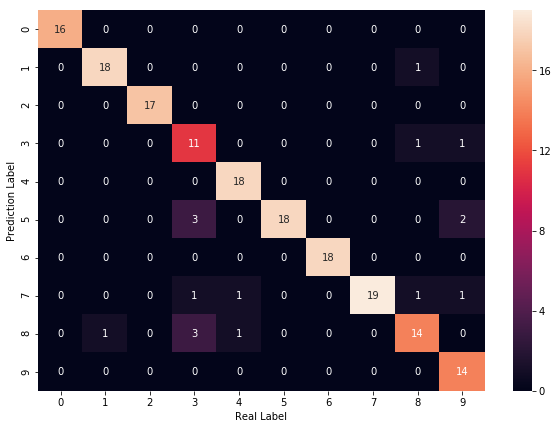

In [20]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [21]:
plt.hist(list_P)

(array([16., 19., 17., 13., 18., 23., 18., 23., 19., 14.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [22]:
plt.hist(digits.target[1617:])

(array([16., 19., 17., 18., 20., 18., 18., 19., 17., 18.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [23]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))


#0 min_error:125 index:[5] real:5
#1 min_error:142 index:[2] real:2
#2 min_error:143 index:[8] real:8
#3 min_error:30 index:[0] real:0
#4 min_error:116 index:[1] real:1
#5 min_error:84 index:[7] real:7
#6 min_error:69 index:[6] real:6
#7 min_error:100 index:[3] real:3
#8 min_error:67 index:[2] real:2
#9 min_error:118 index:[1] real:1
#10 min_error:146 index:[7] real:7
#11 min_error:169 index:[7] real:4
#12 min_error:85 index:[6] real:6
#13 min_error:110 index:[3] real:3
#14 min_error:106 index:[1] real:1
#15 min_error:131 index:[3] real:3
#16 min_error:168 index:[7] real:9
#17 min_error:112 index:[1] real:1
#18 min_error:127 index:[7] real:7
#19 min_error:48 index:[6] real:6
#20 min_error:134 index:[8] real:8
#21 min_error:74 index:[4] real:4
#22 min_error:101 index:[3] real:3
#23 min_error:117 index:[1] real:1
#24 min_error:59 index:[4] real:4
#25 min_error:57 index:[0] real:0
#26 min_error:75 index:[5] real:5
#27 min_error:84 index:[3] real:3
#28 min_error:131 index:[6] real:6
#29 mi

In [24]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:10106 Total connections::11535


In [25]:
necoc = 511
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.9208410636982065
Avg Base Learner:0.8068842908093677


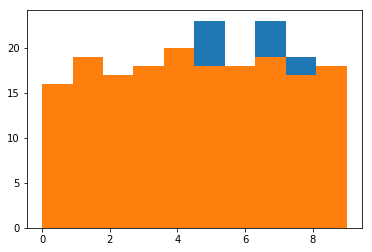

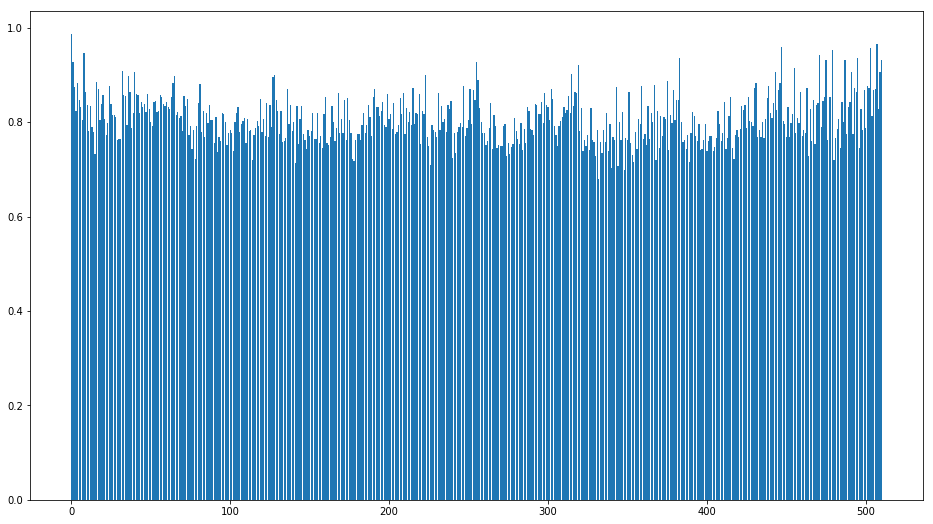

In [26]:
plt.figure(figsize = (16,9))
plt.bar(range(511),winner_fitness)
plt.show()

In [27]:
winner_fitness

[0.987012987012987,
 0.9282622139764997,
 0.8738404452690167,
 0.8231292517006803,
 0.8831168831168831,
 0.847247990105133,
 0.8330241187384044,
 0.8045763760049475,
 0.9461966604823747,
 0.8645640074211502,
 0.8373531230674088,
 0.7816944959802102,
 0.83426097711812,
 0.7897340754483612,
 0.7792207792207793,
 0.7334570191713049,
 0.8849721706864564,
 0.8707482993197279,
 0.8051948051948052,
 0.839208410636982,
 0.8583797155225726,
 0.8076685219542362,
 0.7730364873222016,
 0.7990105132962276,
 0.8763141620284477,
 0.839208410636982,
 0.8144712430426716,
 0.8144712430426716,
 0.8101422387136673,
 0.7625231910946196,
 0.7637600494743352,
 0.7637600494743352,
 0.9078540507111935,
 0.8565244279529994,
 0.8546691403834261,
 0.7946815089672232,
 0.8979591836734694,
 0.8645640074211502,
 0.7872603586889301,
 0.8194186765615337,
 0.9059987631416203,
 0.8589981447124304,
 0.8565244279529994,
 0.8194186765615337,
 0.8416821273964131,
 0.8324056895485467,
 0.8379715522572665,
 0.821273964131107,

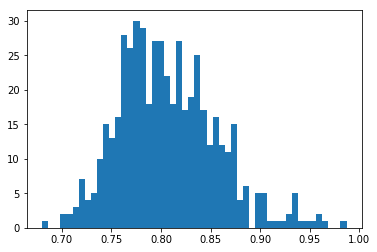

In [28]:
plt.hist(winner_fitness, bins= 50)
plt.show()

In [29]:
import random

te = []
cc = []
acc = []

necoc = 4

for iii in range(10000):
    while True:
        number_codes = []
        for i in range(2**(10-1), 2**10-1):
            for j in bin(i).split('b')[1]:
                number_codes.append(int(j))
        number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

        slice = random.sample(range(2**9-1), necoc)
        #slice = range(31)

        number_codes = number_codes[:,slice].tolist()

        classes = []
        for i in range(necoc):
            code_list = np.array(number_codes).T[i]
            classes.append(np.where(code_list==1)[0].tolist())

        matrix_errors = []

        for i in range(9):
            for j in range(i+1,10):
                matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
        min_error = np.min(matrix_errors)
        if min_error != 0:
            #print("min row distanse: {}".format(min_error))
            #print(number_codes)
            break
    #print("We choose classifers: {}".format(slice))
    #print("classes are: {}".format(classes))
    #np.array(number_codes)
    #print("accuracy of each classifier:{}".format([winner_fitness[i] for i in slice]))
    rou = min_error/necoc
    epsilon = np.mean([1 - winner_fitness[i] for i in slice])
    te.append(2*epsilon/rou)
    cc.append(classes)
    acc.append([winner_fitness[i] for i in slice])
    #print("p:{}, e:{}: training error:{}".format(rou, epsilon, 2*epsilon/rou))

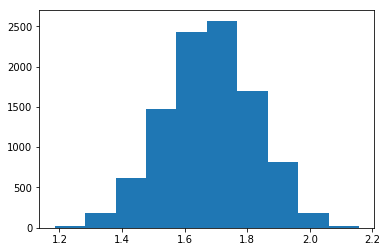

In [30]:
plt.hist(te)
plt.show()

In [31]:
print("minimum te: {}".format(min(te)))
print("class1 are:{}".format(cc[te.index(min(te))]))
print("acc of classifiers are:{}".format(acc[te.index(min(te))]))
print("mean of these classifiers are:{}".format(np.mean(acc[te.index(min(te))])))

minimum te: 1.1849103277674706
class1 are:[[0, 1, 4, 7], [0, 1, 2, 3, 7, 8, 9], [0, 7, 8, 9], [0, 3, 6, 9]]
acc of classifiers are:[0.839208410636982, 0.9140383426097711, 0.8045763760049475, 0.849721706864564]
mean of these classifiers are:0.8518862090290662


In [32]:
print("maximum te: {}".format(max(te)))
print("class1 are:{}".format(cc[te.index(max(te))]))
print("acc of classifiers are:{}".format(acc[te.index(max(te))]))
print("mean of these classifiers are:{}".format(np.mean(acc[te.index(max(te))])))

maximum te: 2.157081014223871
class1 are:[[0, 3, 4, 5, 8], [0, 1, 7, 8], [0, 1, 3, 6, 7], [0, 2, 4, 7, 8]]
acc of classifiers are:[0.7204700061842919, 0.7600494743351887, 0.6802721088435374, 0.7606679035250464]
mean of these classifiers are:0.7303648732220162


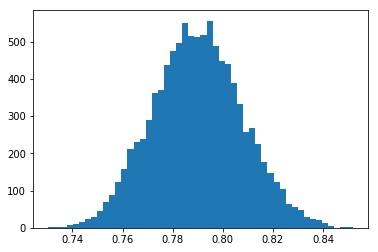

In [33]:
plt.hist(np.mean(acc, axis = 1),bins = 50)
plt.show()

In [34]:
winner_fitness

[0.987012987012987,
 0.9282622139764997,
 0.8738404452690167,
 0.8231292517006803,
 0.8831168831168831,
 0.847247990105133,
 0.8330241187384044,
 0.8045763760049475,
 0.9461966604823747,
 0.8645640074211502,
 0.8373531230674088,
 0.7816944959802102,
 0.83426097711812,
 0.7897340754483612,
 0.7792207792207793,
 0.7334570191713049,
 0.8849721706864564,
 0.8707482993197279,
 0.8051948051948052,
 0.839208410636982,
 0.8583797155225726,
 0.8076685219542362,
 0.7730364873222016,
 0.7990105132962276,
 0.8763141620284477,
 0.839208410636982,
 0.8144712430426716,
 0.8144712430426716,
 0.8101422387136673,
 0.7625231910946196,
 0.7637600494743352,
 0.7637600494743352,
 0.9078540507111935,
 0.8565244279529994,
 0.8546691403834261,
 0.7946815089672232,
 0.8979591836734694,
 0.8645640074211502,
 0.7872603586889301,
 0.8194186765615337,
 0.9059987631416203,
 0.8589981447124304,
 0.8565244279529994,
 0.8194186765615337,
 0.8416821273964131,
 0.8324056895485467,
 0.8379715522572665,
 0.821273964131107,